# Consumer Behavior and Personality Profiling

## AUTHOR: MOHAN KRISHNA KOLA

In this project, we analyze customer demographics, behavior, and purchasing patterns to create detailed profiles. The goal is to provide businesses with actionable insights to improve marketing strategies and boost customer retention.

## Imporintg important Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
# Loading the data
main_df = pd.read_csv('marketing_campaign.csv', sep='\t')
df = main_df.copy()
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

# Exploratory Data Analysis

In [6]:
#shape of the dataset
df.shape

(2240, 29)

In [7]:
# basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Here we have only 3 object type datatype and rest are numerical

In [9]:
# Finding the number of unique values present in each column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

- In above cell "Z_CostContact" and "Z_Revenue" have some value in all the rows that's why they are not going to contribute anything in the model building. So we can drop them

In [11]:
# Checking if ny NaN is present in column or not
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [12]:
# Checking number of null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- Income column have some missing value in it so we will need to fill it by either maean or median.

<Axes: >

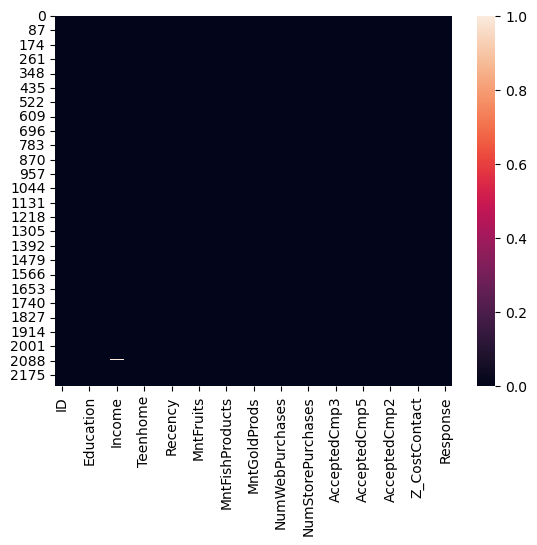

In [14]:
# Checking for null value using heatmap
sns.heatmap(df.isnull())

In [15]:
# Dropping the column beacause they will not contribute in model building
df = df.drop(columns=["Z_CostContact", "Z_Revenue"], axis=1)
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   
5  09-09-2013       16       520  ...                    4                 10   
6  13-11-2012       34       235  ...                    3                  7   
7  08-05-2013       32        76  ...                    0                  4   
8  06-06-2013       19        14  ...                    0                  2   
9  13-03-2014       68        28  ...                    0                  0   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   
5                  6             0             0             0             0   
6                  6             0             0             0             0   
7                  8             0             0             0             0   
8                  9             0             0             0             0   
9                 20             1             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  
5             0         0         0  
6             0         0         0  
7             0         0         0  
8             0         0         1  
9             0         0         0  

[10 rows x 27 columns]

- Let's figure out the number of complains complained by customer and number of responses are positive or negative in last 2 years.

Text(0, 0.5, 'Count of Complain')

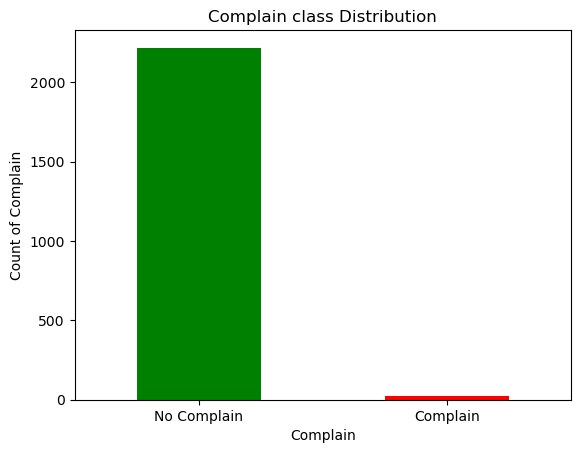

In [17]:
# Complain: 1 if customer complained in the last 2 years, 0 otherwise
label_complain = ["No Complain","Complain"]

count_complain = pd.value_counts(df['Complain'], sort=True)
count_complain.plot(kind='bar', rot=0,color=['Green','Red'])
plt.title("Complain class Distribution")
plt.xticks(range(2),label_complain)
plt.xlabel("Complain")
plt.ylabel("Count of Complain")

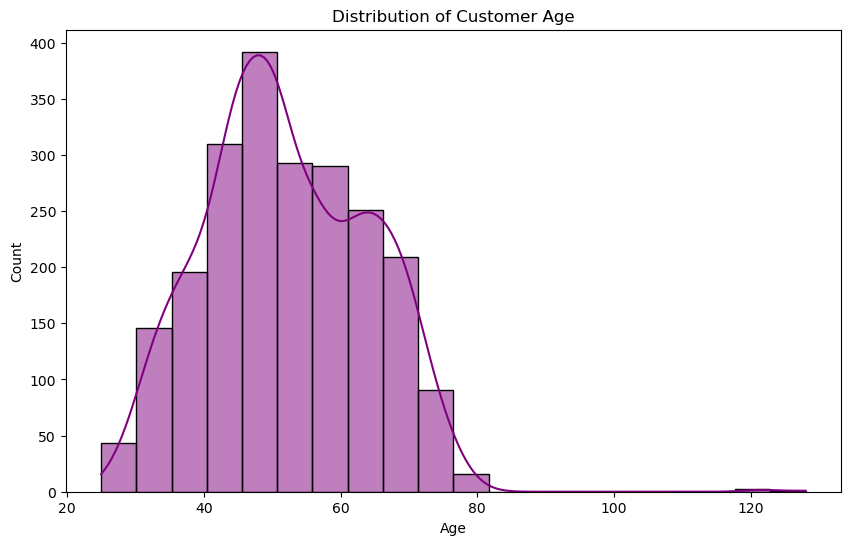

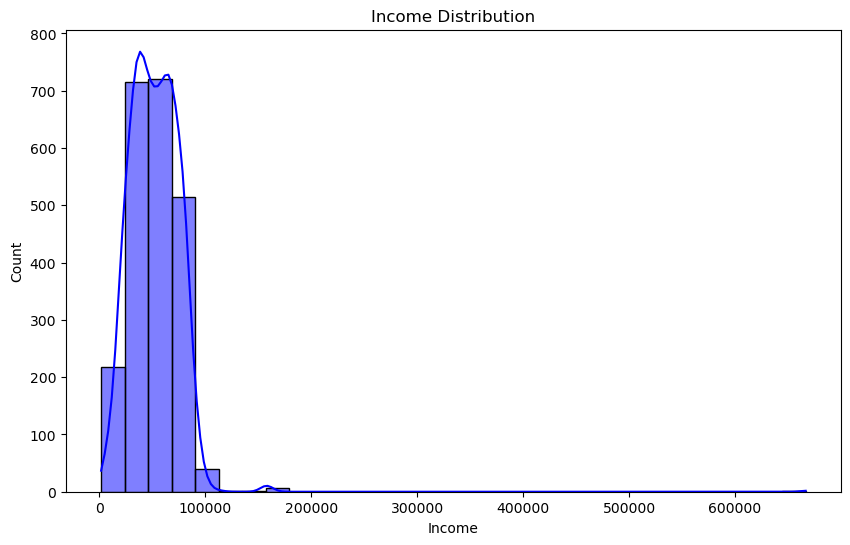

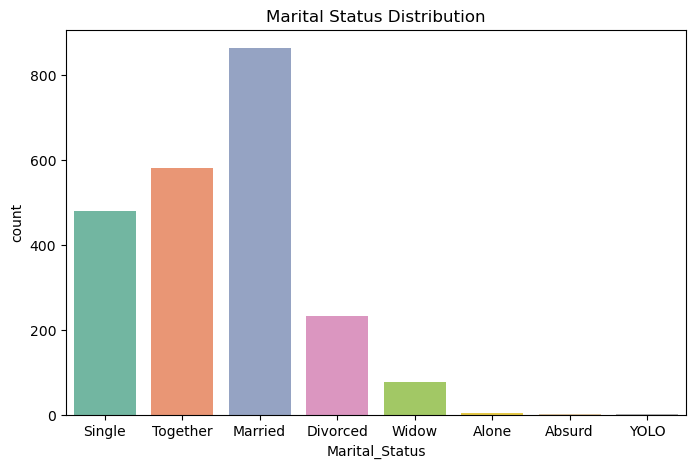

In [18]:
df['Complain'].value_counts()
# 1 if customer complained in the last 2 years, 0 otherwise
# Visualizing distribution of Age
df['Age'] = 2021 - df['Year_Birth']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


-  From above image we can say that there are not much complains by customers.

Text(0, 0.5, 'Count of Response')

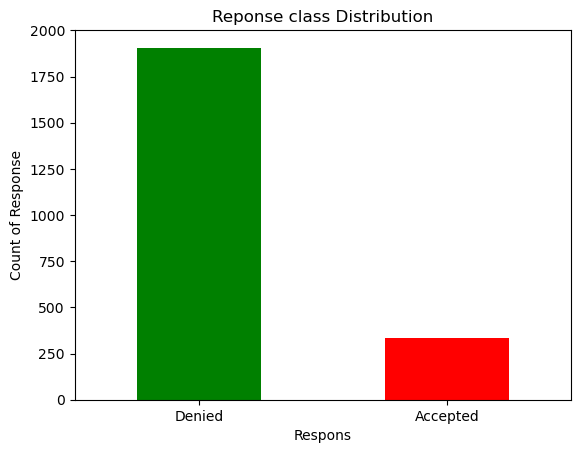

In [20]:
# Let's checl about response

# Response: 1 if customer accepted the offer in the last 2 campaign, 0 otherwise
label_response = ["Denied","Accepted"]

count_response = pd.value_counts(df['Response'], sort=True)
count_response.plot(kind='bar', rot=0,color=['Green','Red'])
plt.title("Reponse class Distribution")
plt.xticks(range(2),label_response)
plt.xlabel("Respons")
plt.ylabel("Count of Response")

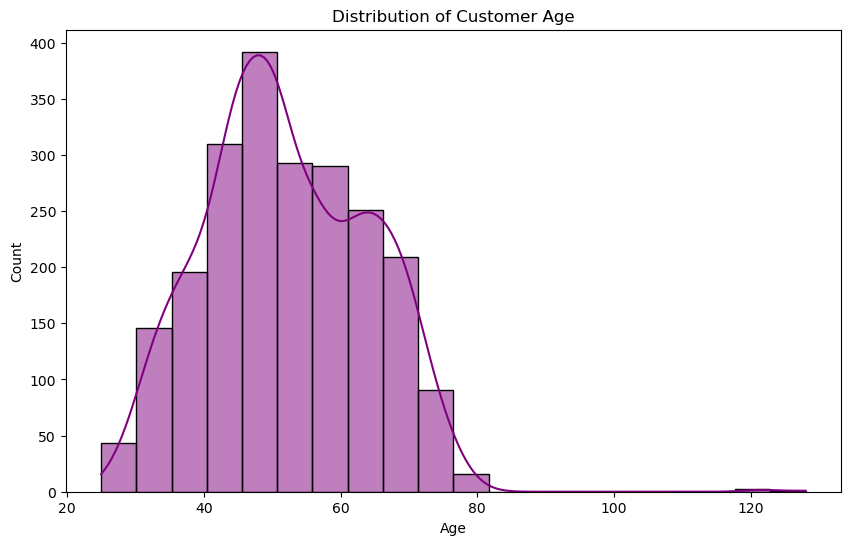

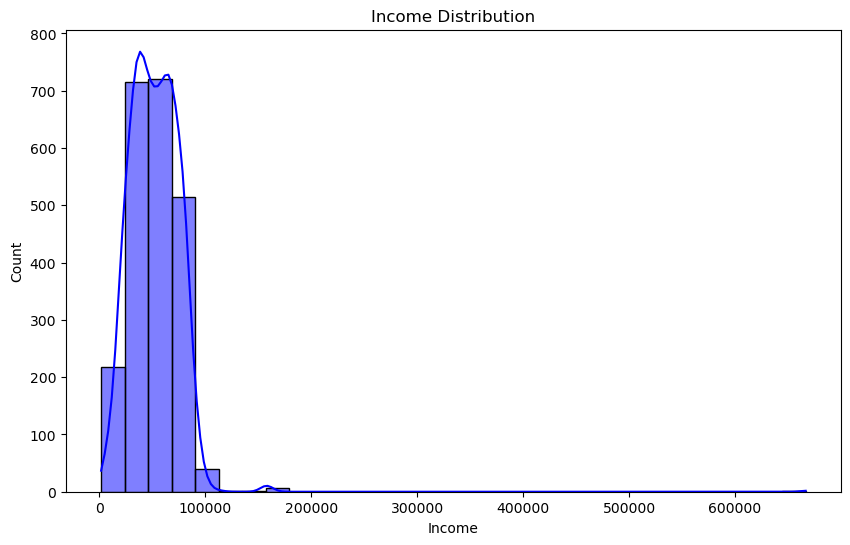

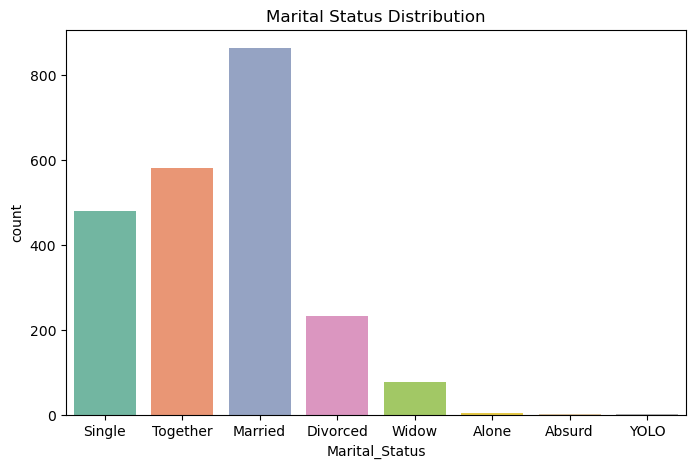

In [21]:
df['Response'].value_counts()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Year_Birth']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


- This graph shows that last the offer has been denied by most of the customers

*Let's check out all campaign offers*

- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Text(0, 0.5, 'Count of Campagin1')

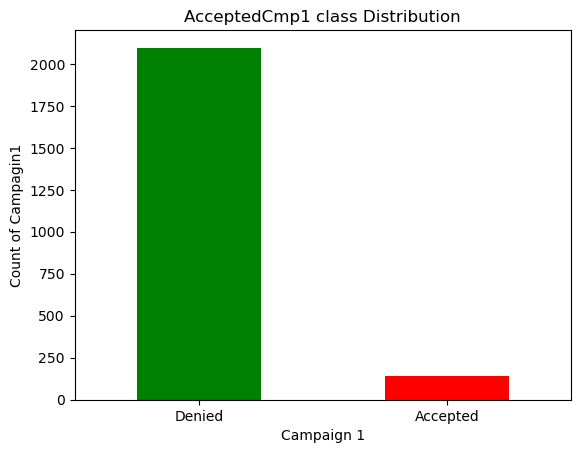

In [25]:
#Campagin 1

labels_c1 = ["Denied", "Accepted"]

count_c1 = pd.value_counts(df['AcceptedCmp1'], sort=True)
count_c1.plot(kind='bar', rot=0,color=['Green','Red'])
plt.title("AcceptedCmp1 class Distribution")
plt.xticks(range(2),labels_c1)
plt.xlabel("Campaign 1")
plt.ylabel("Count of Campagin1")

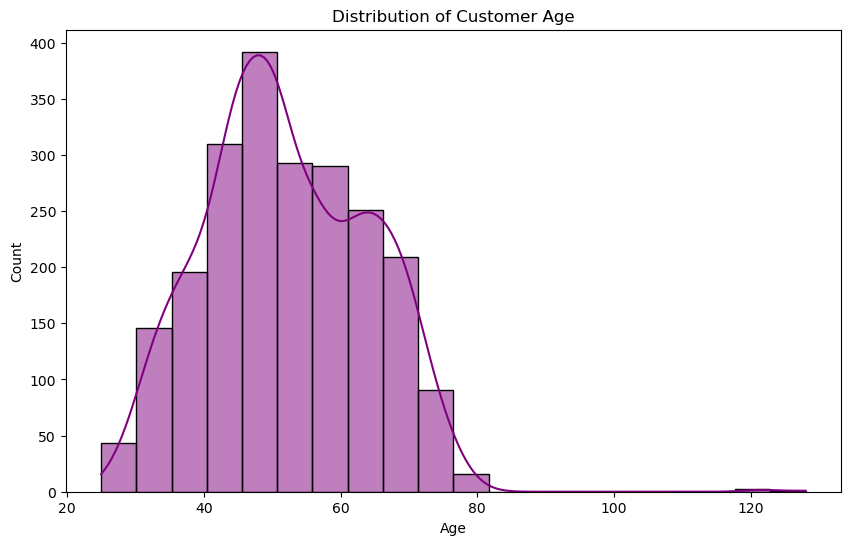

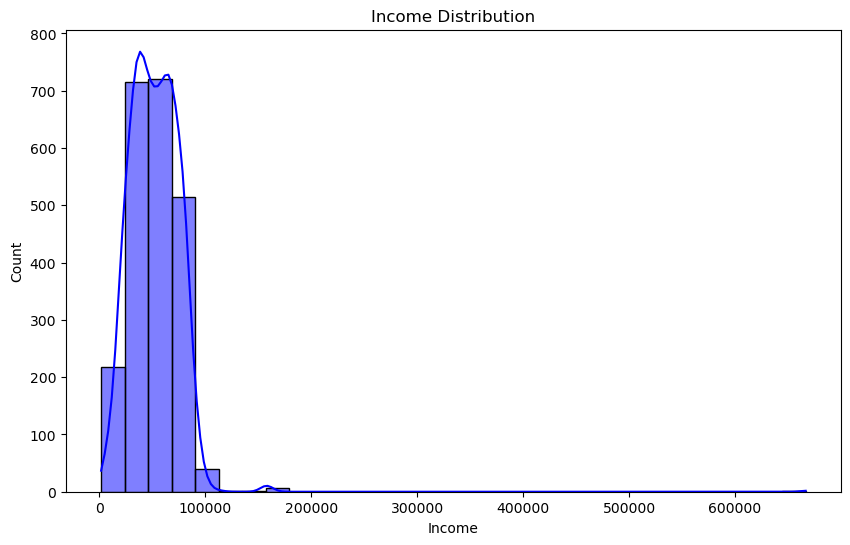

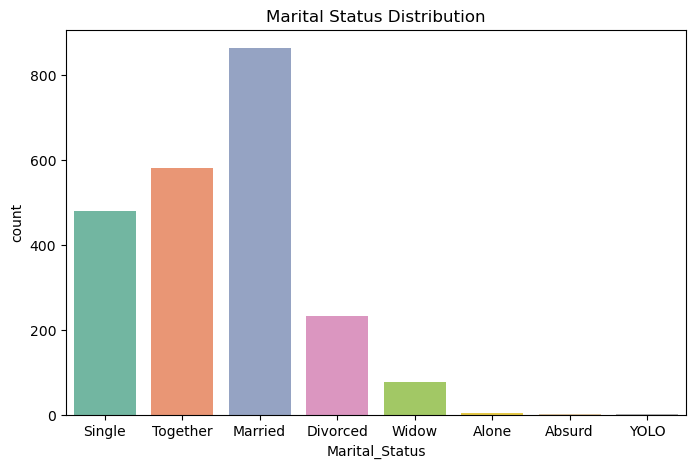

In [26]:
df['AcceptedCmp1'].value_counts()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Year_Birth']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


Text(0, 0.5, 'Count of Campagin2')

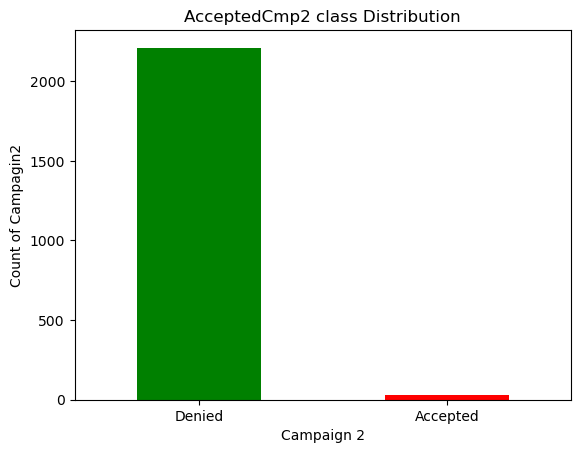

In [27]:
#Campagin 2

labels_c2 = ["Denied", "Accepted"]

count_c2 = pd.value_counts(df['AcceptedCmp2'], sort=True)
count_c2.plot(kind='bar', rot=0,color=['Green','Red'])
plt.title("AcceptedCmp2 class Distribution")
plt.xticks(range(2),labels_c2)
plt.xlabel("Campaign 2")
plt.ylabel("Count of Campagin2")

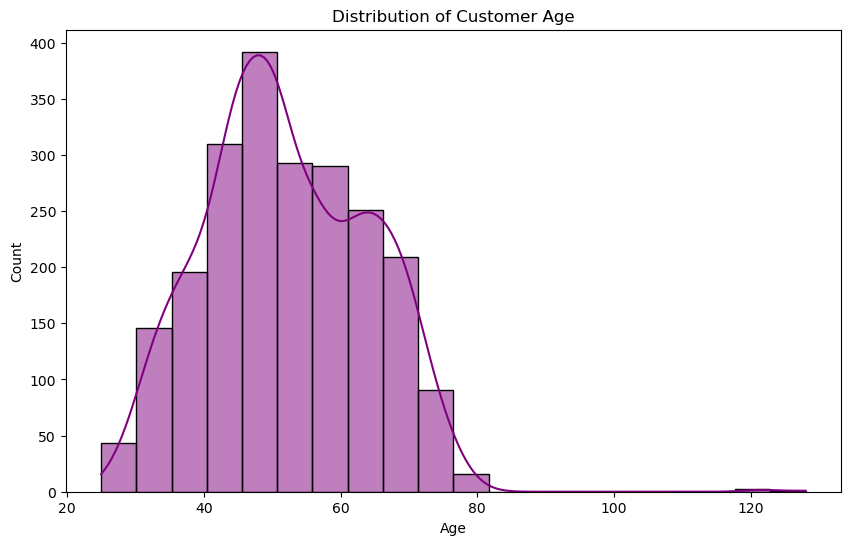

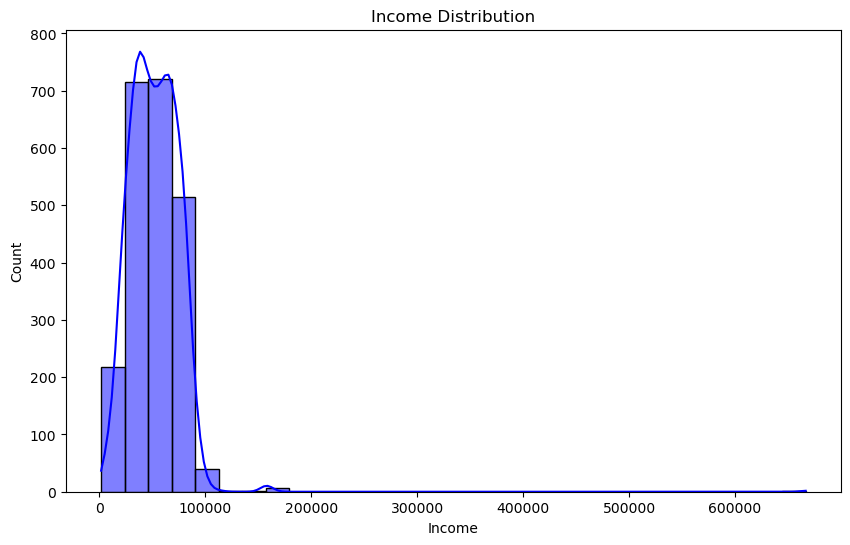

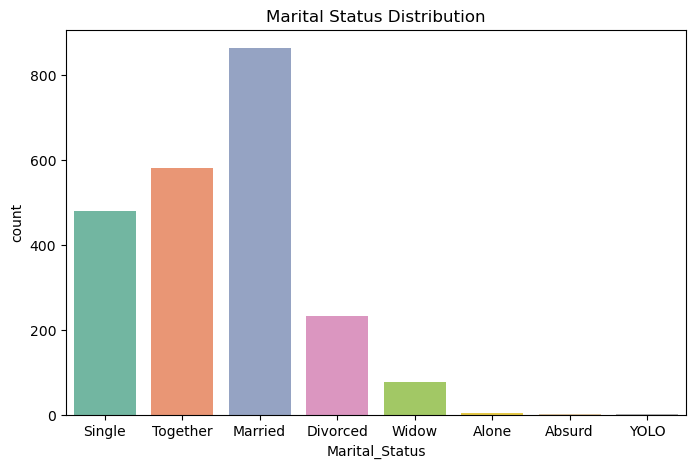

In [28]:
df["AcceptedCmp2"].value_counts()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Year_Birth']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


Text(0, 0.5, 'Count of Campagin3')

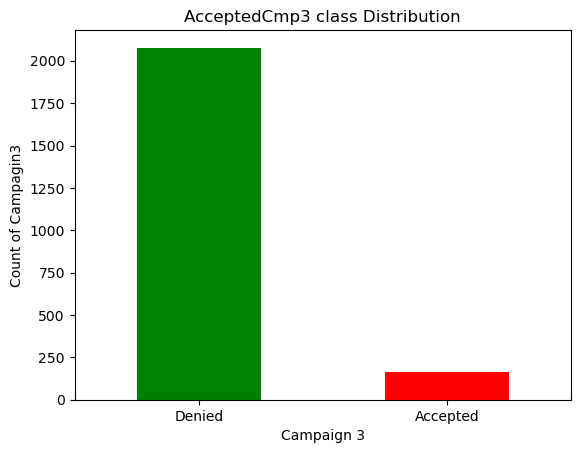

In [29]:
#Campagin 3

labels_c3 = ["Denied", "Accepted"]

count_c3 = pd.value_counts(df['AcceptedCmp3'], sort=True)
count_c3.plot(kind='bar', rot=0,color=['Green','Red'])
plt.title("AcceptedCmp3 class Distribution")
plt.xticks(range(2),labels_c3)
plt.xlabel("Campaign 3")
plt.ylabel("Count of Campagin3")

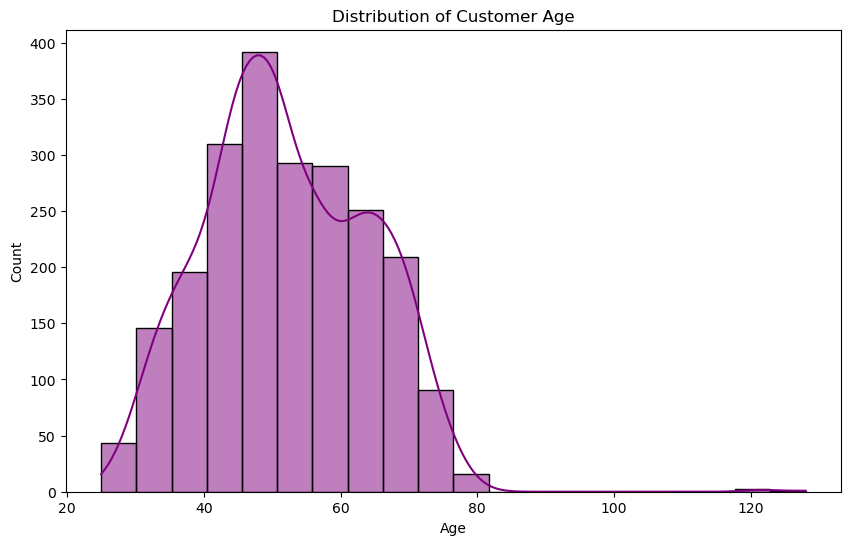

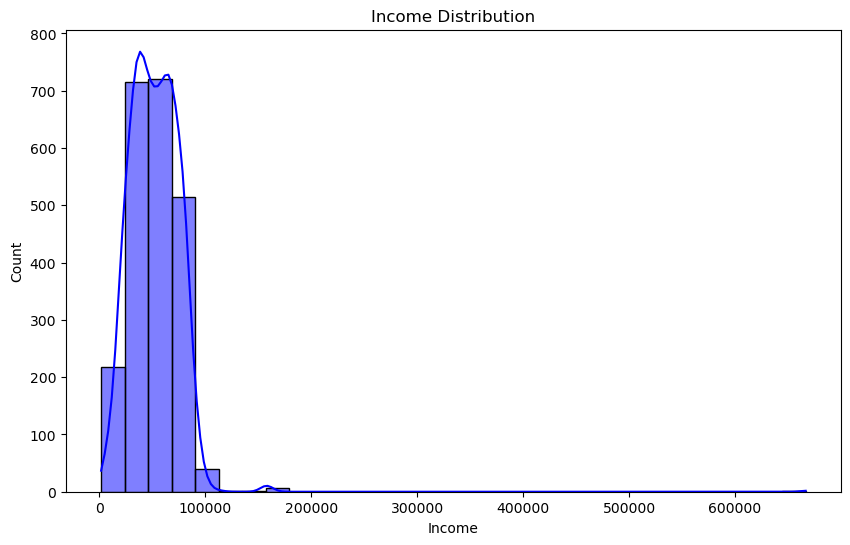

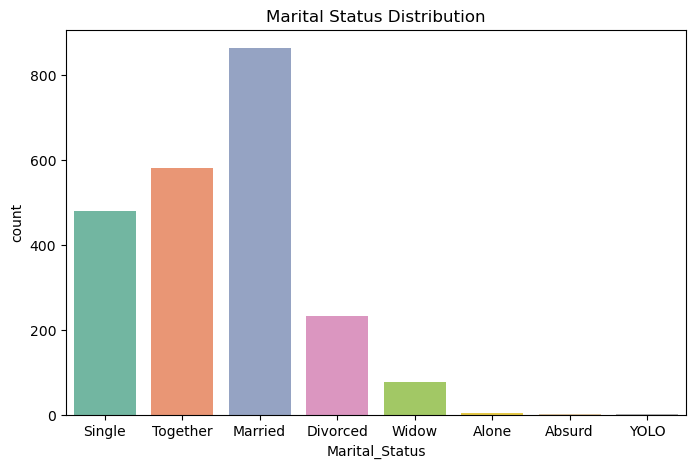

In [30]:
df["AcceptedCmp3"].value_counts()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Year_Birth']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


Text(0, 0.5, 'Count of Campagin4')

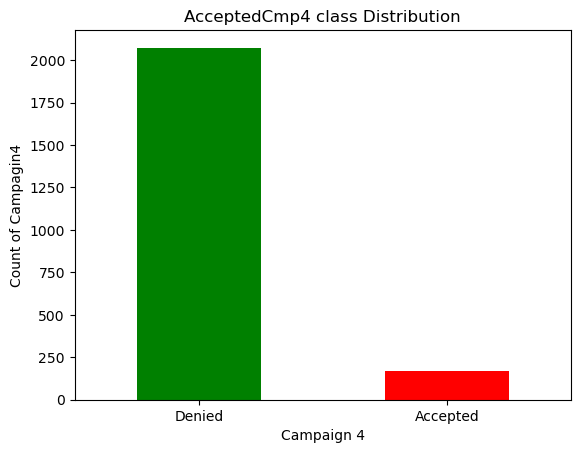

In [31]:
#Campagin 4

labels_c4 = ["Denied", "Accepted"]

count_c4 = pd.value_counts(df['AcceptedCmp4'], sort=True)
count_c4.plot(kind='bar', rot=0,color=['Green','Red'])
plt.title("AcceptedCmp4 class Distribution")
plt.xticks(range(2),labels_c4)
plt.xlabel("Campaign 4")
plt.ylabel("Count of Campagin4")

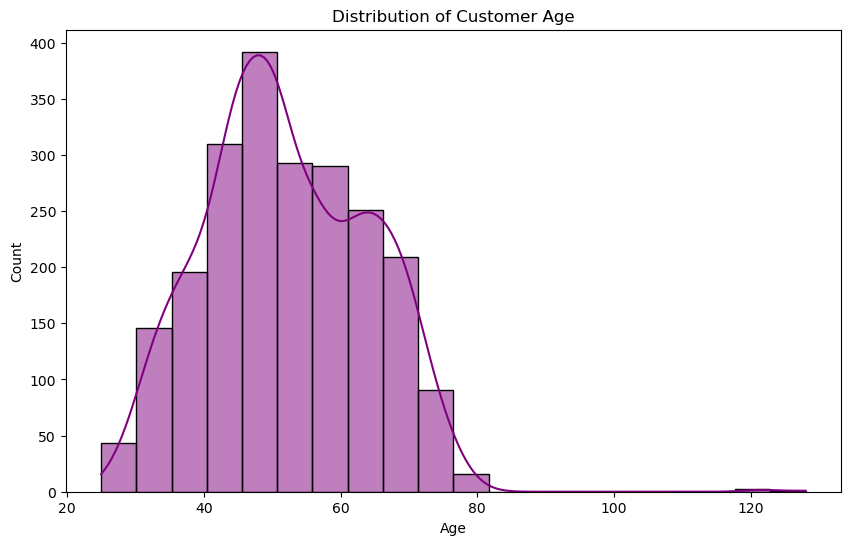

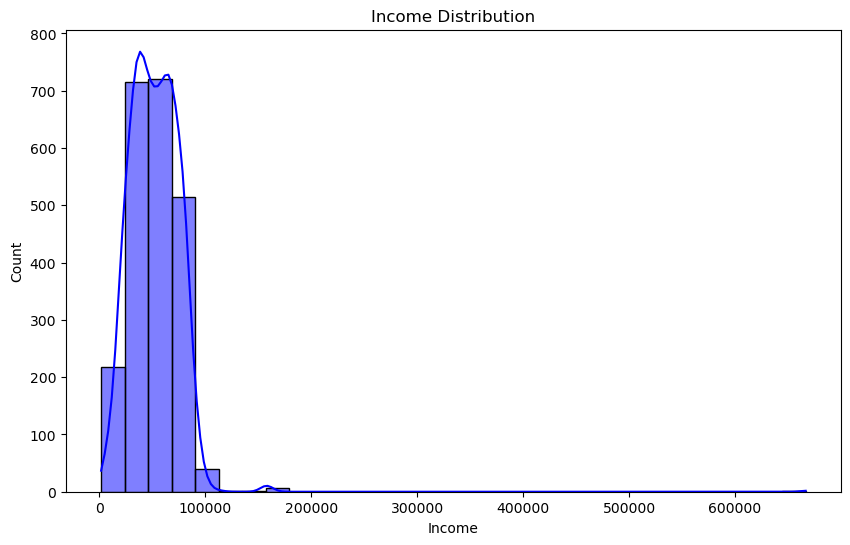

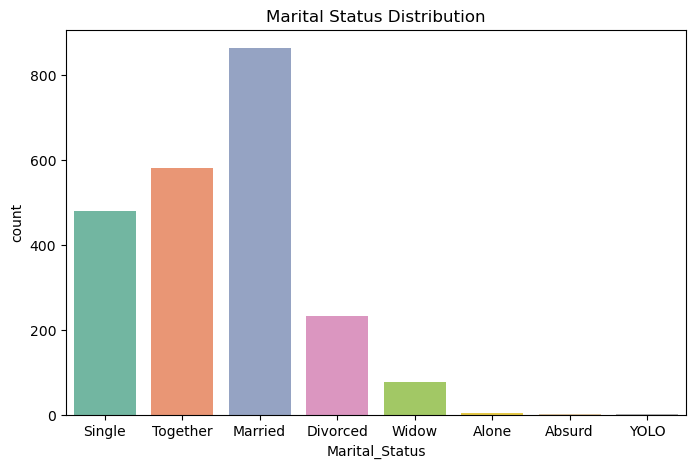

In [32]:
df["AcceptedCmp4"].value_counts()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Year_Birth']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


- From the above figures we clearly see that most of offers has been denied by customers in all campagins.
- But Campaign 4 had better amount of acceptance.
- Campaign 4 > Campaign 3 > Campaign 1 > Campagin 2: comparison of acceptance in campaigns.

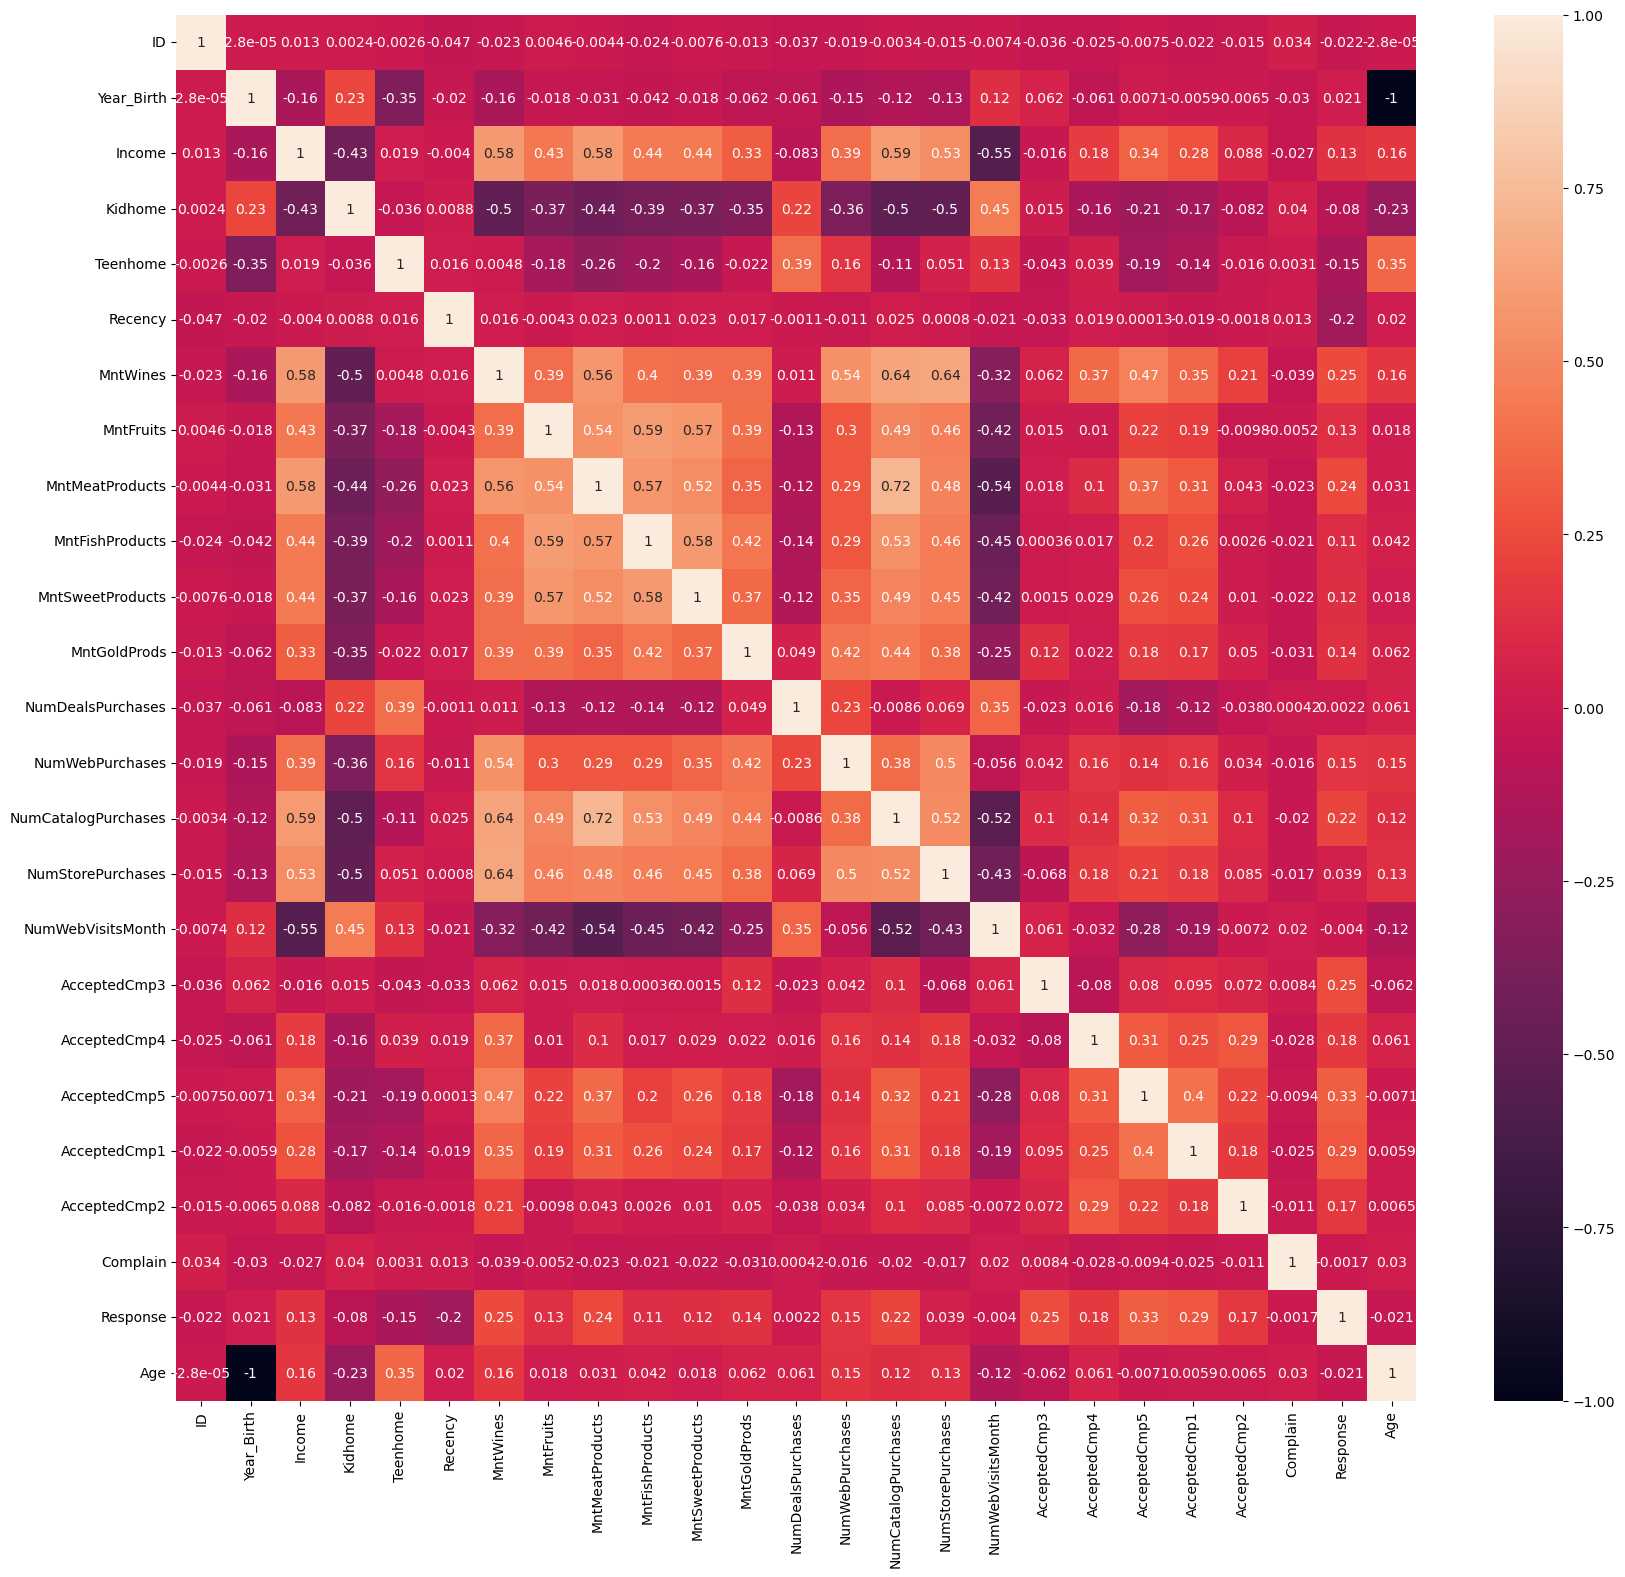

In [34]:
#Finding the correlation between the feature column

plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True)
plt.show()

- No two columns are too much correlated with each other so we can't drop any columns

## Data Preprocssing 

In [37]:
# Filling the missing value in the income by mean
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
dtype: int64

-  No null value in the dataset

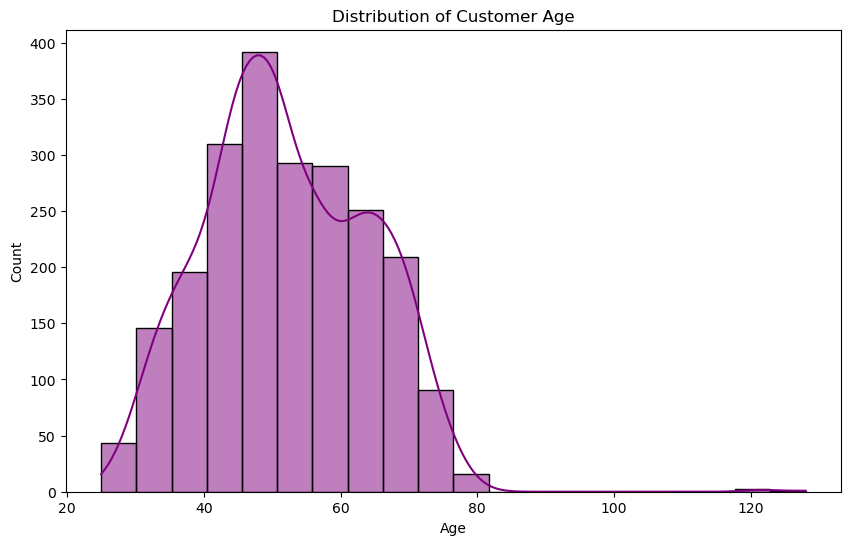

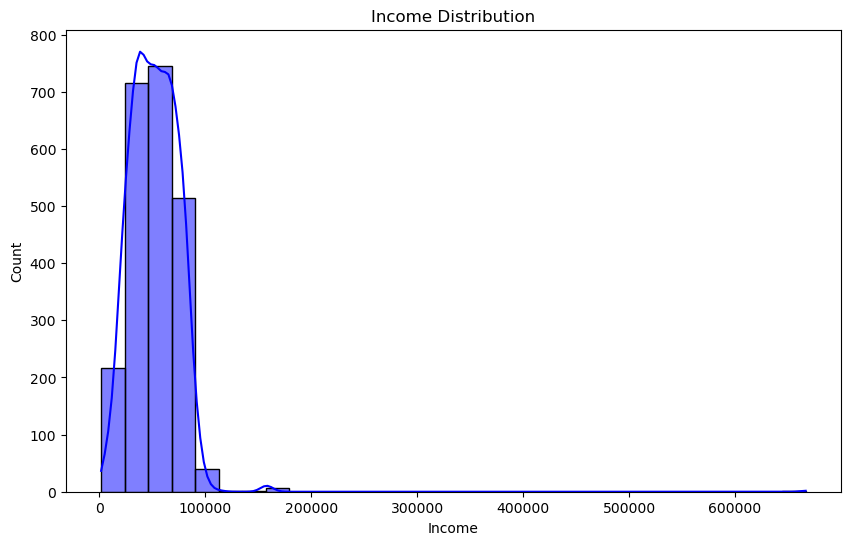

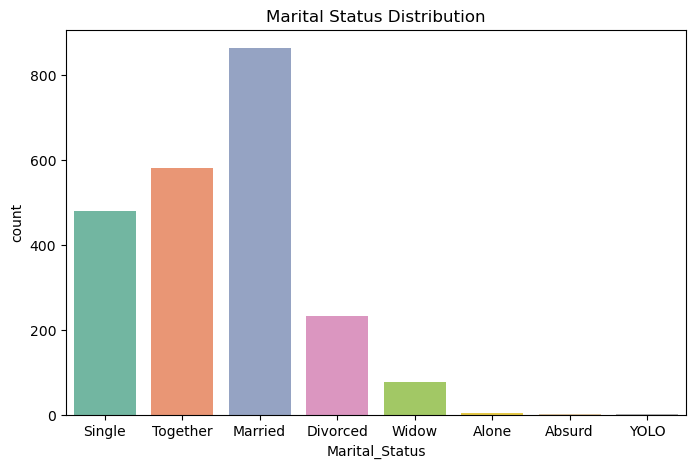

In [39]:
df.head()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Year_Birth']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


In [40]:
#Checking the number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

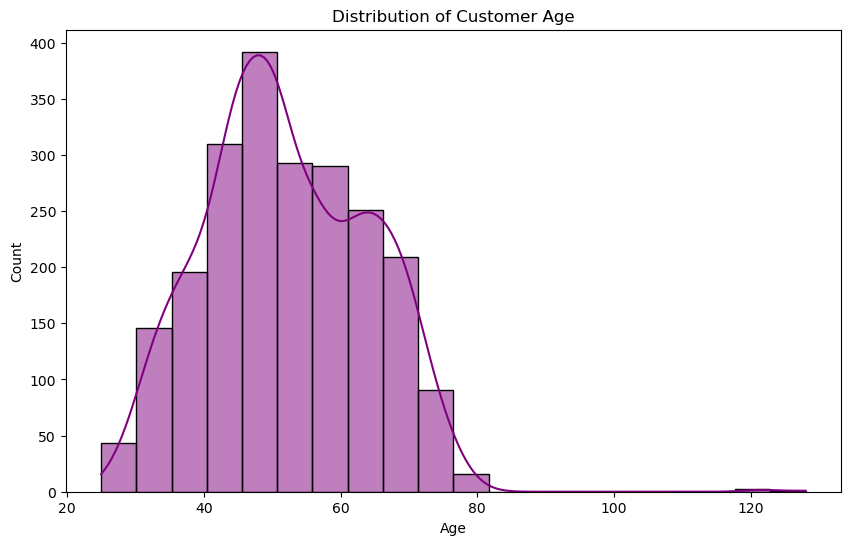

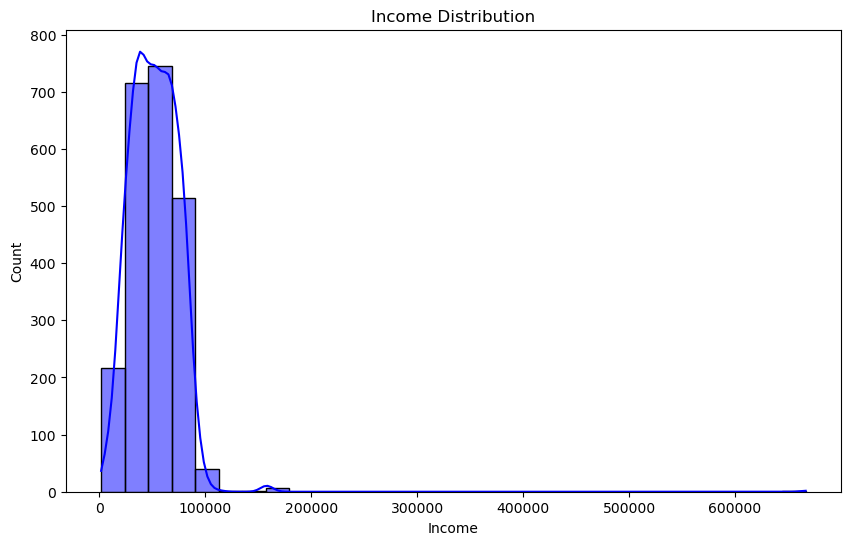

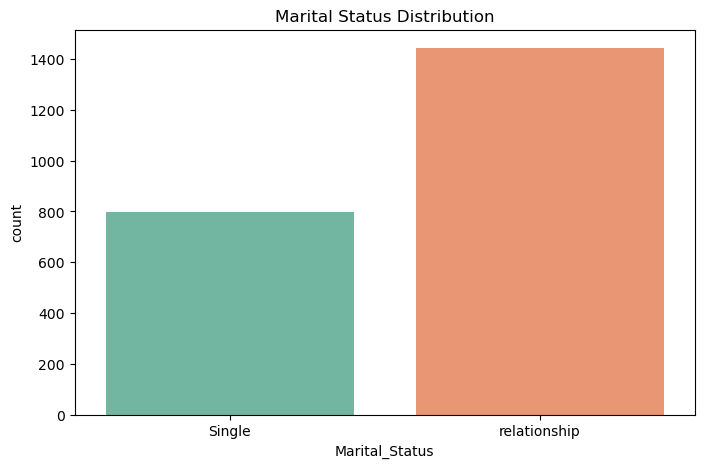

In [41]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd','single'],'Single')
# Visualizing distribution of Age
df['Age'] = 2021 - df['Year_Birth']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


- In the above cell we are grouping 'Married', 'Together' as "relationship"
- Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"

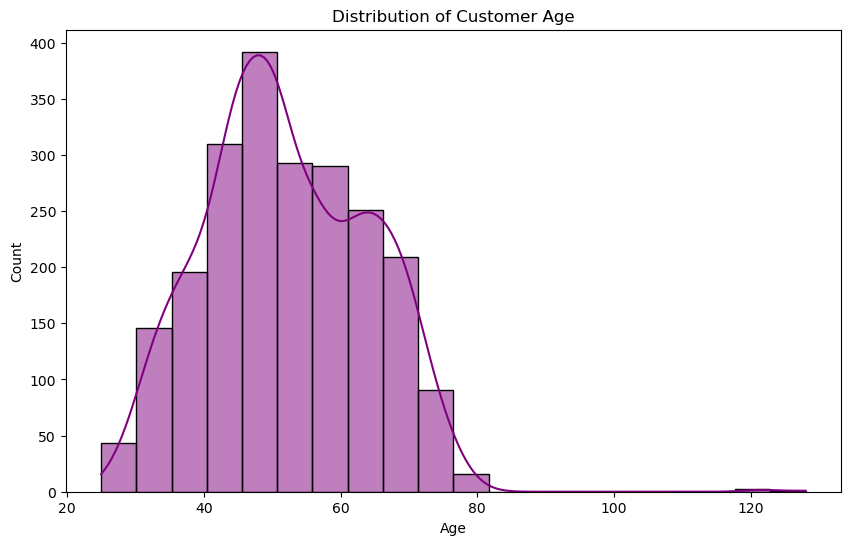

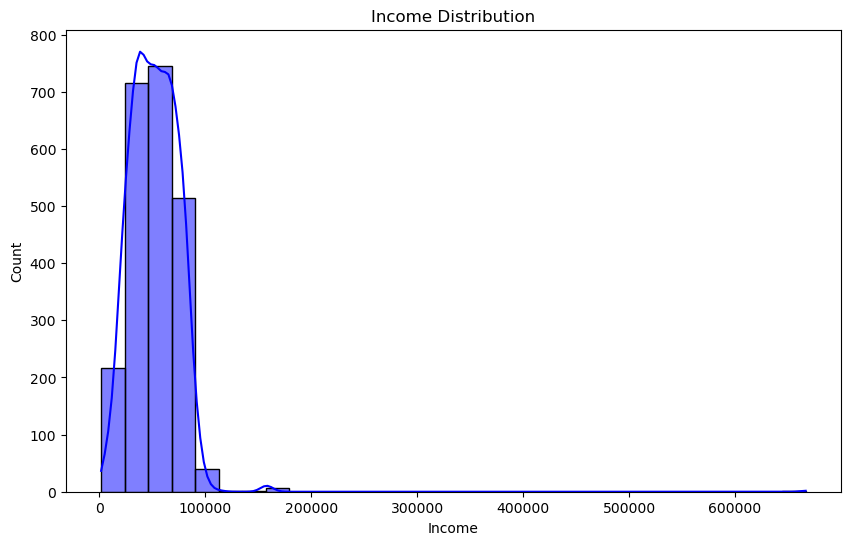

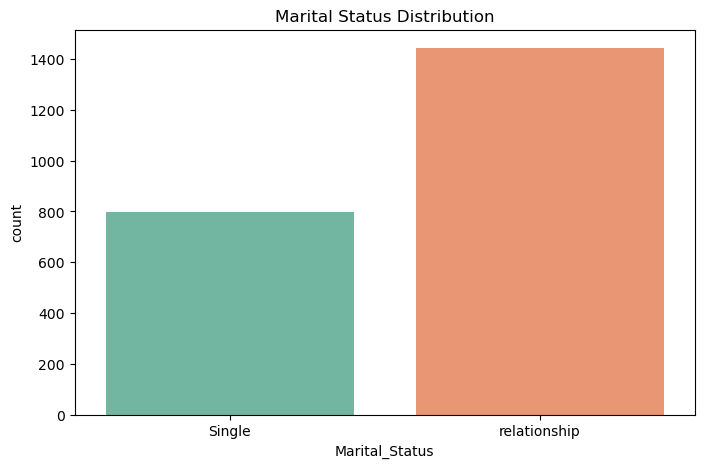

In [43]:
df['Marital_Status'].value_counts()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Year_Birth']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


Text(0, 0.5, 'Count of Marital Status')

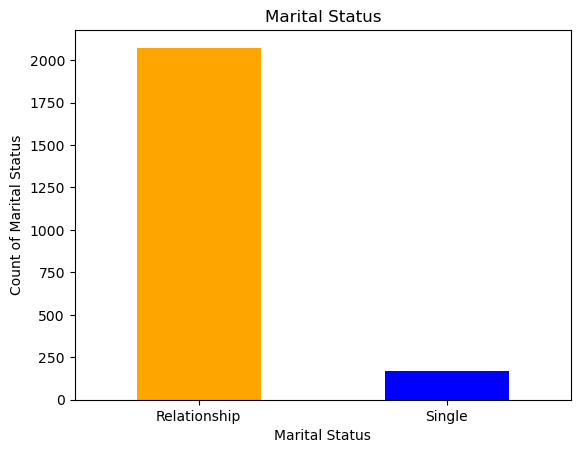

In [44]:
# Relationship vs Single

labels_status = ["Relationship", "Single"]

count_status = pd.value_counts(df['Marital_Status'], sort=True)
count_c4.plot(kind='bar', rot=0,color=['Orange','Blue'])
plt.title("Marital Status")
plt.xticks(range(2),labels_status)
plt.xlabel("Marital Status")
plt.ylabel("Count of Marital Status")

In [45]:
# Combining different dataframes into a single column to reduce the number of dimension

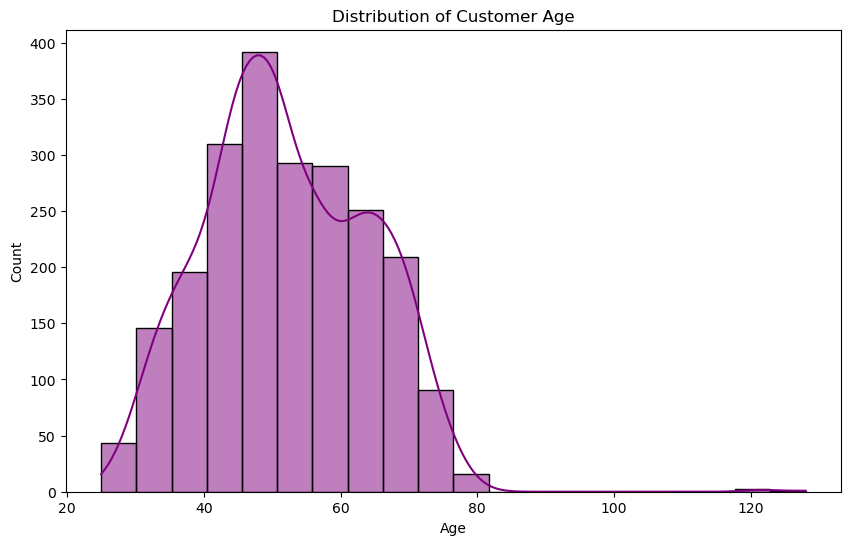

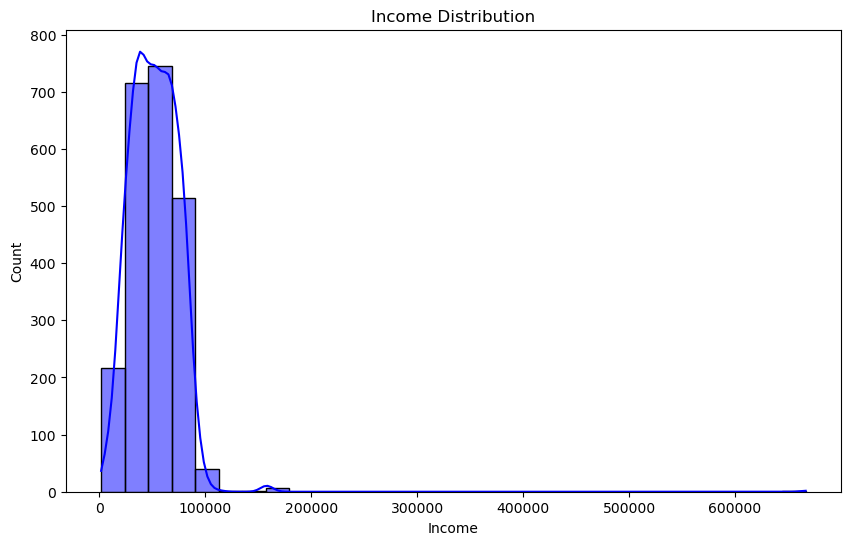

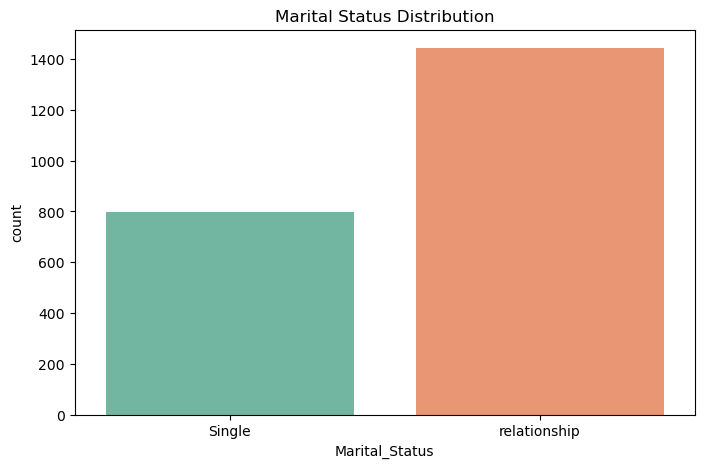

In [46]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
# Visualizing distribution of Age
df['Age'] = 2021 - df['Year_Birth']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


In [47]:
#saving the data for tableau
df.to_csv('data_visuals.csv')

In [48]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

ID  Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
0  5524        1957  Graduation         Single  58138.0  04-09-2012       58   
1  2174        1954  Graduation         Single  46344.0  08-03-2014       38   
2  4141        1965  Graduation   relationship  71613.0  21-08-2013       26   
3  6182        1984  Graduation   relationship  26646.0  10-02-2014       26   
4  5324        1981         PhD   relationship  58293.0  19-01-2014       94   

   Complain  Age  Kids  Expenses  TotalAcceptedCmp  NumTotalPurchases  
0         0   64     0      1617                 1                 25  
1         0   67     2        27                 0                  6  
2         0   56     0       776                 0                 21  
3         0   37     1        53                 0                  8  
4         0   40     1       422                 0                 19

In [49]:
# Adding 'Age' column

df['Age'] = 2015 - df['Year_Birth']

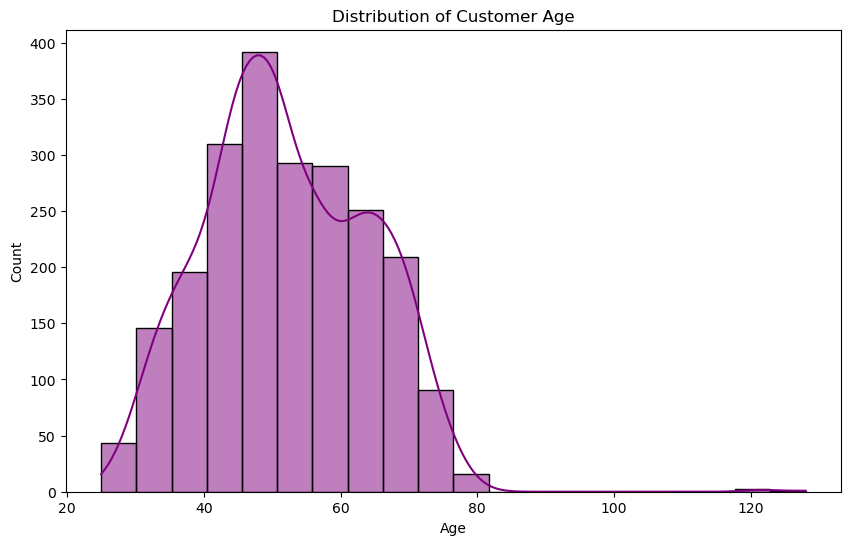

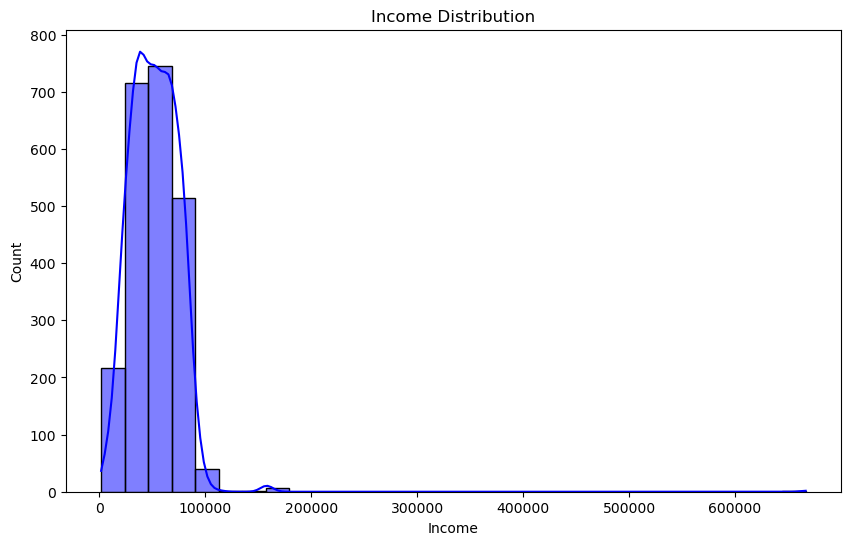

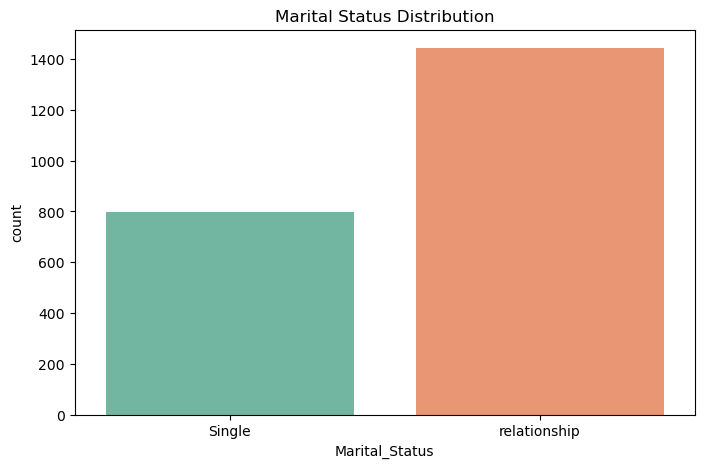

In [50]:
df['Education'].value_counts()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Year_Birth']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


In [51]:
# Changing category into UG and PG only

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [52]:
# Number of days a customer was engaged with company

# Changing bt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

(2240, 9)


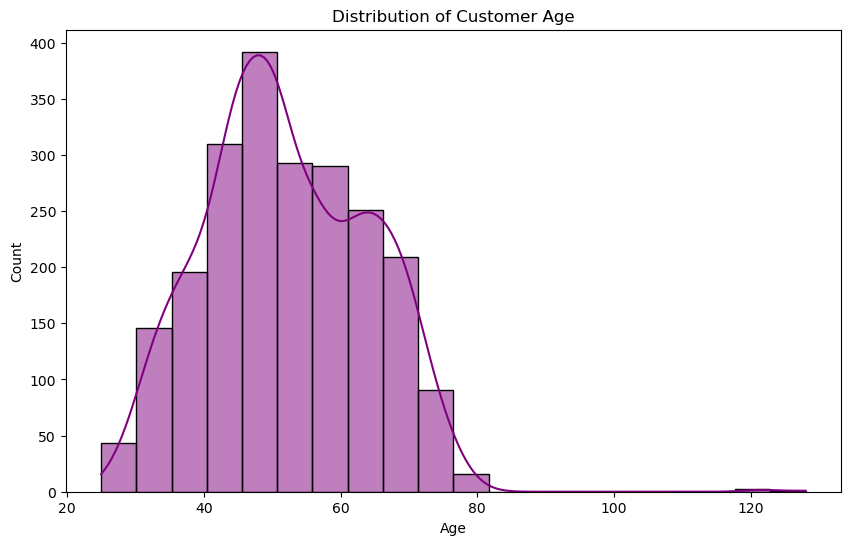

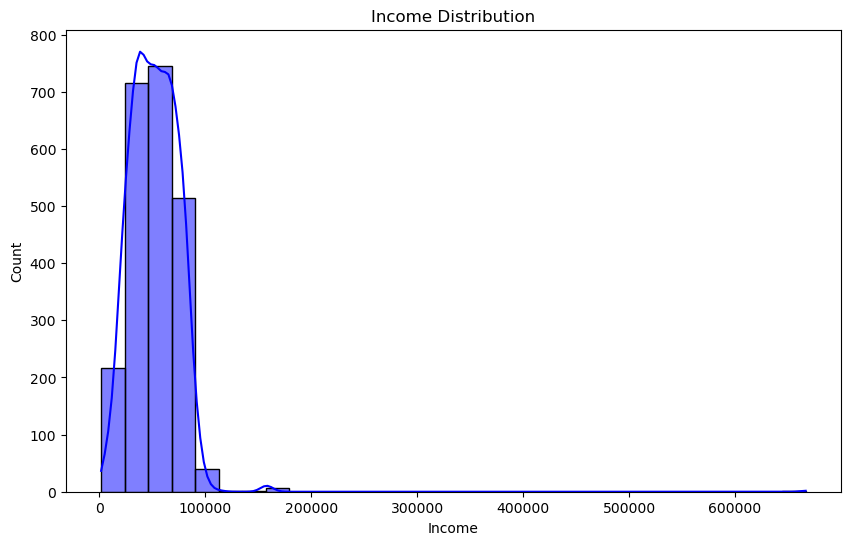

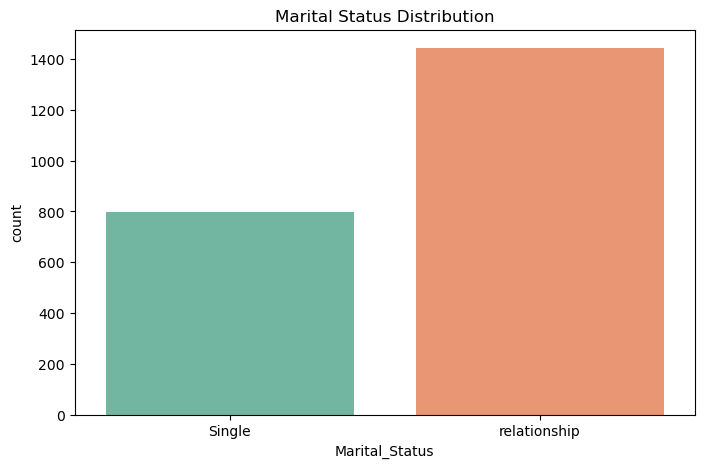

In [53]:
# Calculate 'Age' before dropping 'Year_Birth'
df['Age'] = 2021 - df['Year_Birth']

# Now drop unnecessary columns including 'Year_Birth'
df = df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Recency", "Complain"], axis=1)

# Checking the shape of the DataFrame
print(df.shape)

# Visualizing distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Visualizing distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Visualizing distribution of Marital Status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


In [75]:
print(df.columns)

Index(['Education', 'Marital_Status', 'Income', 'Age', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'day_engaged'],
      dtype='object')


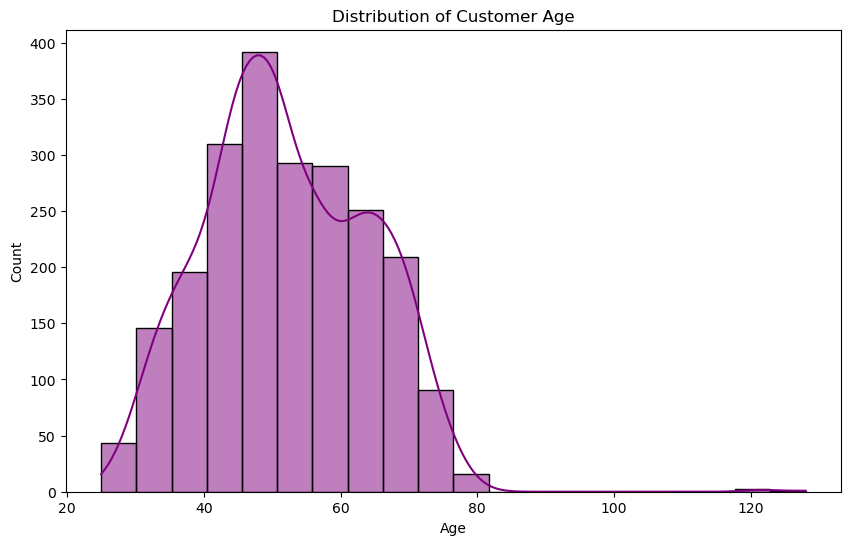

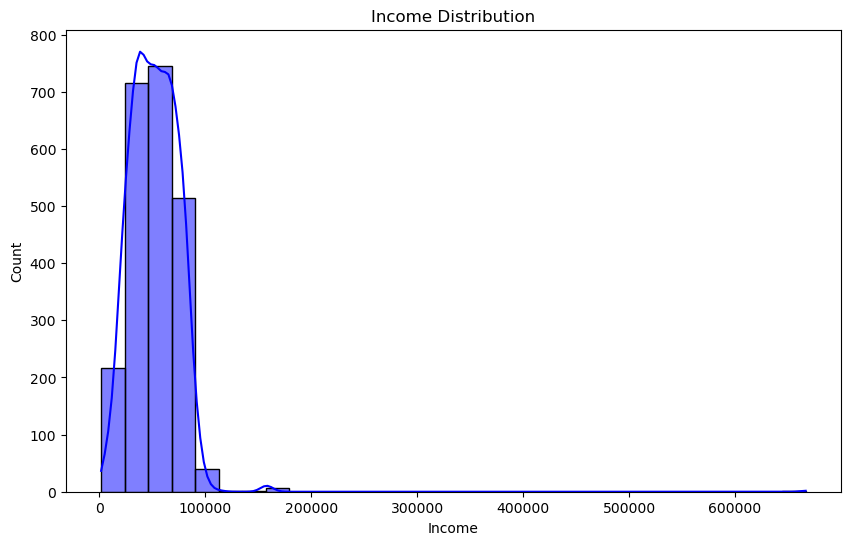

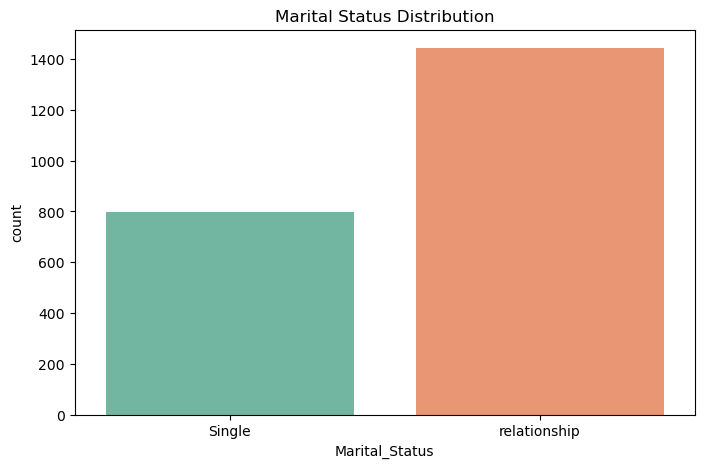

In [77]:
# Since the 'Age' column already exists, we can use it directly for visualization.

# Visualizing distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Visualizing distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Visualizing distribution of Marital Status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()

## Data Visualization

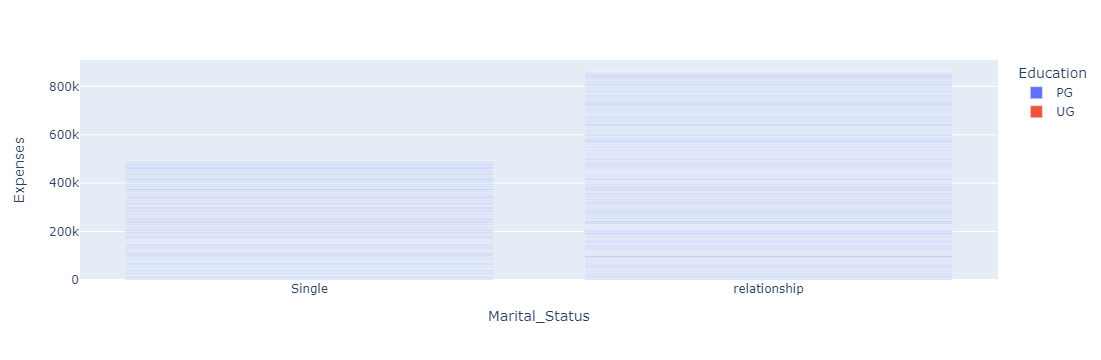

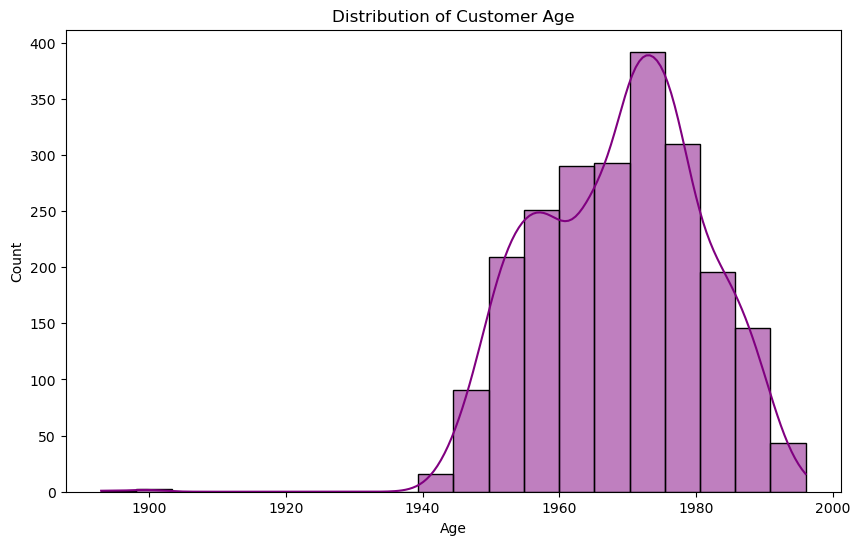

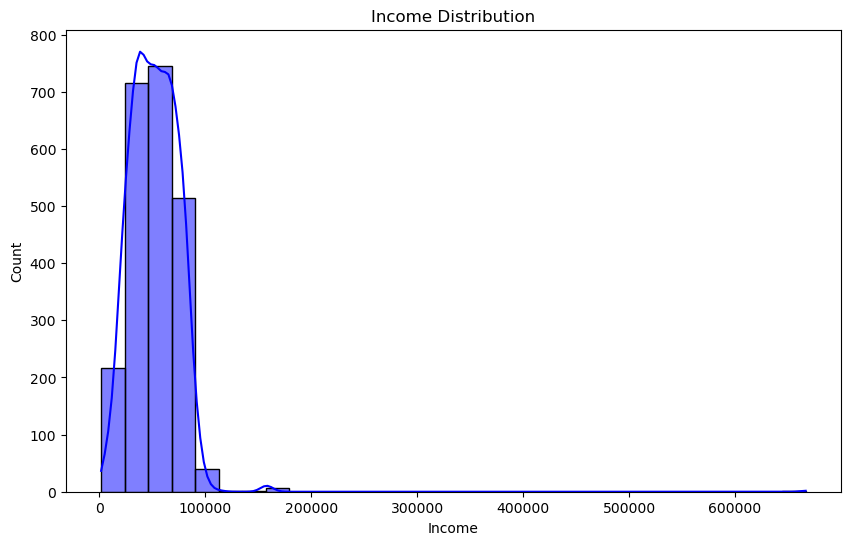

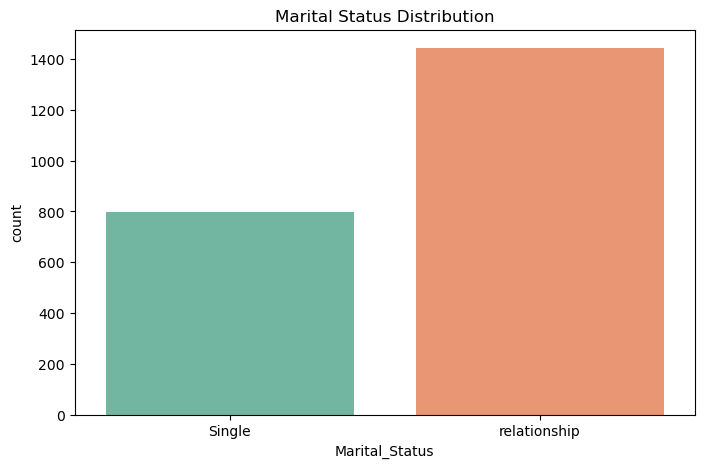

In [81]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color='Education')
fig.show()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()

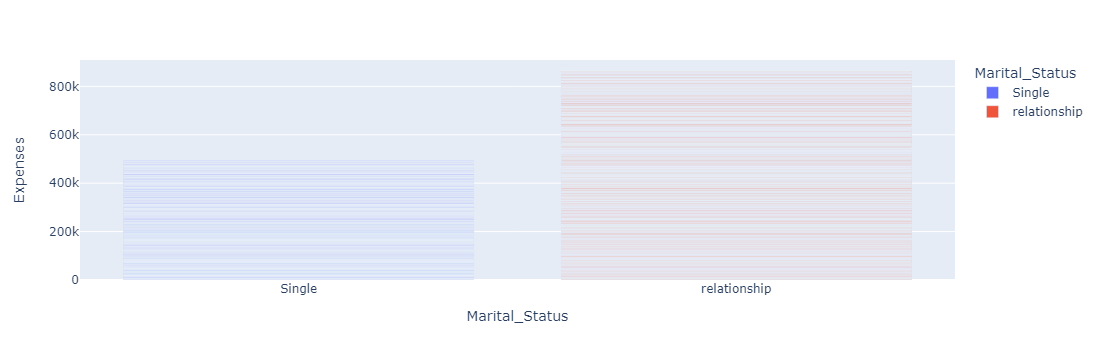

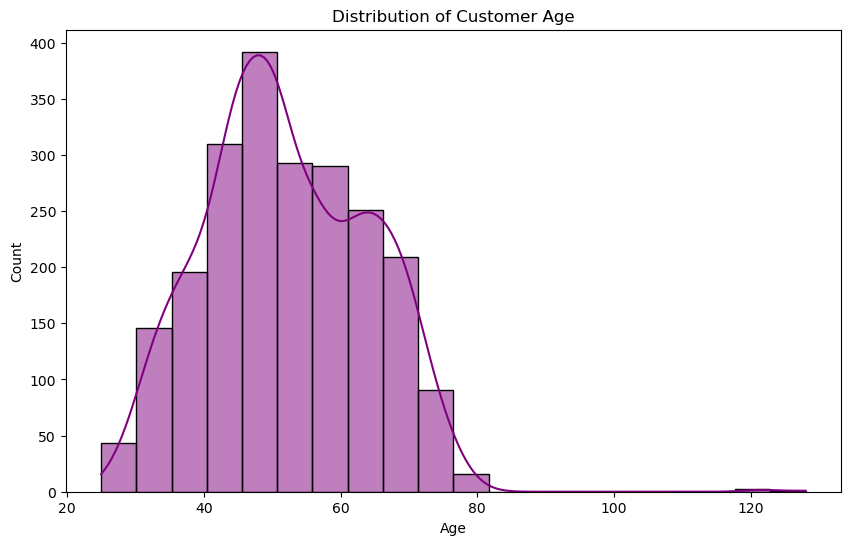

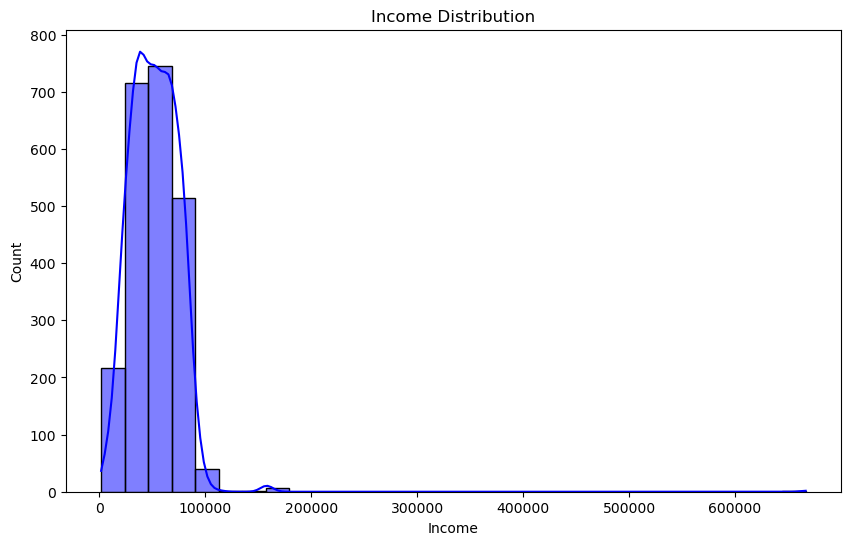

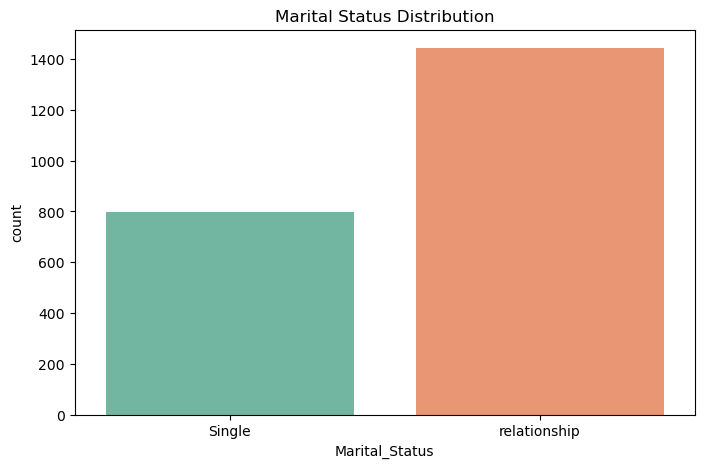

In [83]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


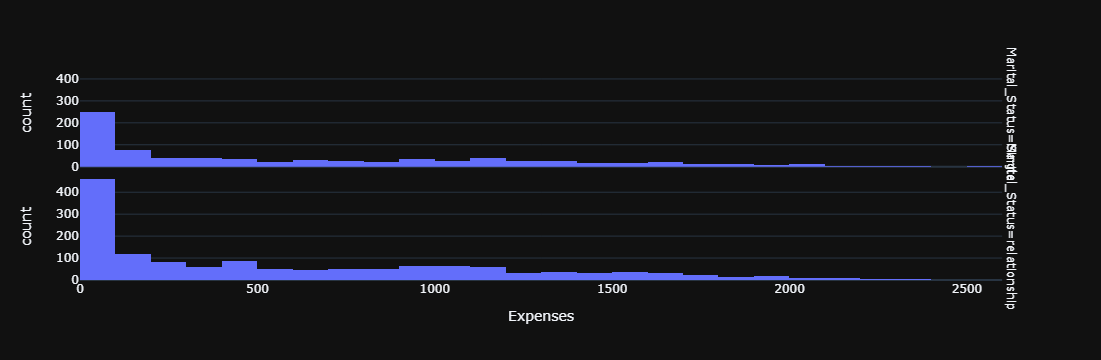

In [85]:
# Less number of single customer
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

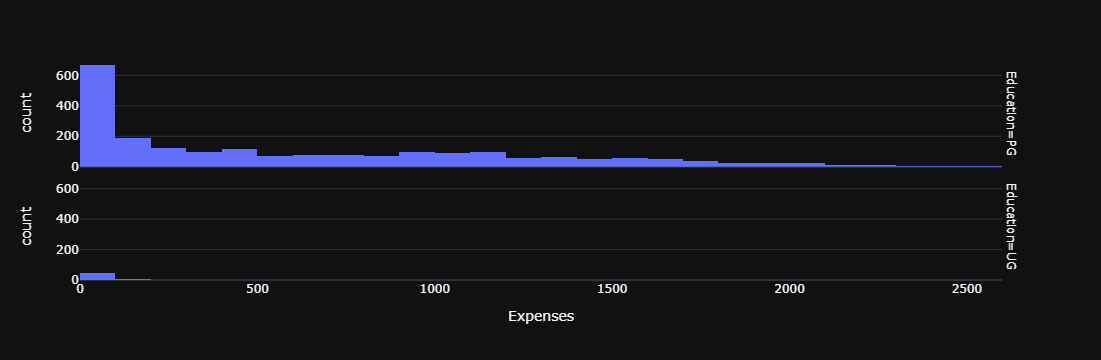

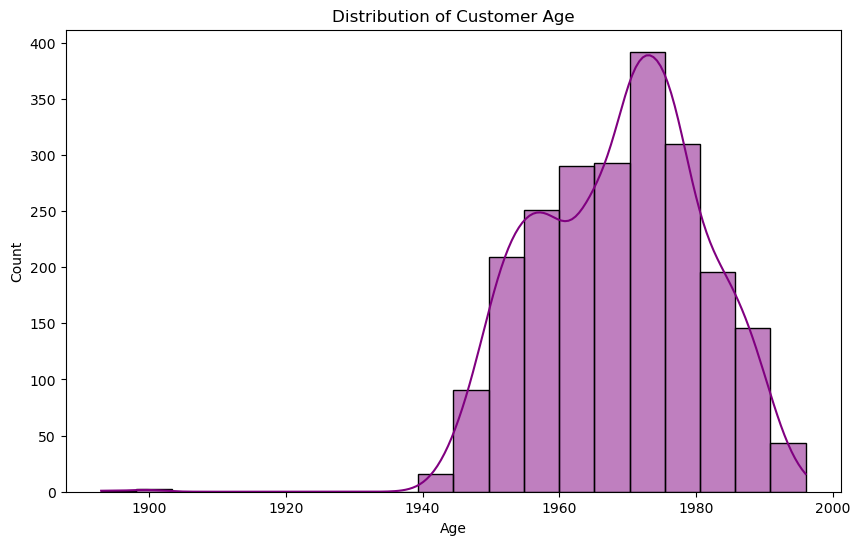

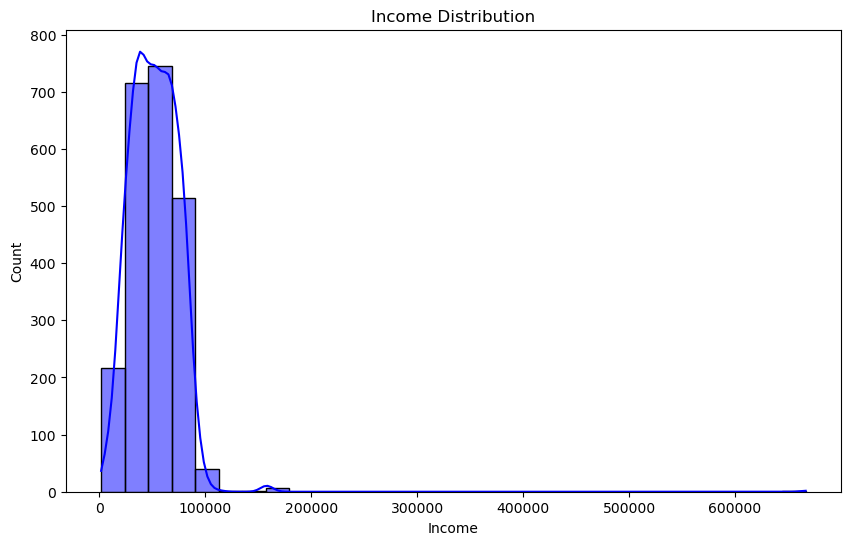

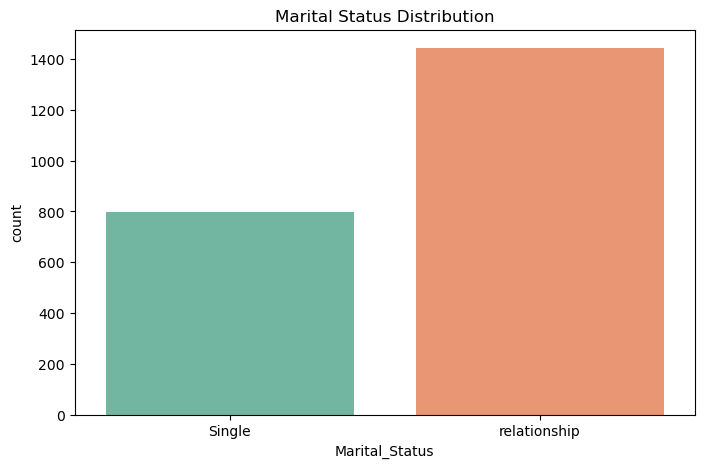

In [89]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


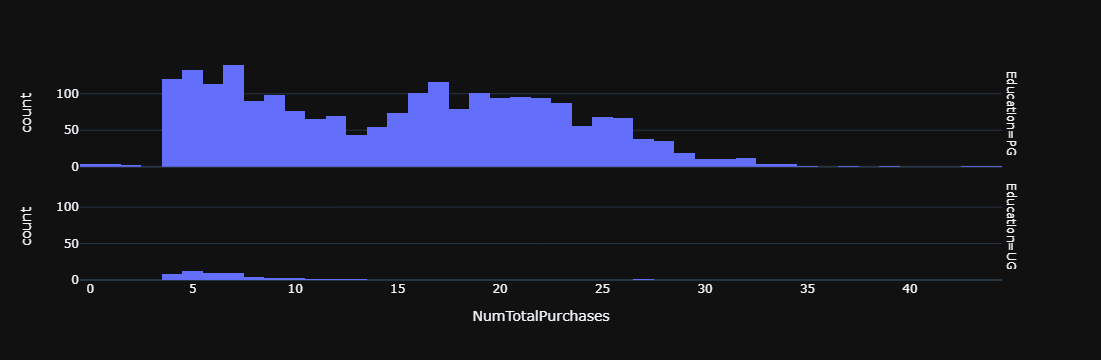

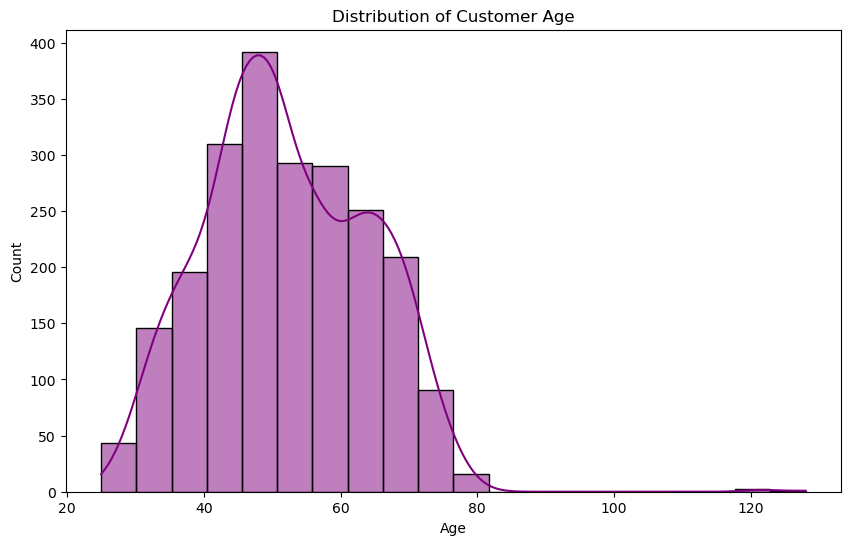

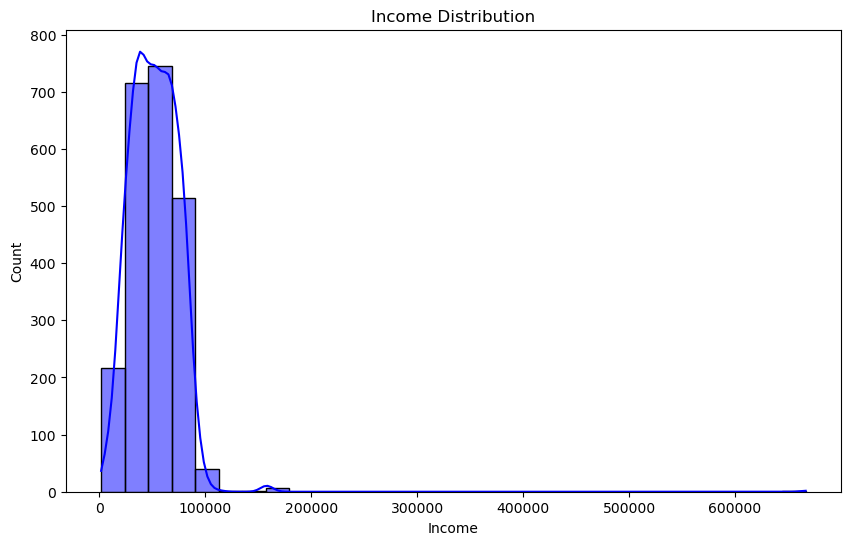

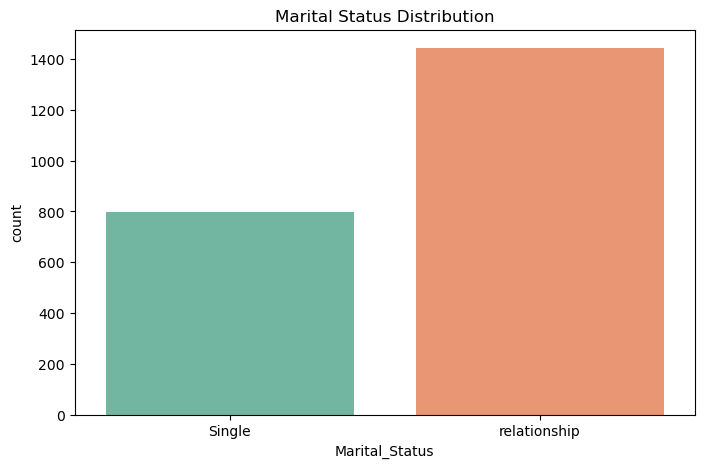

In [91]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()

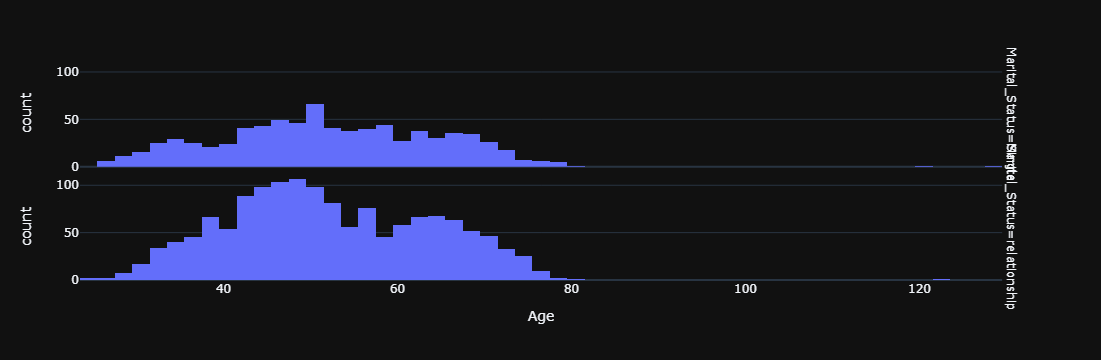

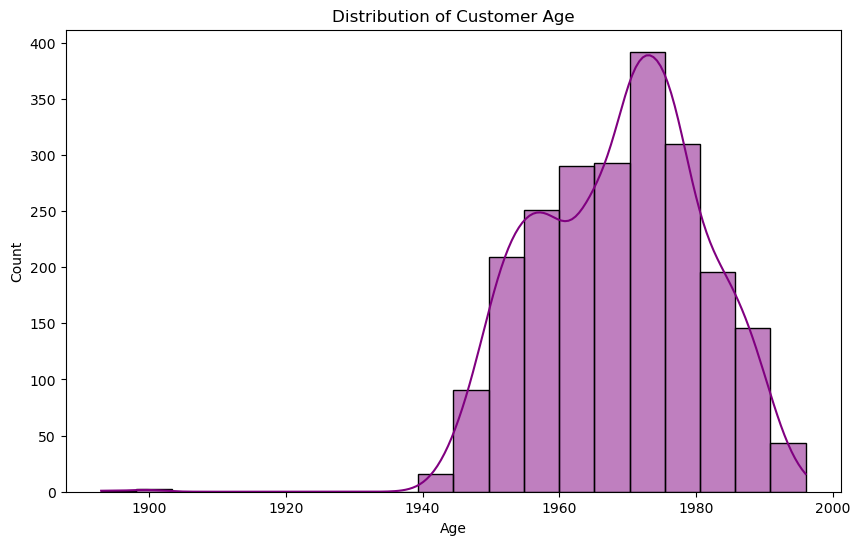

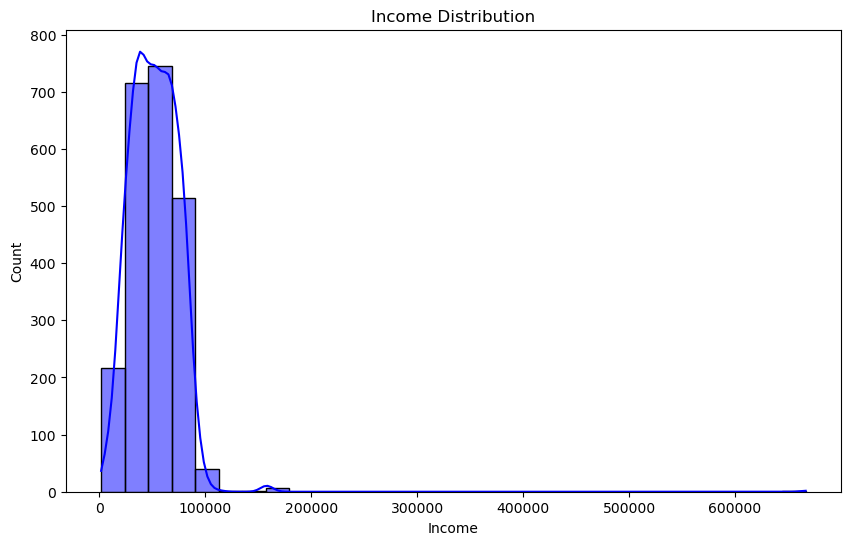

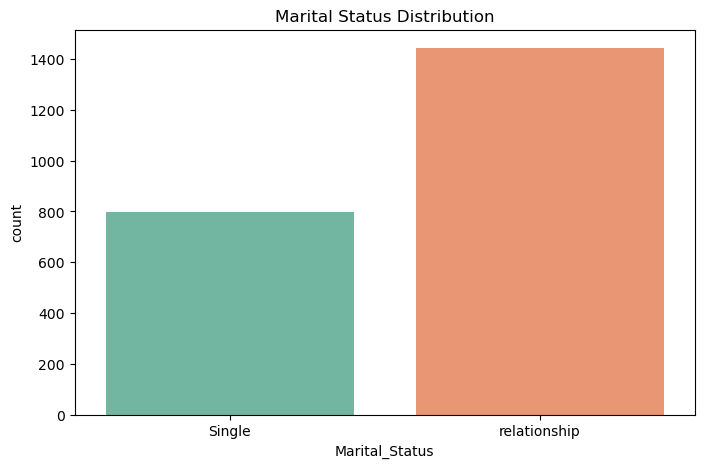

In [93]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()

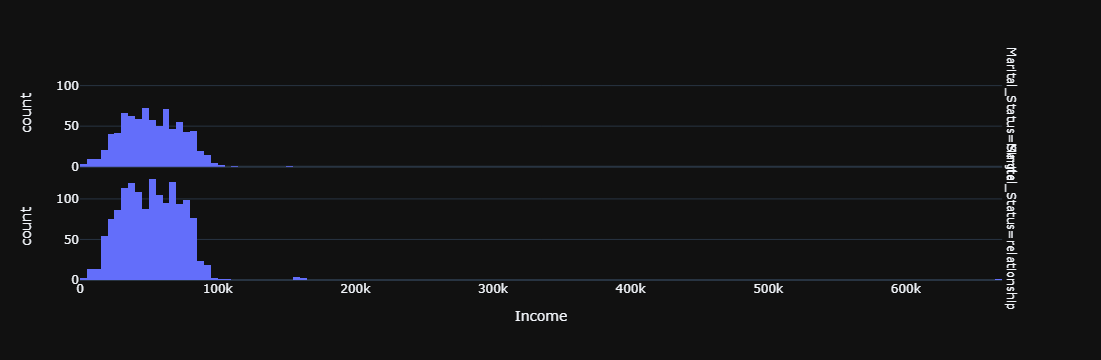

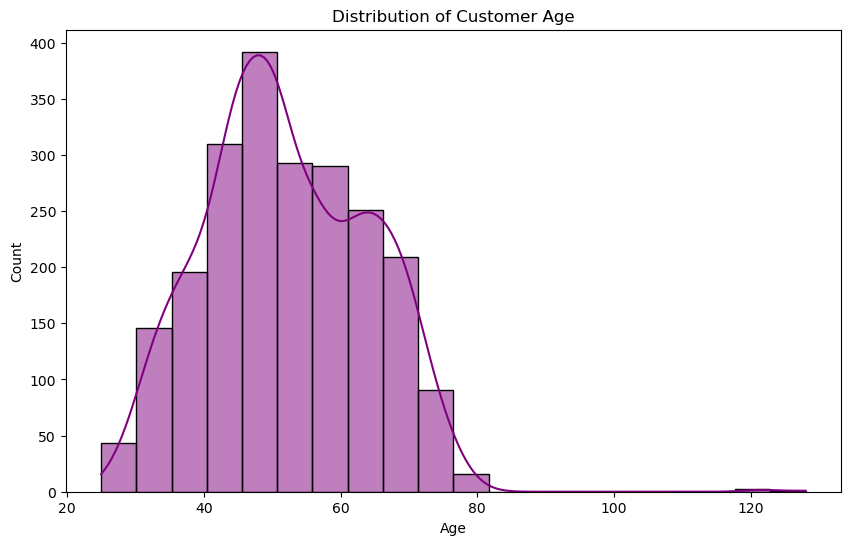

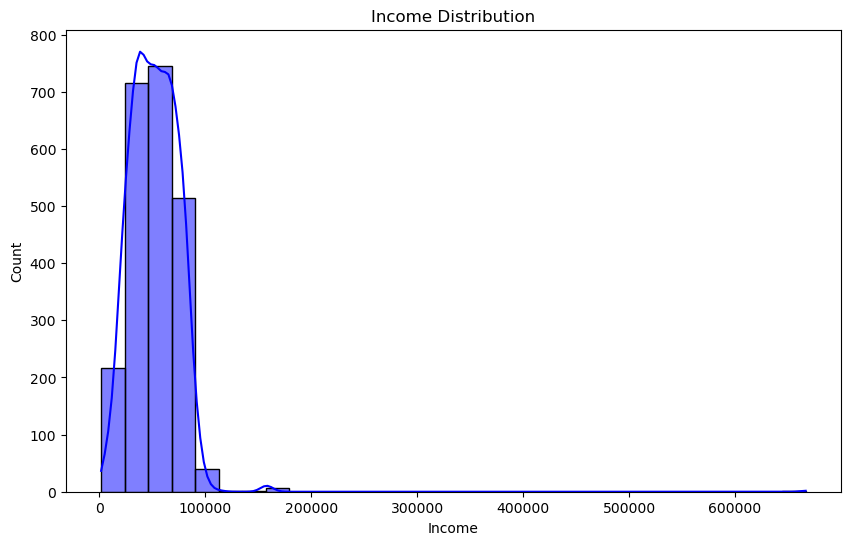

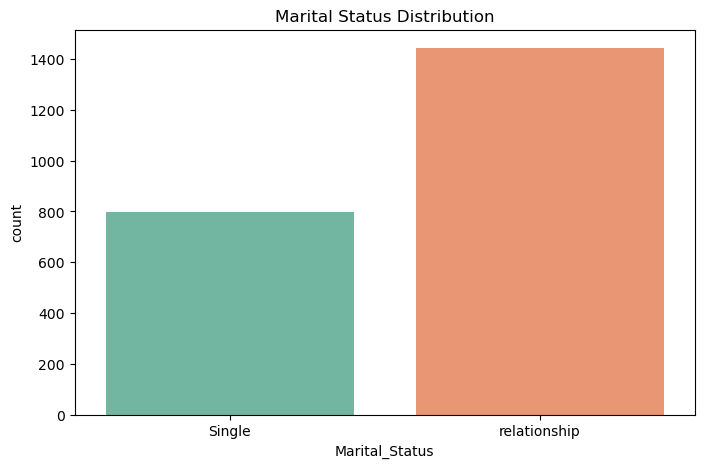

In [95]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


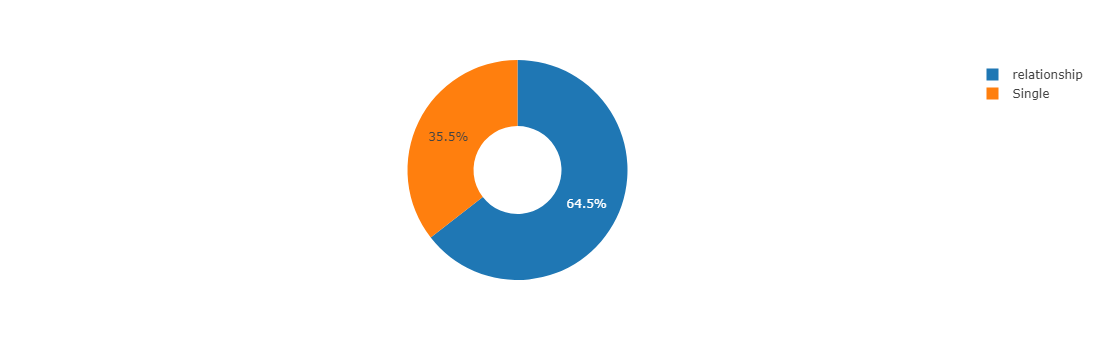

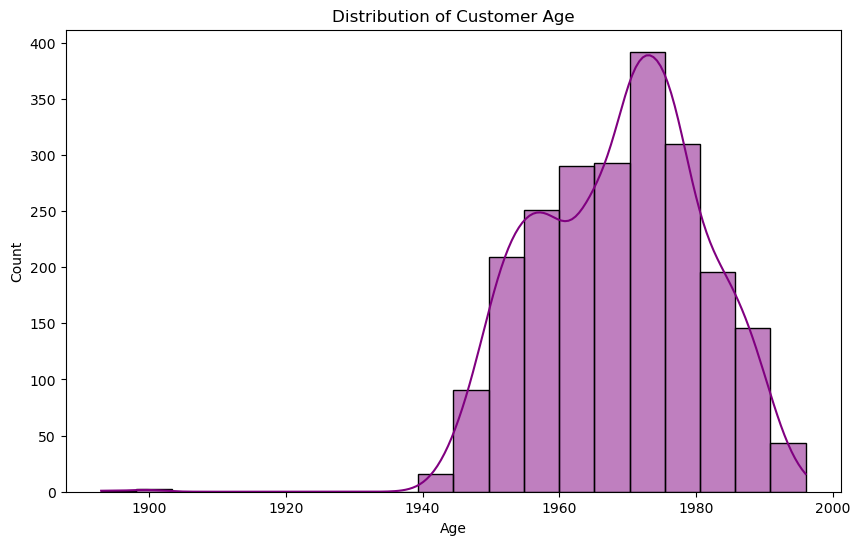

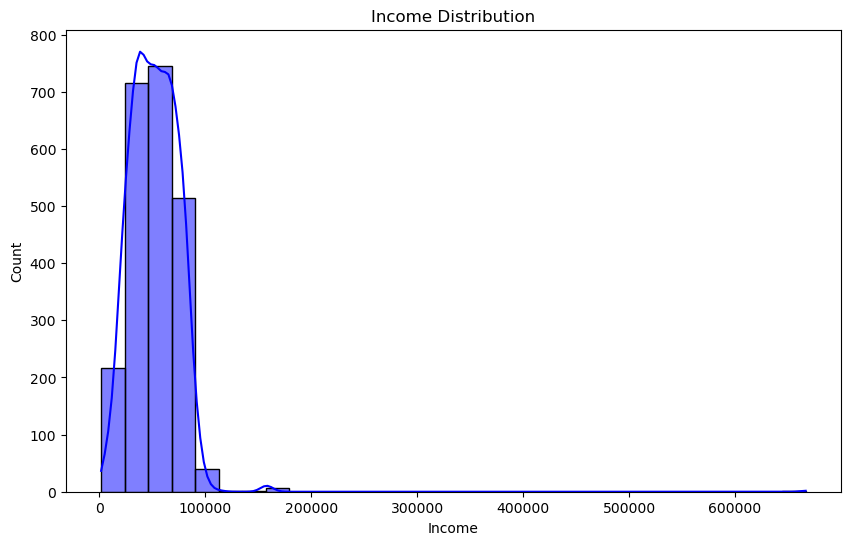

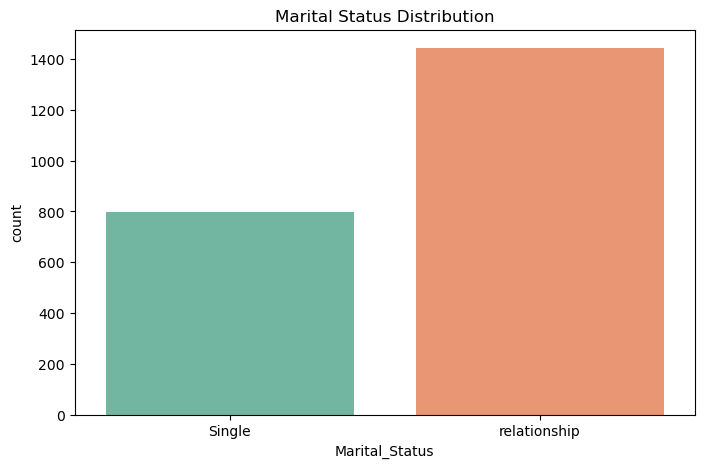

In [97]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.4, template = "gridon")
fig.show ()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


- 35% of the customer are single whereas more 64% are in relationship.

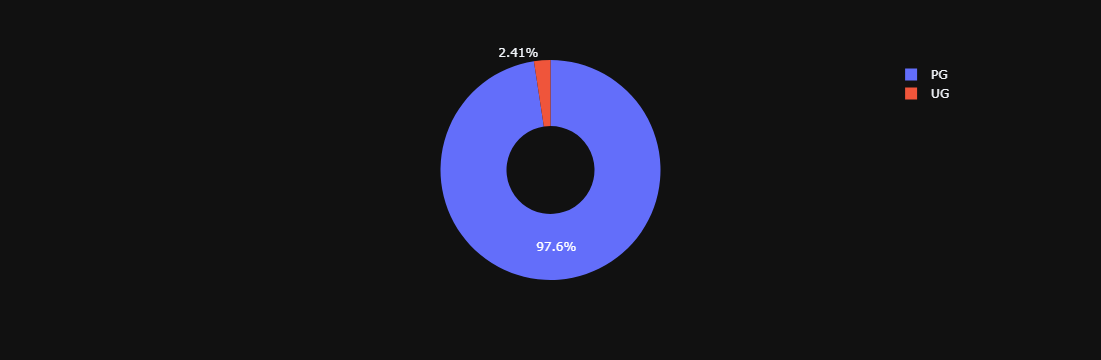

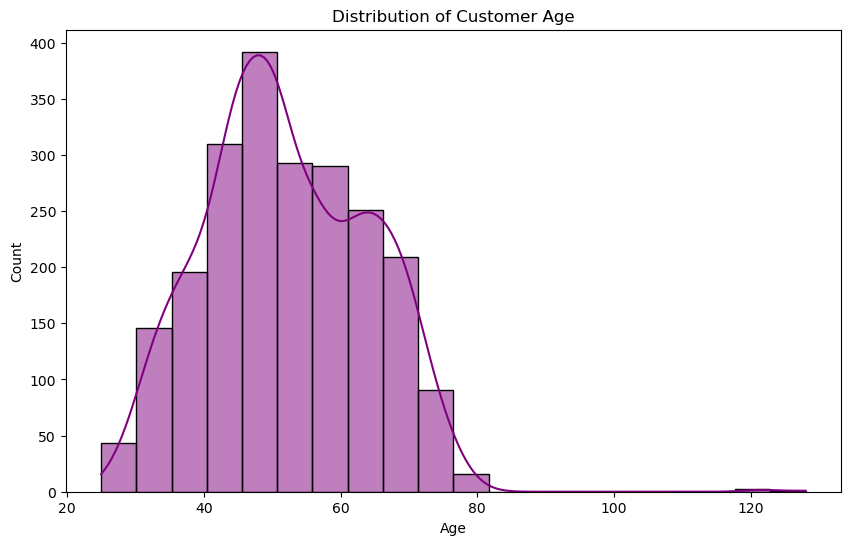

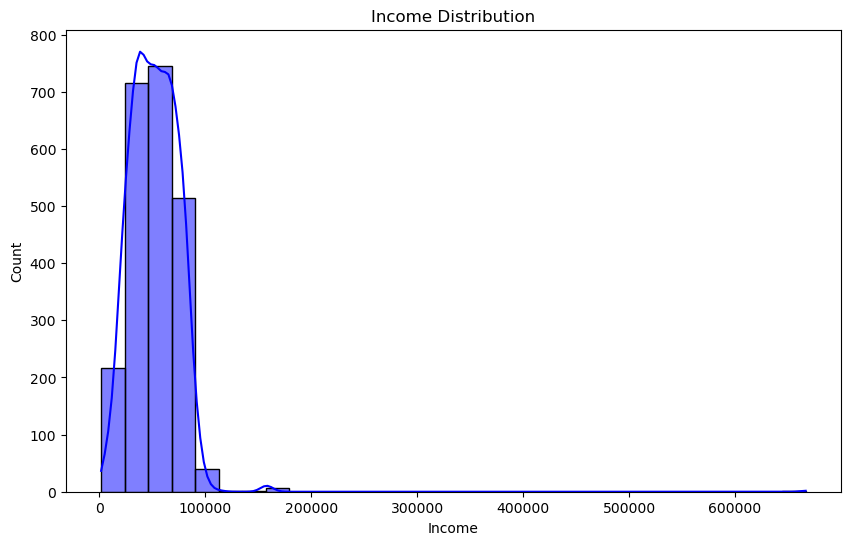

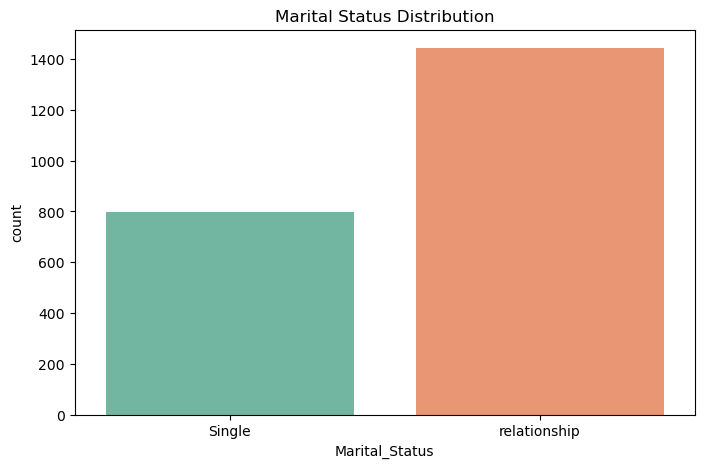

In [99]:
fig =  px.pie (df, names = "Education", hole = 0.4, template = "plotly_dark")
fig.show ()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()

- More than 97% customer are from PG background. and Approx. 2% are from UG. 

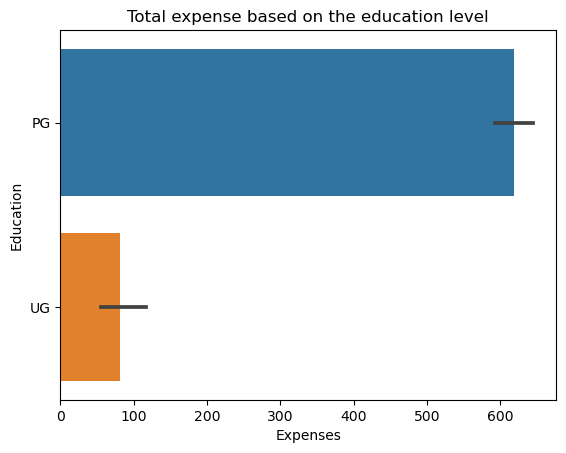

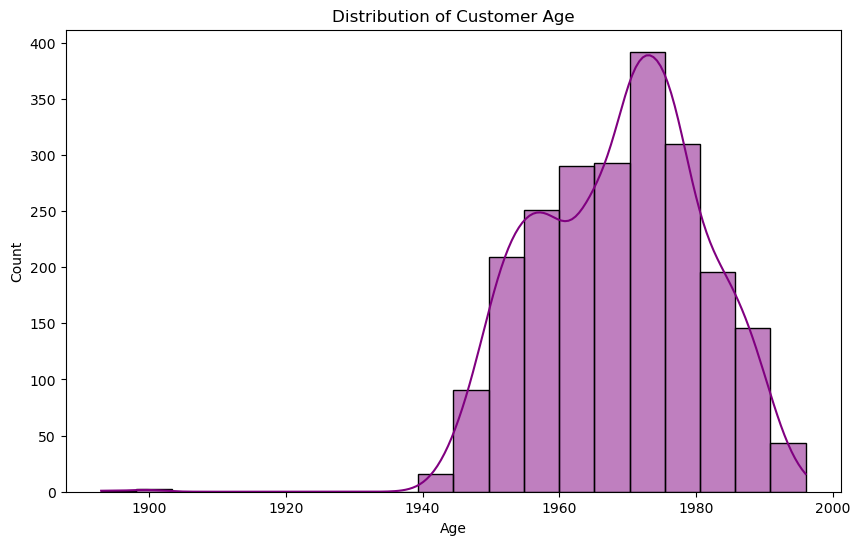

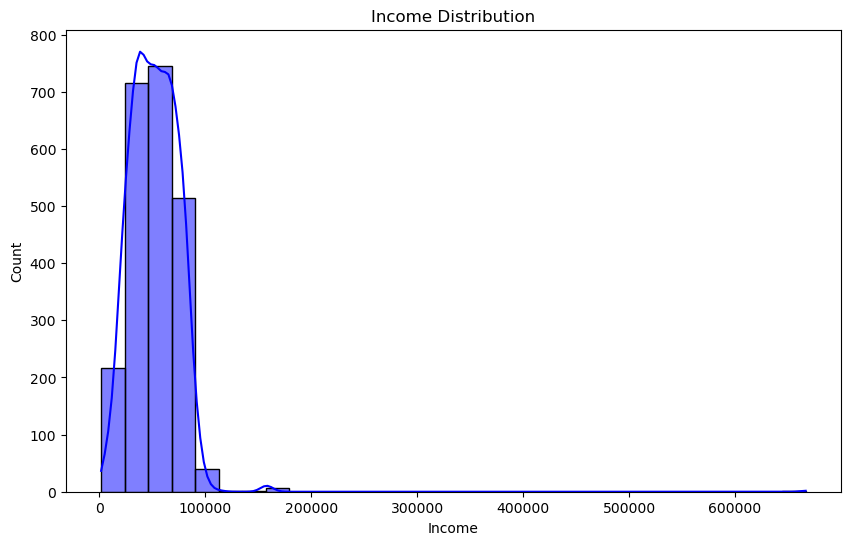

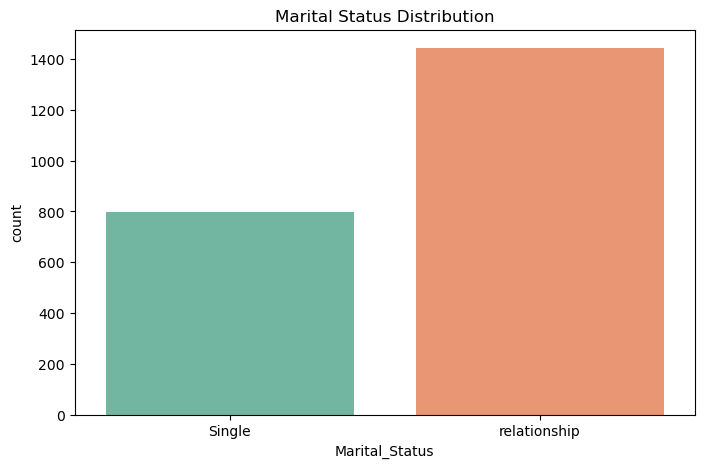

In [103]:
sns.barplot(x=df['Expenses'], y=df['Education'])
plt.title('Total expense based on the education level')
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()

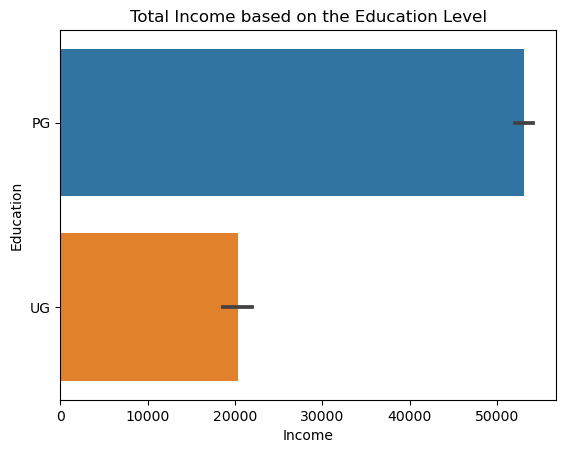

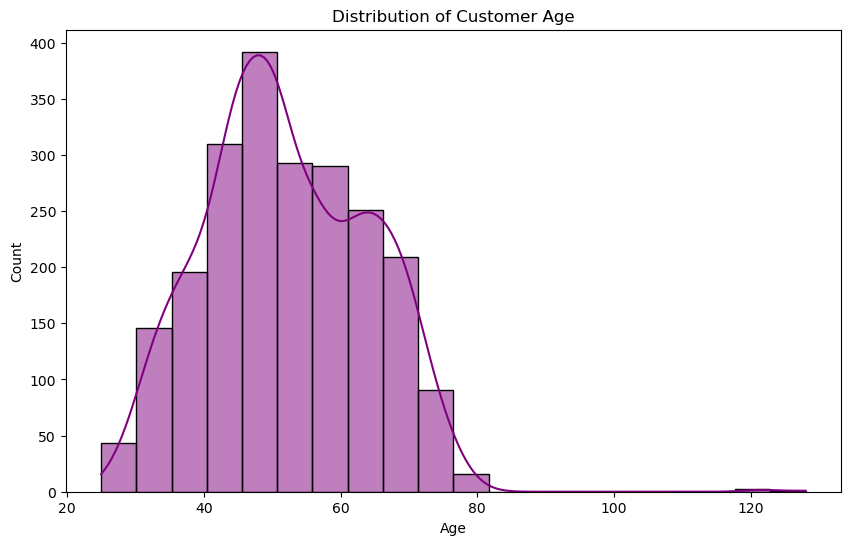

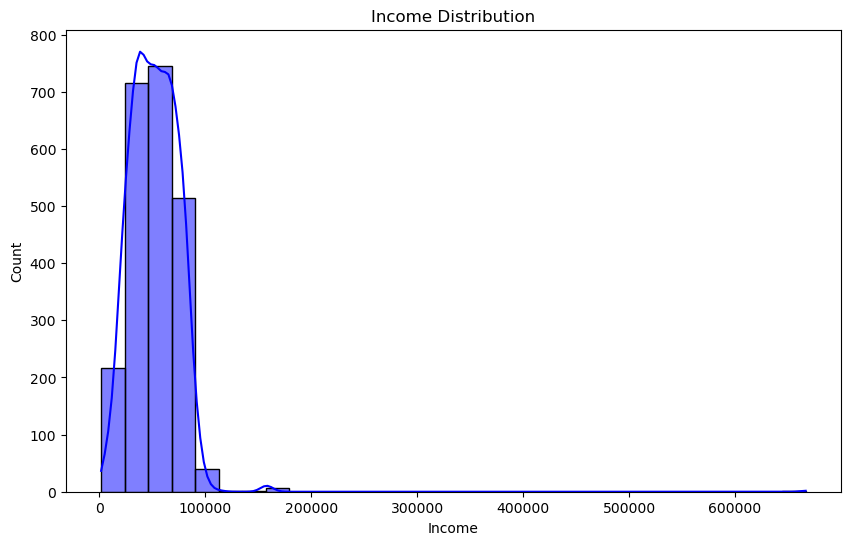

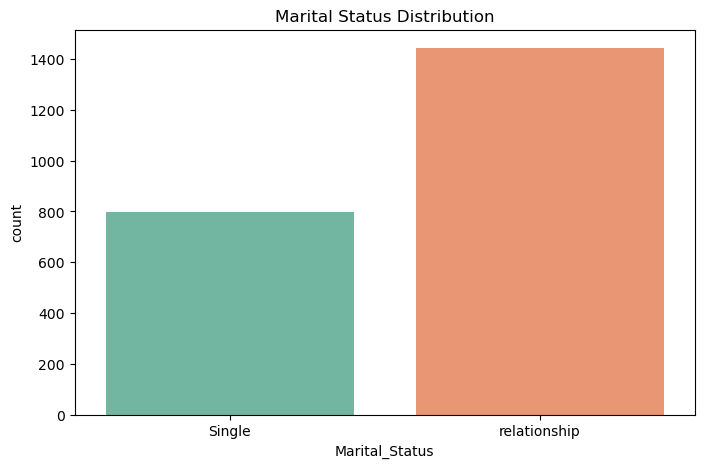

In [105]:
sns.barplot(x=df['Income'], y=df['Education'])
plt.title('Total Income based on the Education Level')
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()

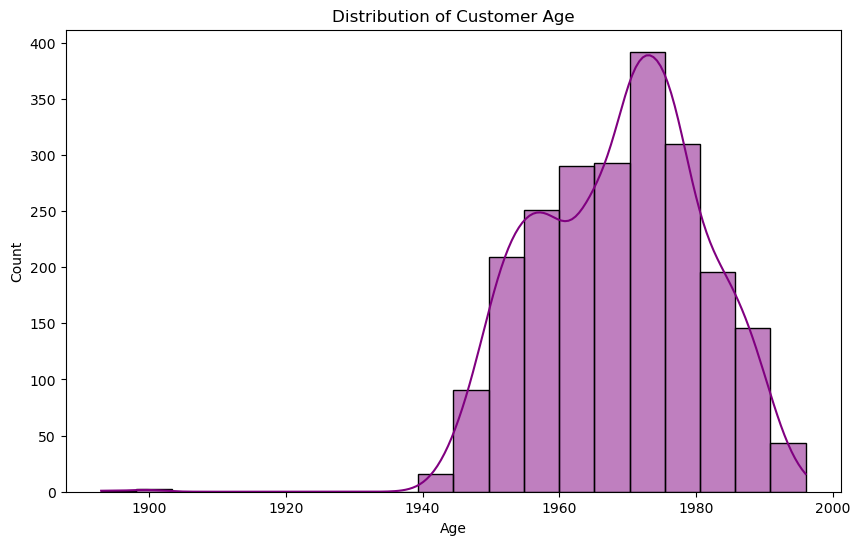

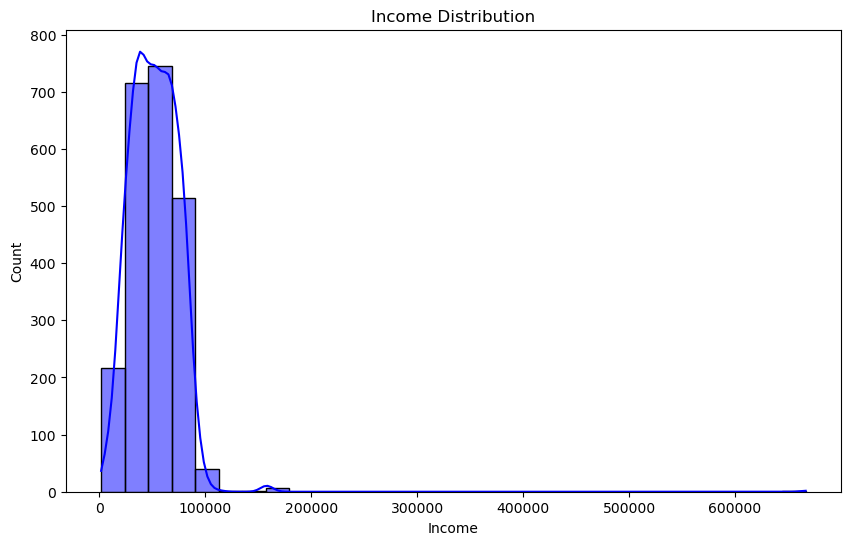

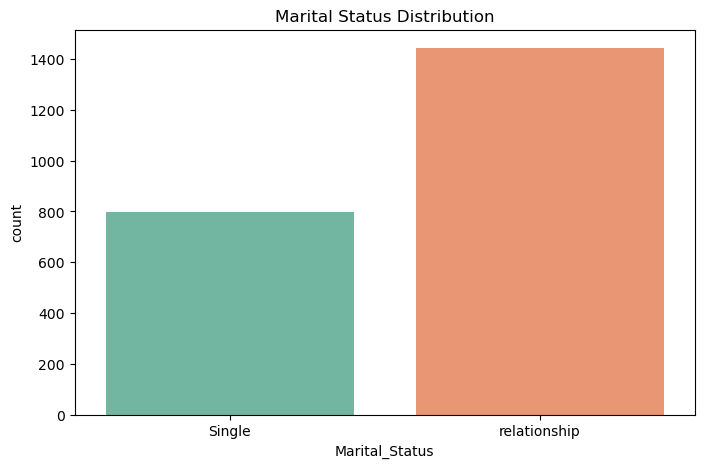

In [107]:
df.describe()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()

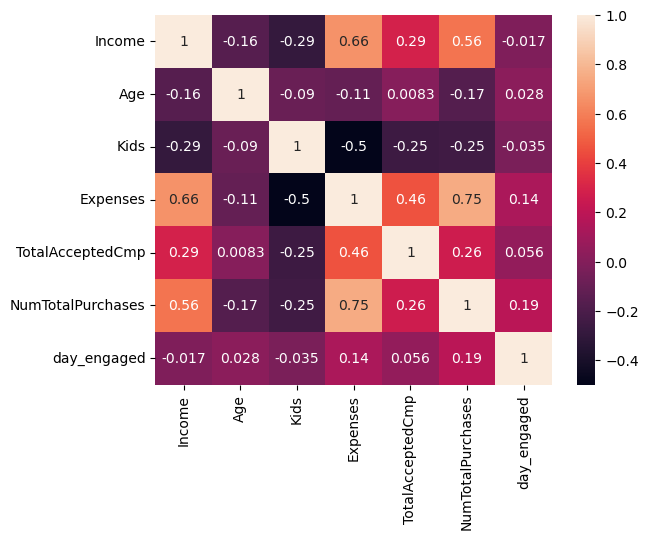

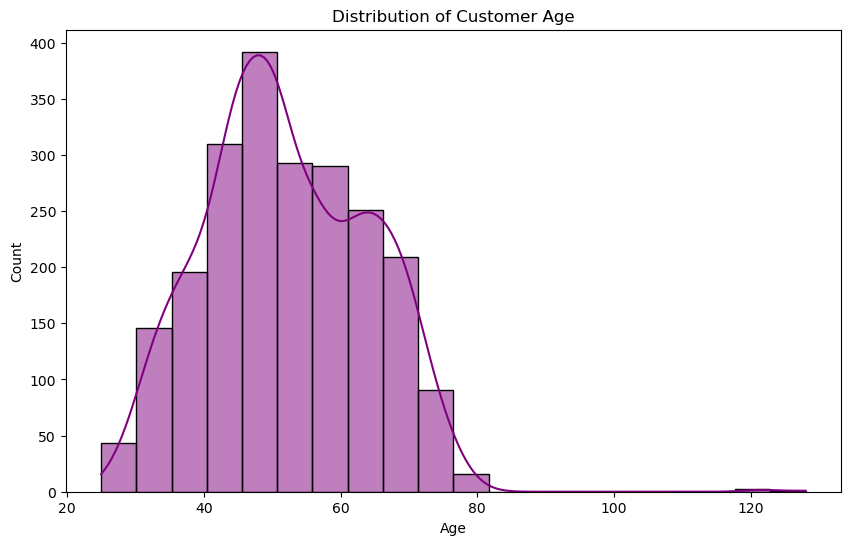

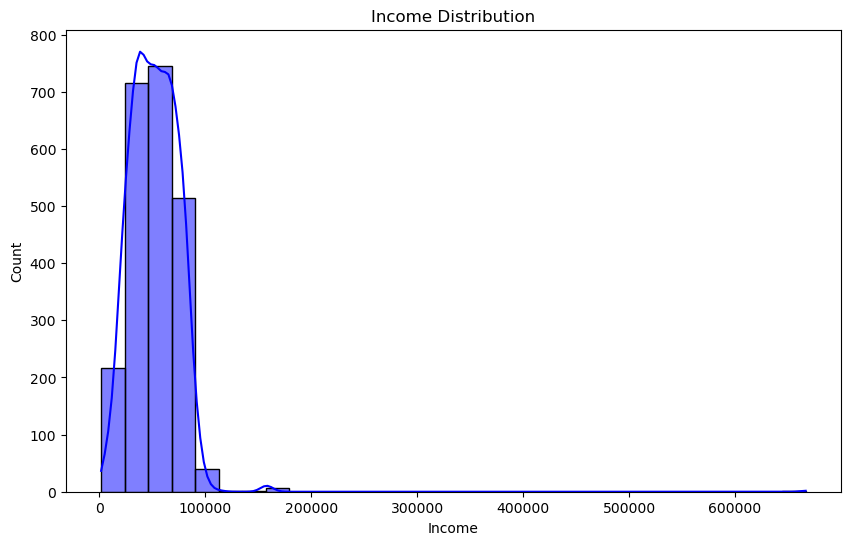

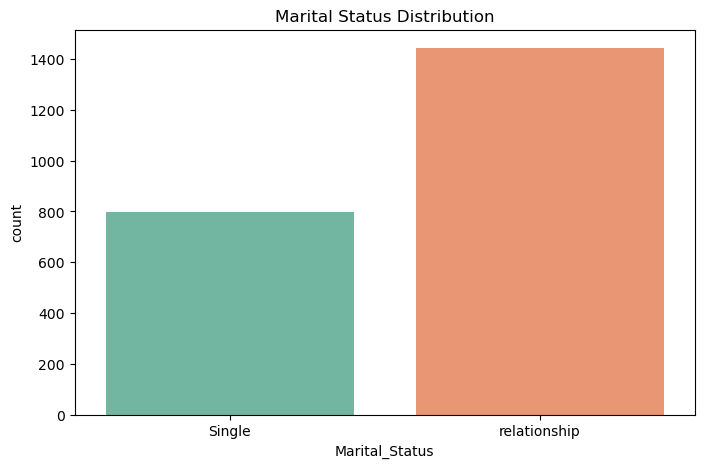

In [109]:
sns.heatmap(df.corr(),annot=True)
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()

In [111]:
obj = []
for i in df.columns:
    if(df[i].dtypes=="object"):
        obj.append(i)

print(obj)

['Education', 'Marital_Status']


In [113]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

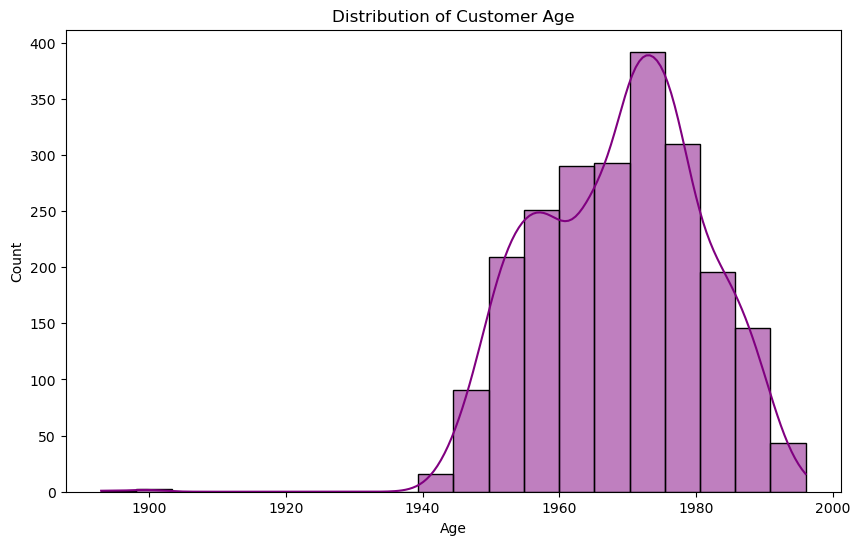

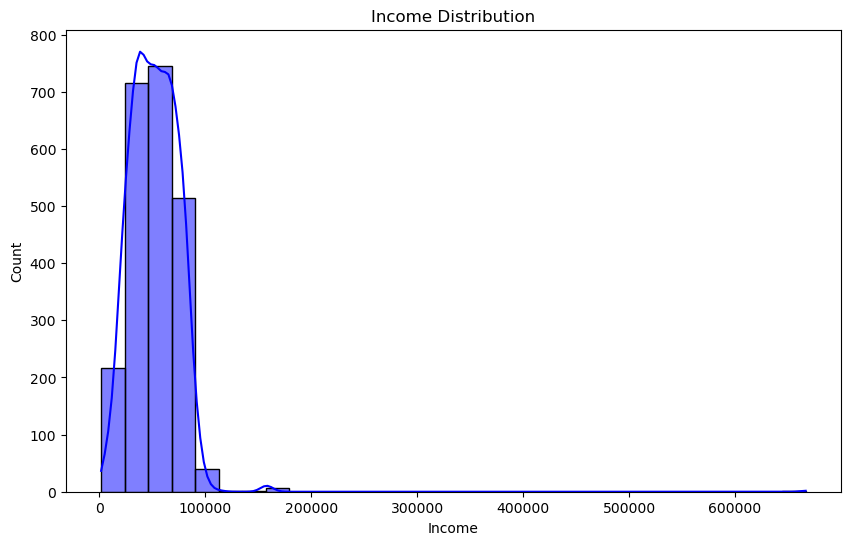

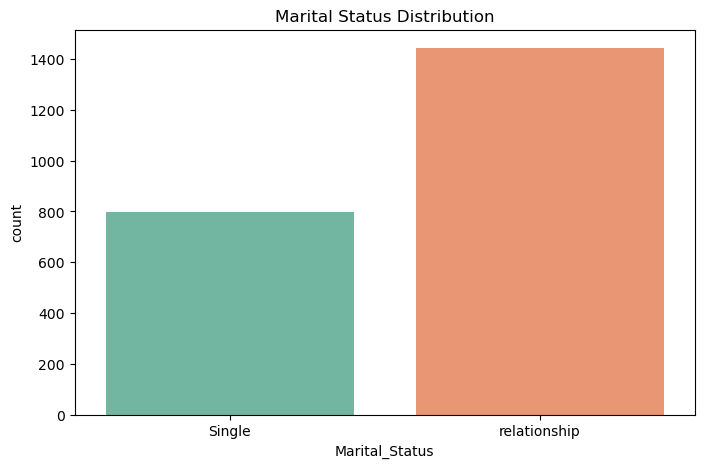

In [117]:
df['Marital_Status'].value_counts()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()

In [119]:
lbl_encode = LabelEncoder()
for i in obj:
    df[i] = df[[i]].apply(lbl_encode.fit_transform)

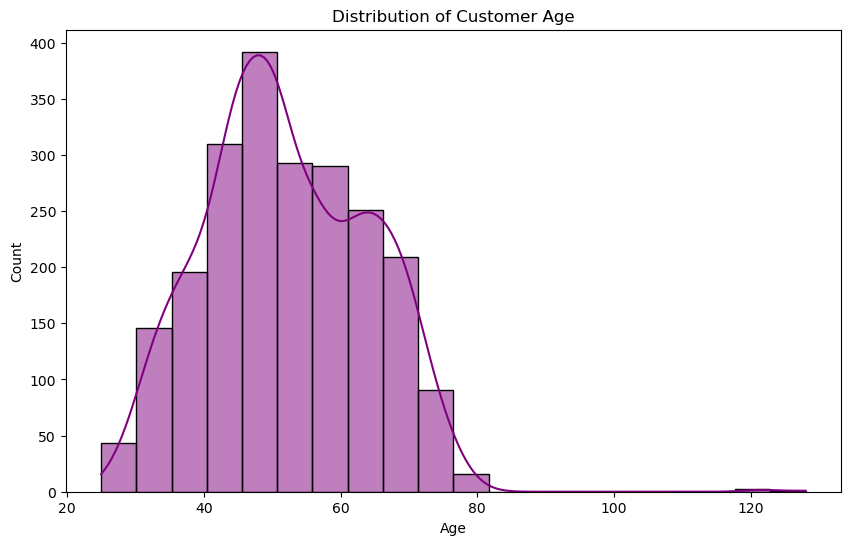

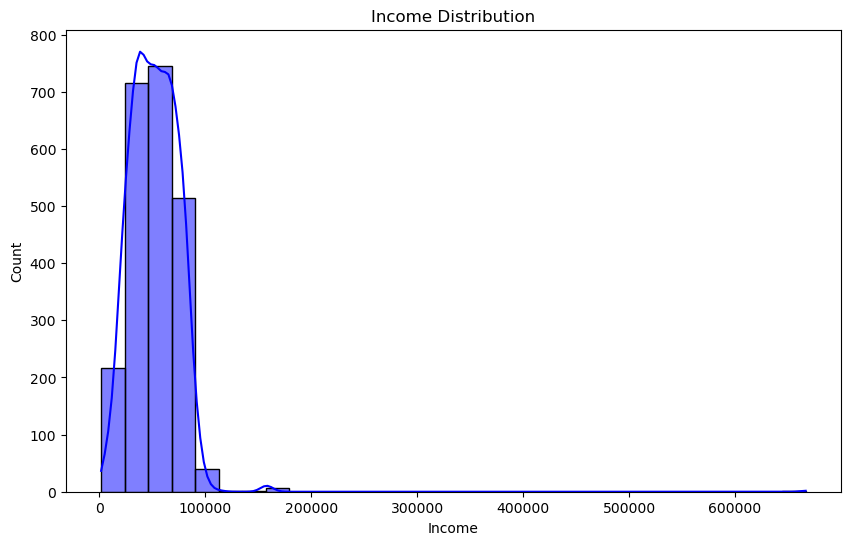

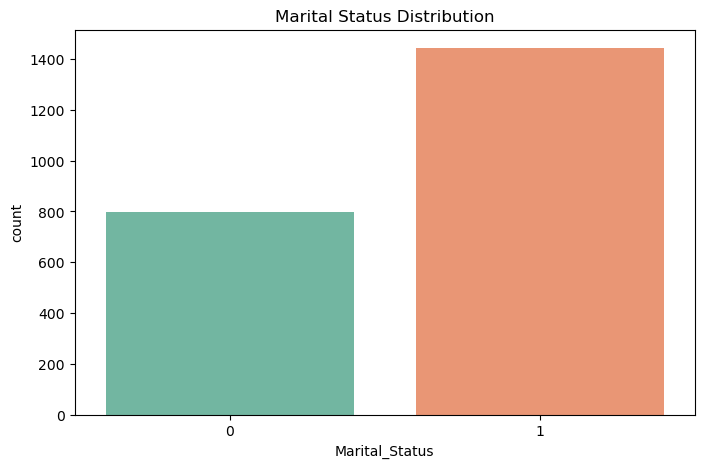

In [123]:
df1 = df.copy()
df1.head()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


## Standardization

In [127]:
from sklearn.preprocessing import StandardScaler

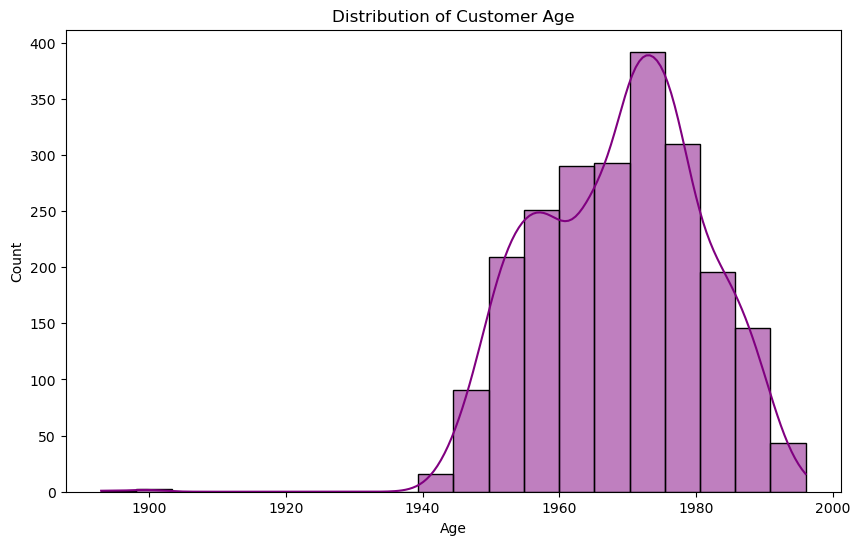

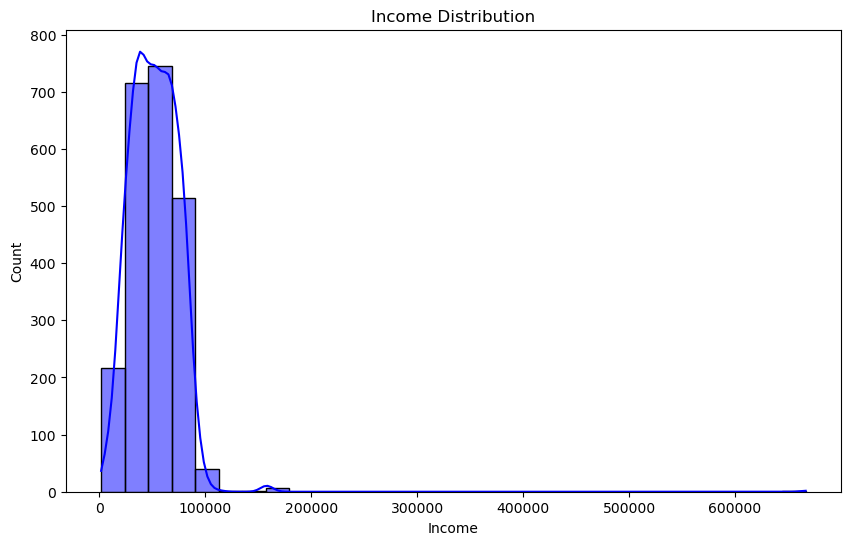

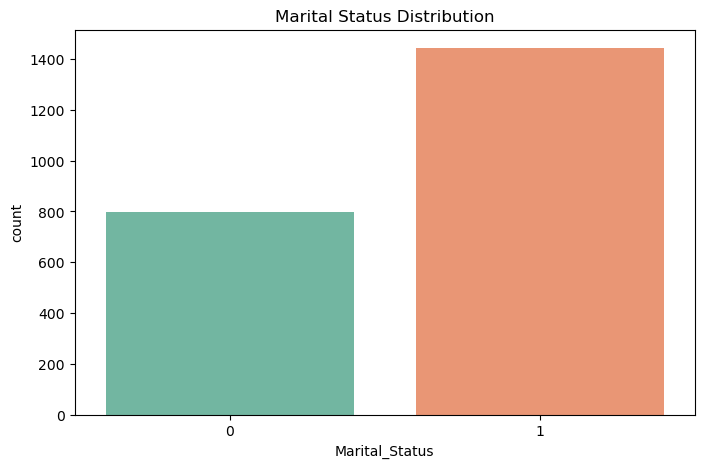

In [129]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


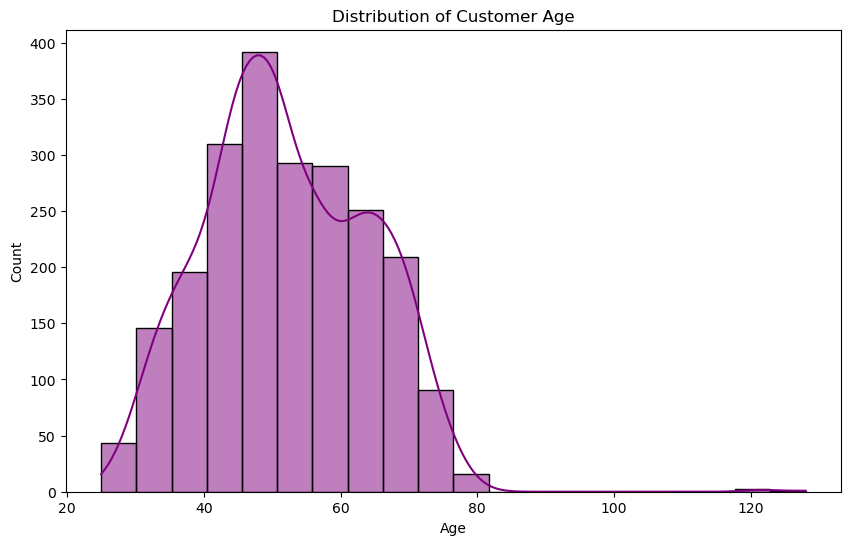

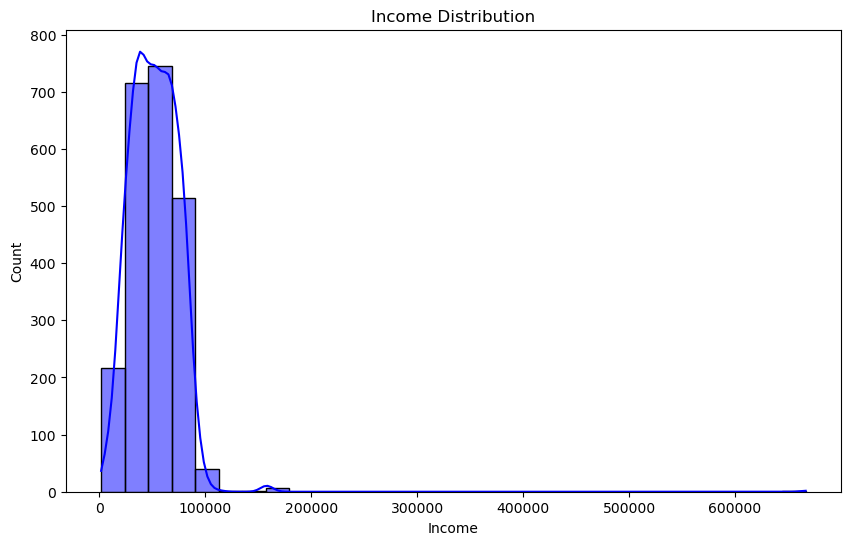

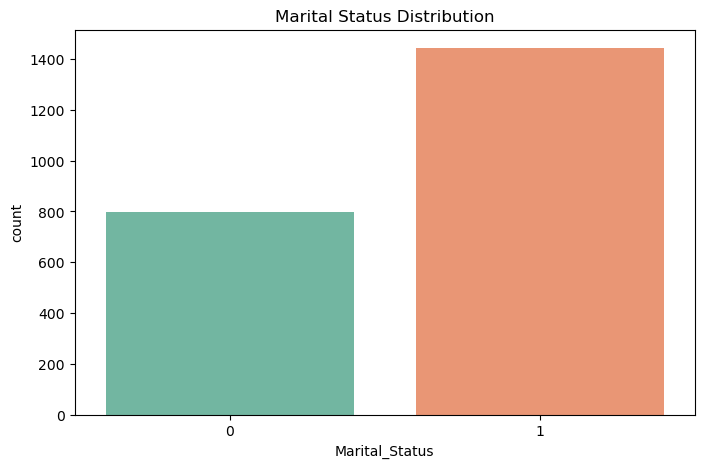

In [131]:
scaled_features_df.head()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


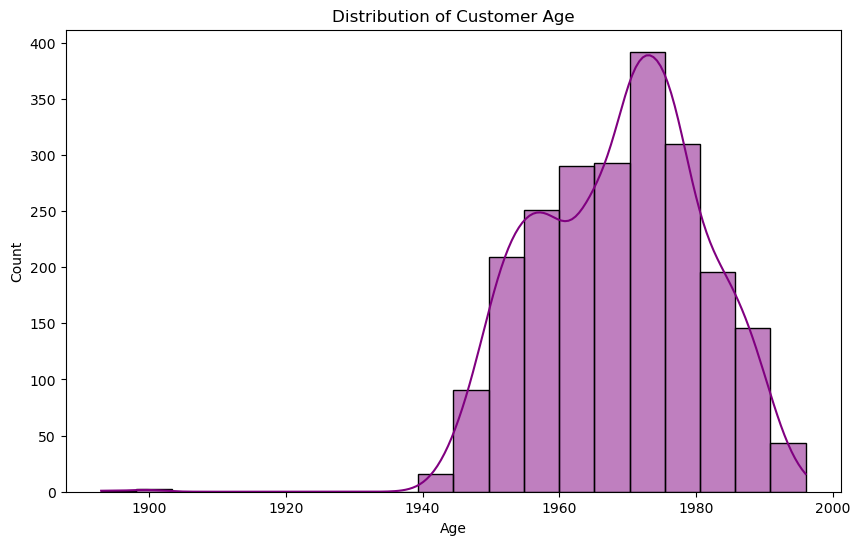

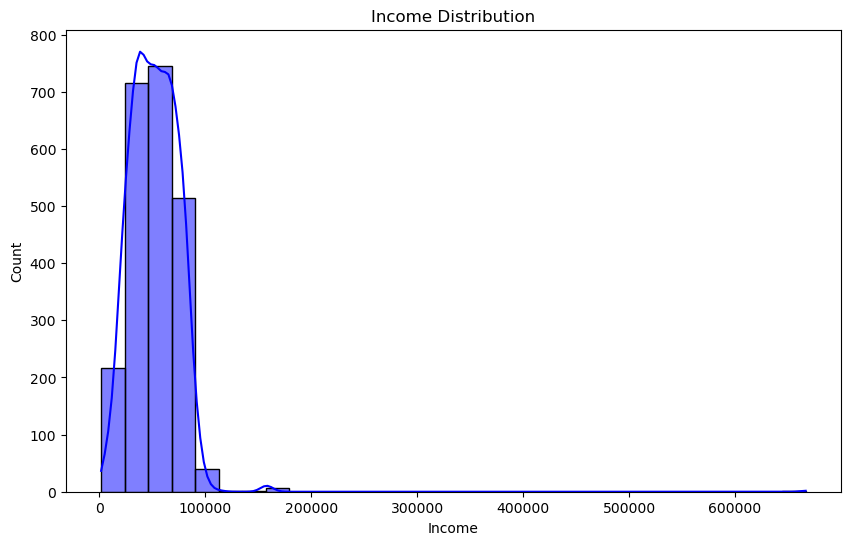

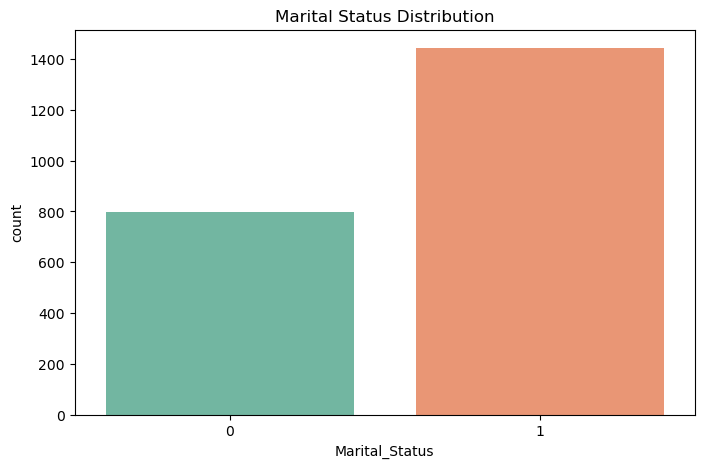

In [133]:
# scaled_features_df.describe()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


## Elbow Method

In [135]:
from sklearn.cluster import KMeans

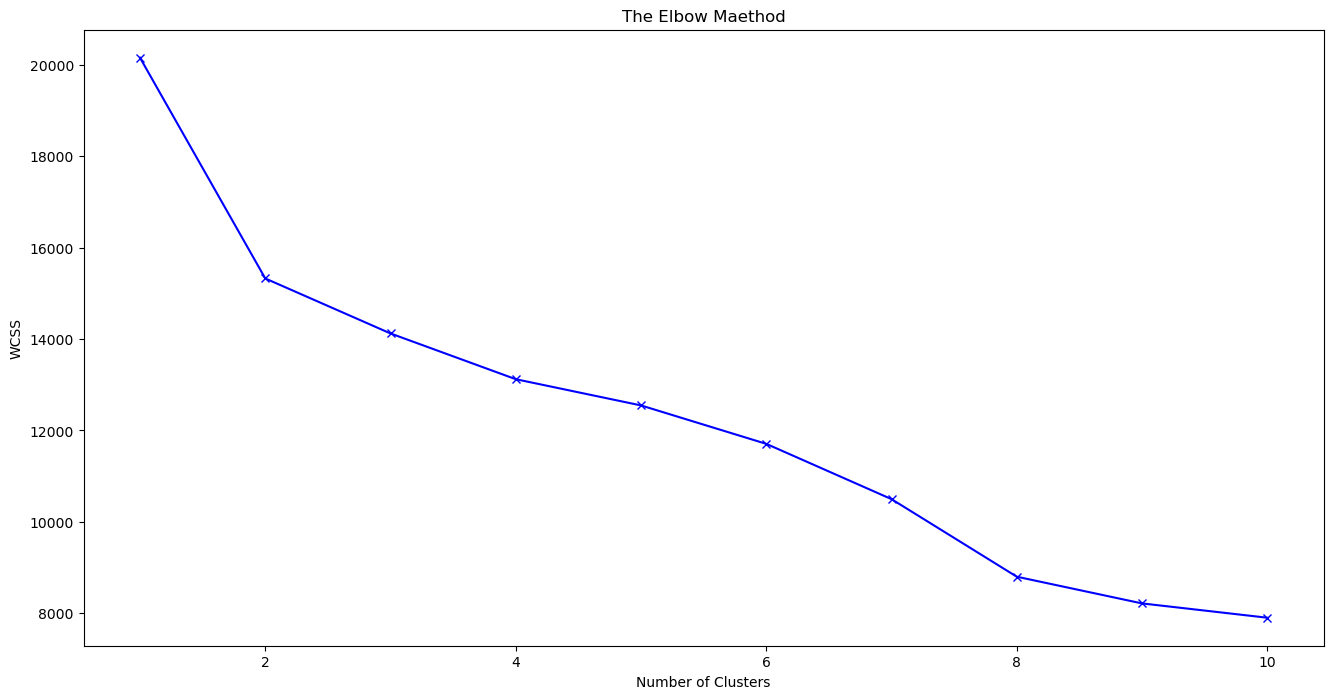

In [137]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features_df)
    wcss.append(kmeans.inertia_)
    # inetia_: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
plt.figure(figsize=(16,8))
plt.plot(range(1,11), wcss, 'bx-')
plt.title('The Elbow Maethod')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

As it is not very clear from the elbow method that which value of K to choose

- Silhouette Score

In [139]:
from sklearn.metrics import silhouette_score

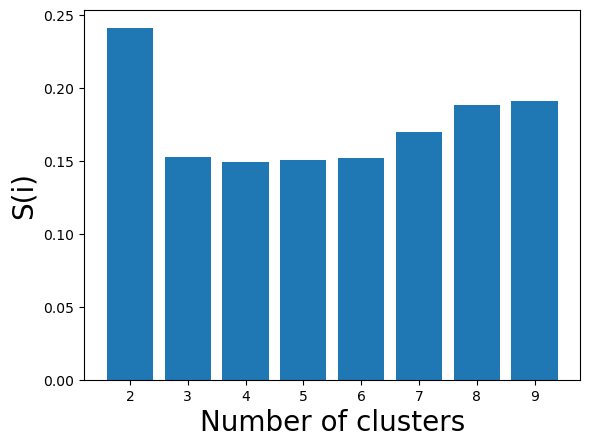

In [141]:
silhouette_scores = []
for i in range(2,10):
    m1 = KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df)))
    
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('S(i)', fontsize=20)
plt.show()

In [143]:
# Now we are using Silhouette score to measure the value of K
silhouette_scores

[0.24134319071976487,
 0.15266919887124616,
 0.1493363124853176,
 0.15040238904804204,
 0.1516852276933092,
 0.1699352060464947,
 0.18857498547238058,
 0.19121503915941665]

In [145]:
# Getting the maximum value of silhouette score and adding 2 in index beacure index starts from 2

sc = max(silhouette_scores)
num_of_clusters = silhouette_scores.index(sc)+2
print("Number of Cluster Required is: ", num_of_clusters)

Number of Cluster Required is:  2


## Model Building

In [148]:
# Training a prediction using K-Means Algorithm.

kmeans = KMeans(n_clusters = num_of_clusters, random_state=42).fit(scaled_features_df)
pred = kmeans.predict(scaled_features_df)

In [150]:
pred

array([1, 0, 1, ..., 1, 1, 0])

In [152]:
# Appending those cluster value into the main dataframe (without standardization)
df['cluster'] = pred + 1

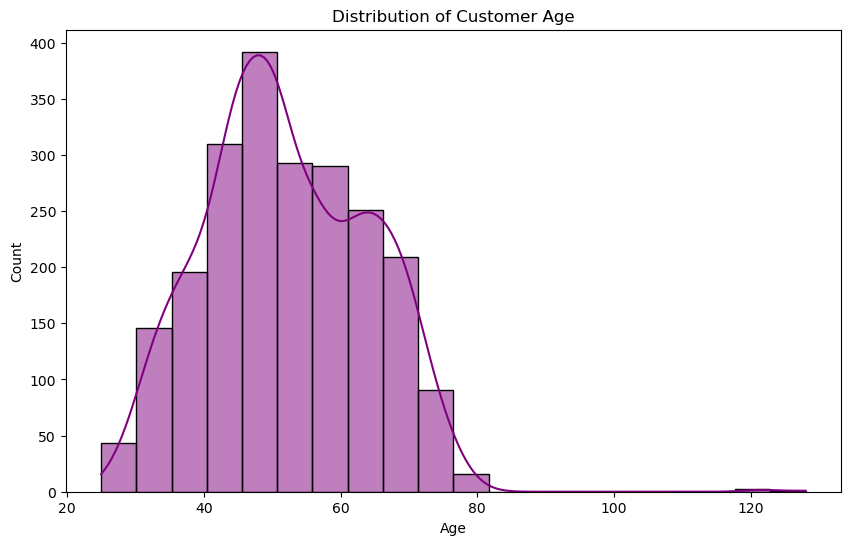

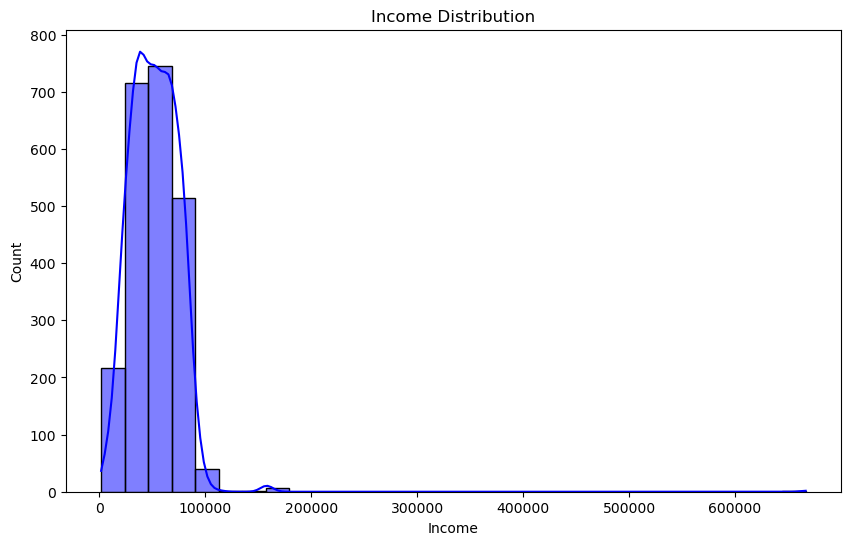

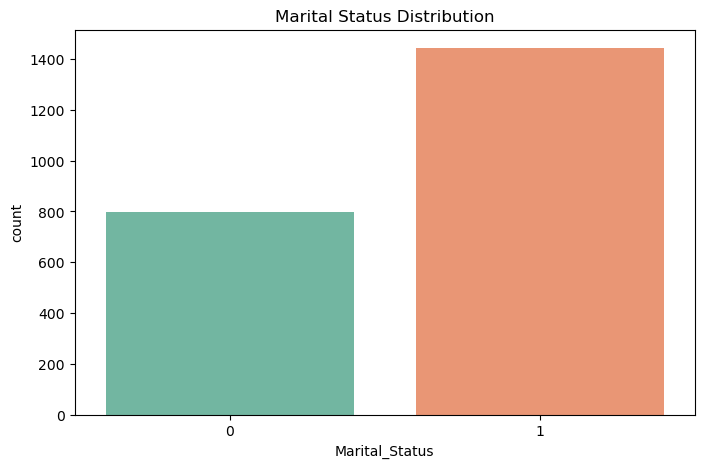

In [156]:
df.head()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


In [158]:
# saving clustering csv for Tableau
df.to_csv('data_visuals2.csv')

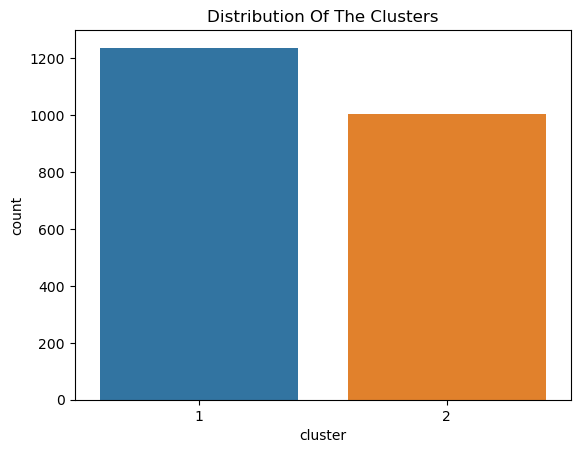

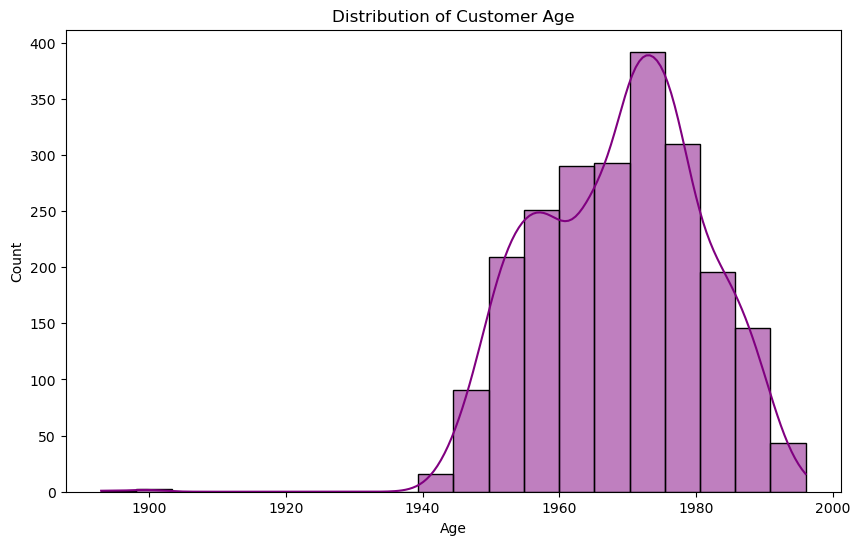

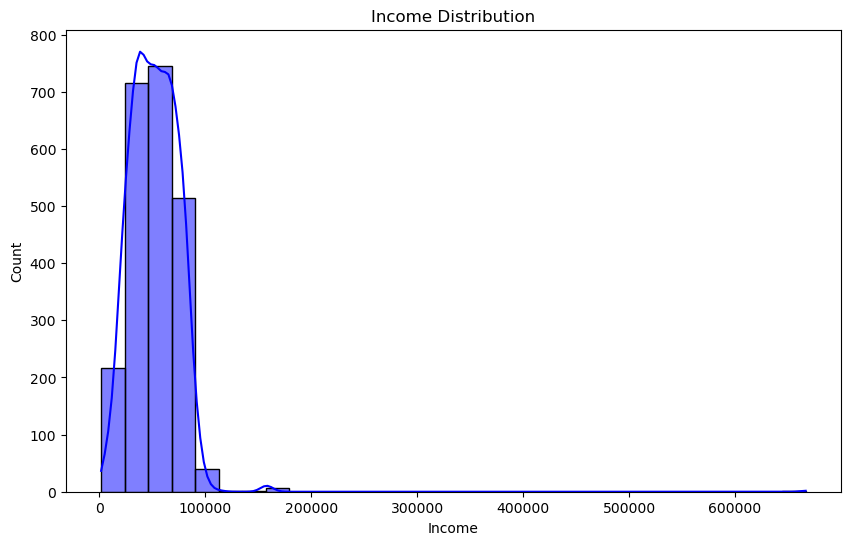

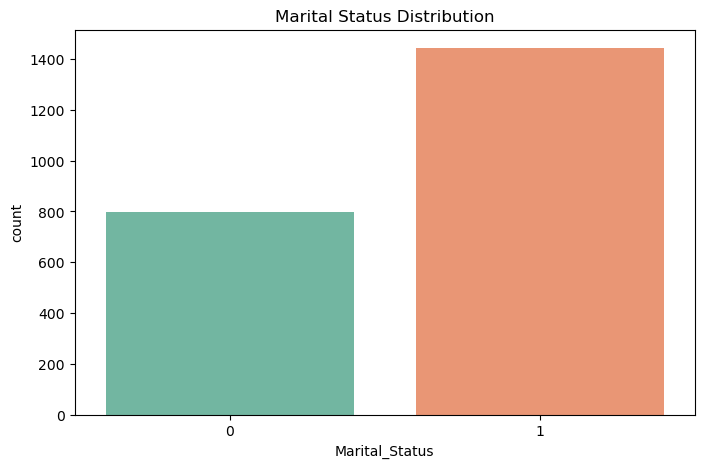

In [162]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()
# Visualizing distribution of Age
df['Age'] = 2021 - df['Age']
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


### As we can see here that weightage of customer are more in cluster 1 as compare to other.

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

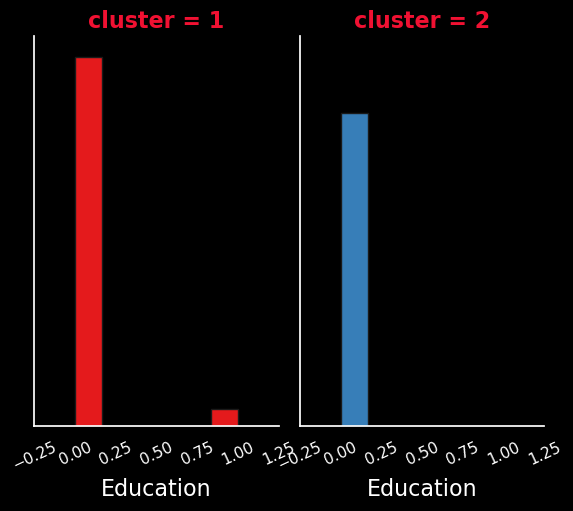

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

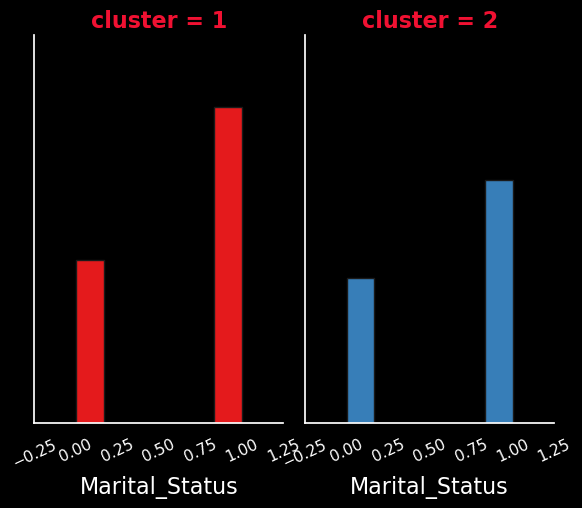

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

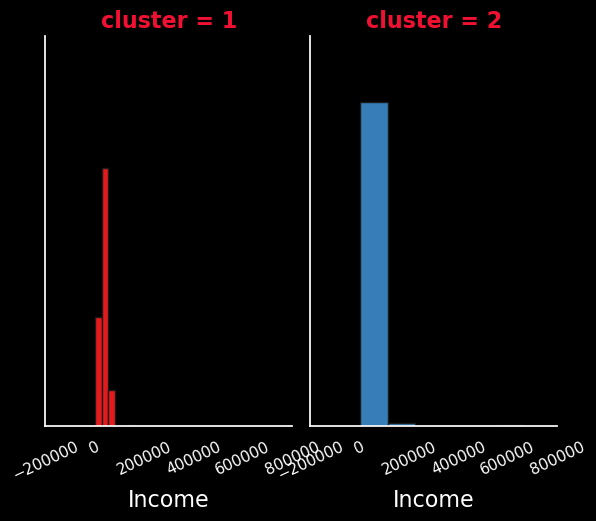

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

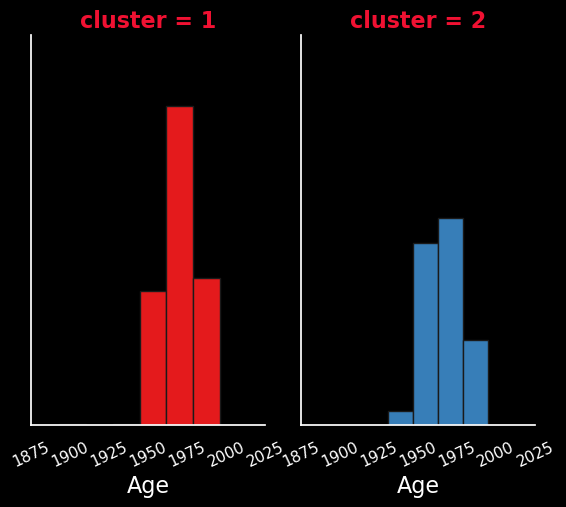

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

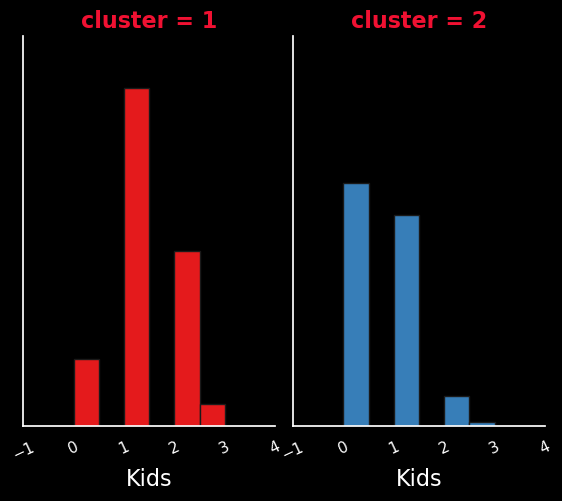

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

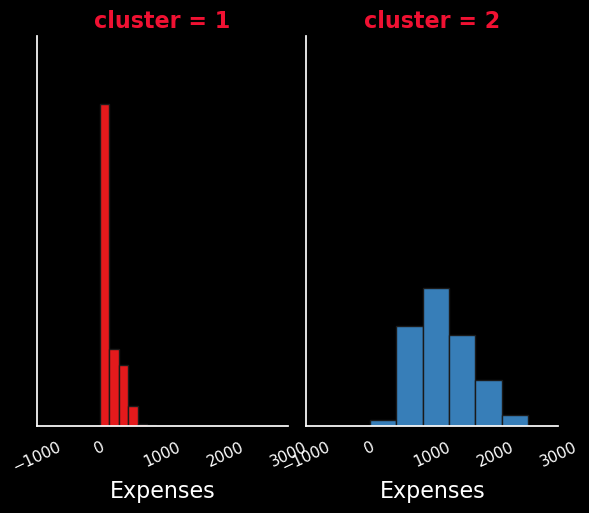

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

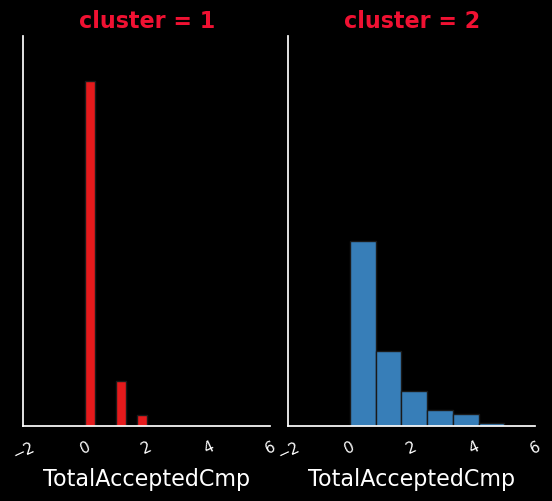

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

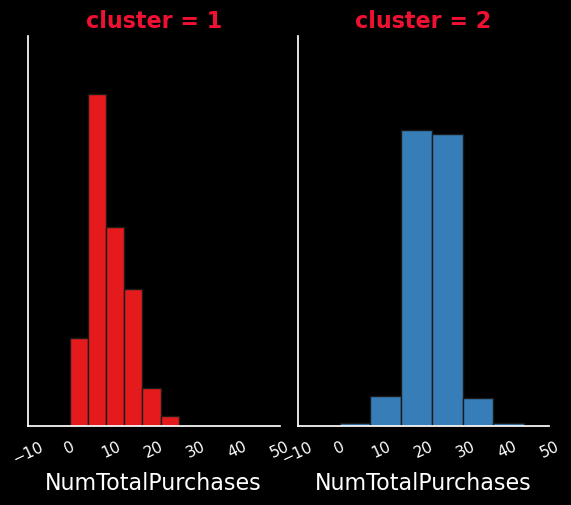

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

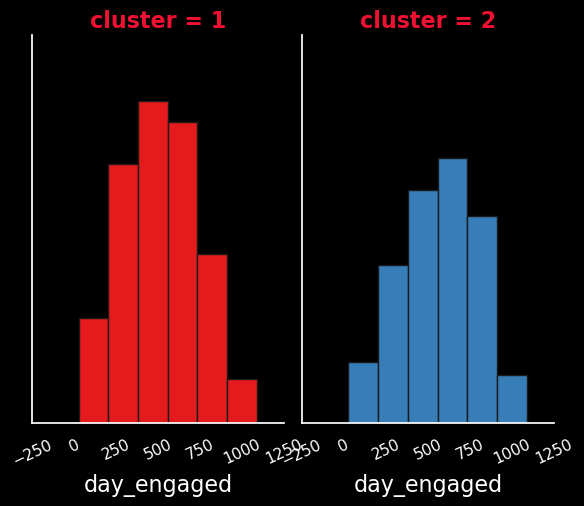

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

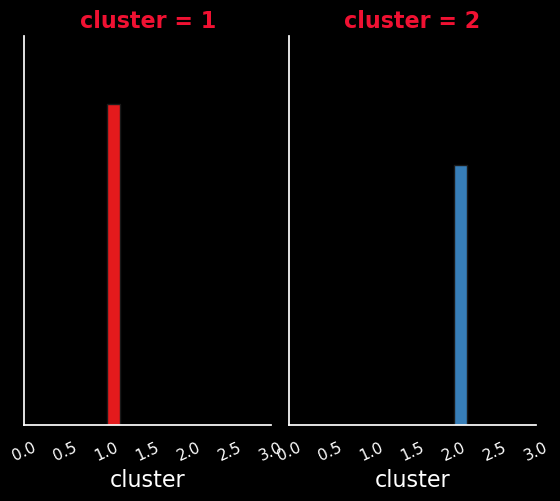

In [164]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

# Report

**Based on above information we can divide customer into 3 parts**:- 
1. **Highly Active Customer**: These customers beloing to cluster one.
2. **Moderately Active Customer** :- These customers belong to cluster two.
3. **Least Active Customer** :- These customers belong to cluster third.

**Characteristics of Highly Active Customer**

- **In terms of Education**
   - Highly Active Customer are from PG background
   
- **In terms of Marital_status**
   - Number of people in relationship are approx. two times of single people

- **In terms of Income**
   - Income of Highly active customer are little less as compare to Moderately active customer.
   
- **In terms of Kids**
   - Highly active customer have more number of children as compare to other customer ( avg. of 1 child ).
   
- **In terms of Expenses**
  - Expenses of Highly Active customer are less as compare to moderate.
  - These customer spent avg. of approx. 100-200 unit money.
  
- **In terms of Age**
  - Age of these customer are between 25 to 75.
  - Maximum customer age are between 40 to 50.
  
- **In terms of day_engaged**
  - Highly Active customer are more loyal as they engaged with company for longer period of time.


**Characteristics of Moderately Active Customer**

- **In terms of Education**
  - Moderately Active Customer are also from PG backgroud
  
- **In terms of Marital_status**
  - Number of people in relationship are slightly more as compare to single people.
  
- **In terms of Income**
  - Income of Moderately active customer are higher as compare to other customer.
  
- **In terms of Kids**
  - Moderately active customer have less number of childern as compare to highly active customer ( Max. customer has no child ).
  
- **In terms of Expenses**
  - Expenses of Moderately Active customer are more as compare to Active.
  - These customer spent avg. of approx. 500-2000 unit money.
  
- **In terms of Age**
  - Age of these customer are between 25 to 75.
  - Maximum customer age are between 35 to 60.
  
- **In terms of day_engaged**
  - Moderately Active customer are slightly less engaged with company as      compare to Highly Active Customer.

In [170]:
print(df.columns)

Index(['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'], dtype='object')


findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

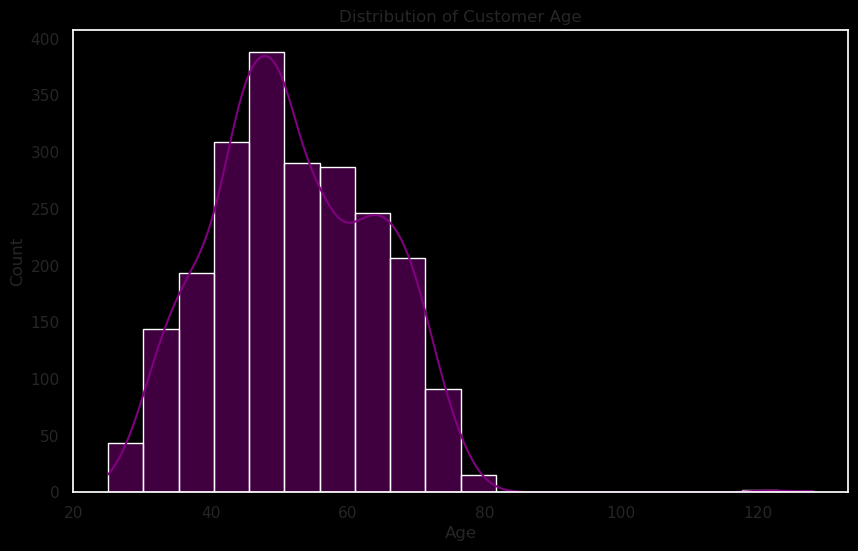

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

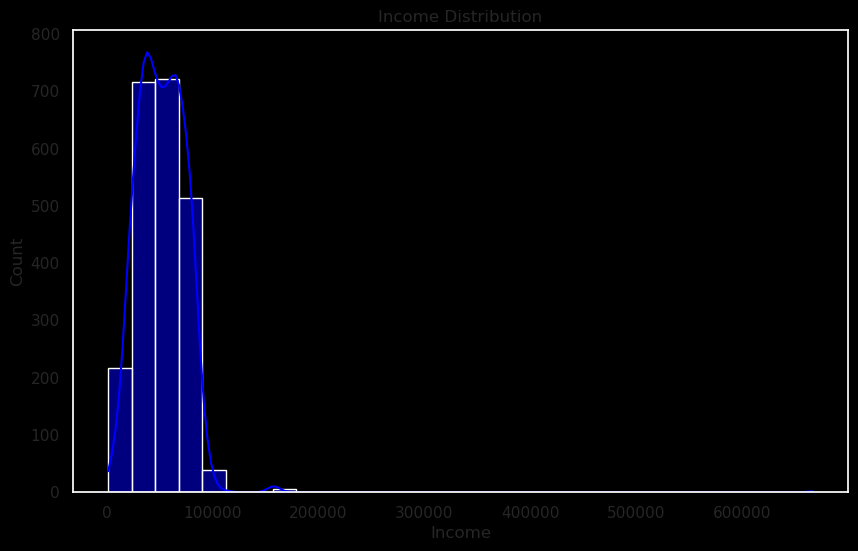

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

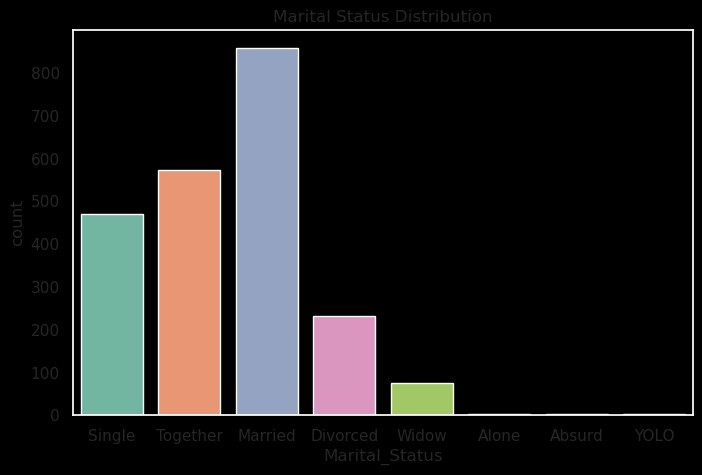

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load customer personality dataset with the correct delimiter (tab-separated)
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Checking if the dataset is loaded correctly
print(df.columns)  # Verify column names

# Basic Data Preprocessing (Cleaning, Removing NaN, etc.)
df.dropna(inplace=True)

# Calculate Age based on 'Year_Birth'
if 'Year_Birth' in df.columns:
    df['Age'] = 2021 - df['Year_Birth']  # Assuming the current year
else:
    print("'Year_Birth' column not found in the dataset.")

# Visualizing distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.show()

# Visualizing distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.show()

# Visualizing distribution of Marital Status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.show()


findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

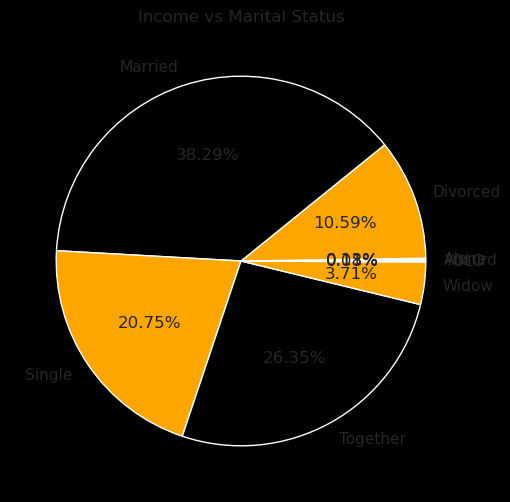

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Calculate age based on 'Year_Birth'
df['Age'] = 2021 - df['Year_Birth']

# Pie chart for Income vs Marital Status
plt.figure(figsize=(8,6))

# Group by 'Marital_Status' and sum the 'Income', then plot the pie chart
df.groupby('Marital_Status')['Income'].sum().plot.pie(autopct='%1.2f%%', colors=['orange', 'black'])
plt.title('Income vs Marital Status')
plt.ylabel('')  # Remove y-axis label
plt.show()

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

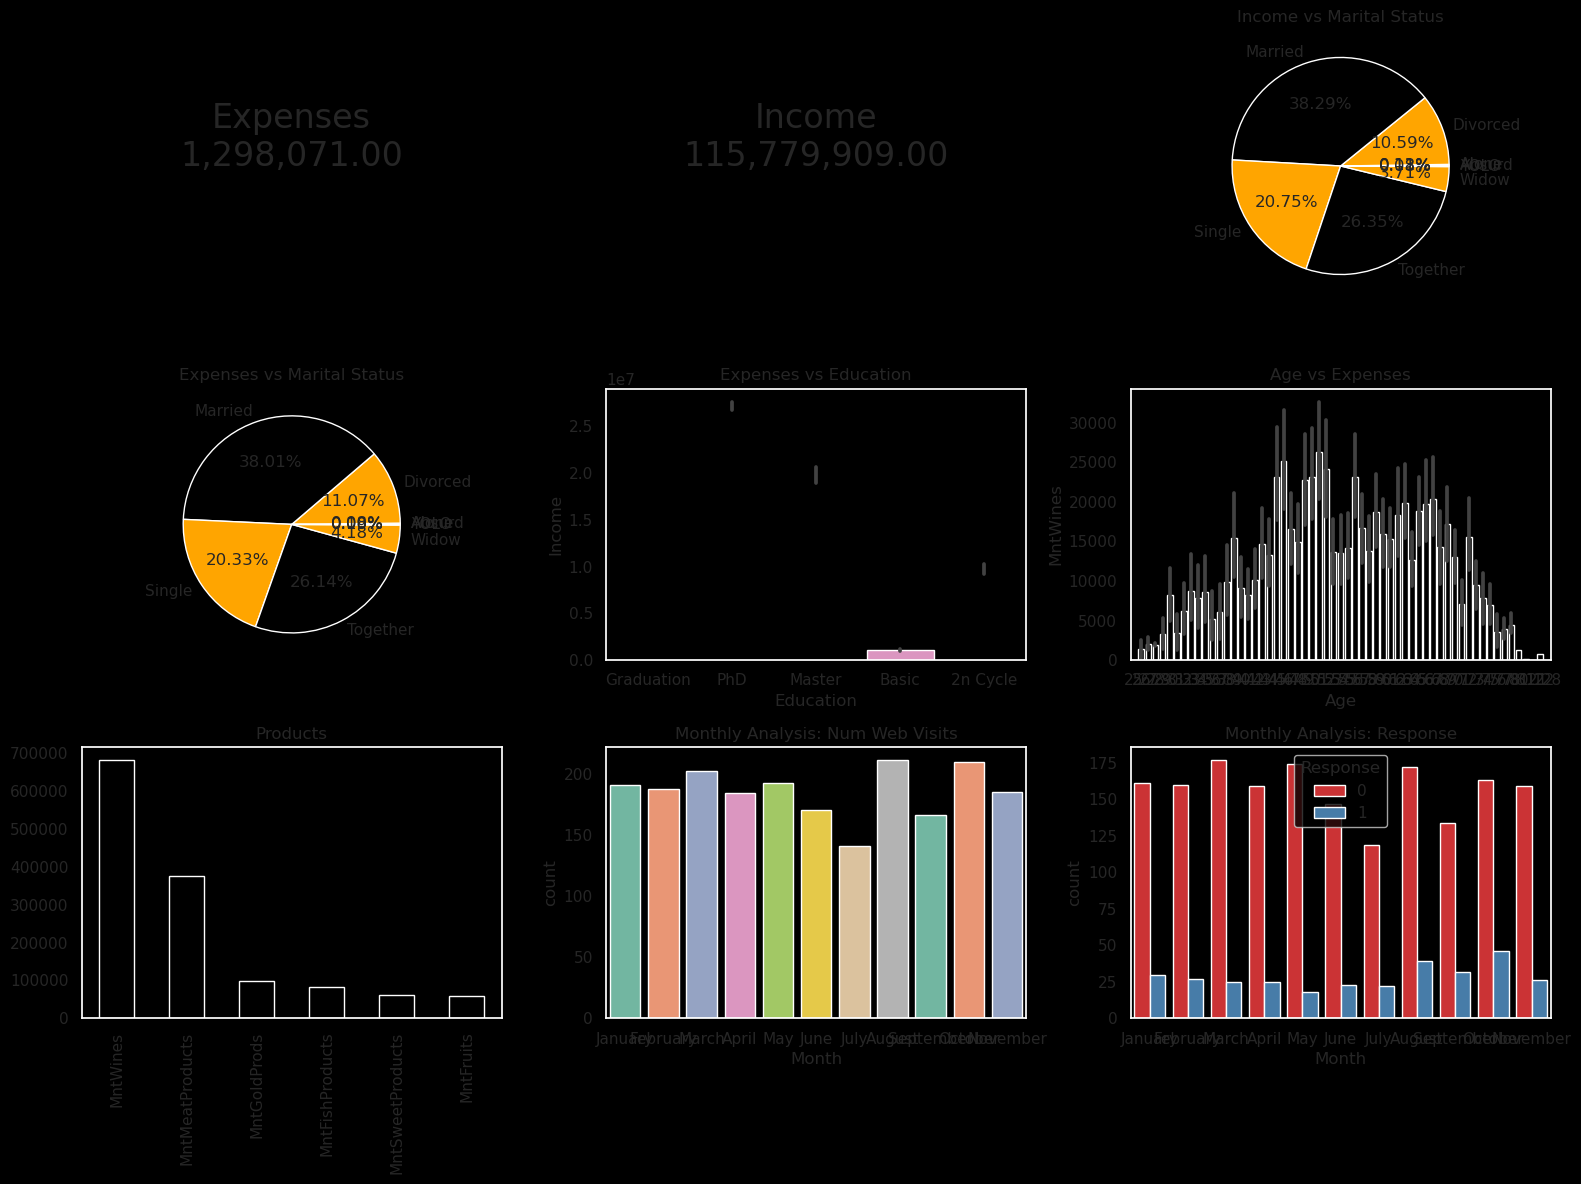

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Calculate age based on 'Year_Birth'
df['Age'] = 2021 - df['Year_Birth']

# Dashboard 1: Creating the components

# 1. Total Expenses and Income
total_expenses = df['MntWines'].sum() + df['MntMeatProducts'].sum() + df['MntFishProducts'].sum() + df['MntSweetProducts'].sum() + df['MntGoldProds'].sum()
total_income = df['Income'].sum()

plt.figure(figsize=(16,12))
plt.subplot(3, 3, 1)
plt.text(0.5, 0.5, f'Expenses\n{total_expenses:,.2f}', fontsize=24, ha='center')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.text(0.5, 0.5, f'Income\n{total_income:,.2f}', fontsize=24, ha='center')
plt.axis('off')

# 2. Pie Charts for Marital Status
plt.subplot(3, 3, 3)
df.groupby('Marital_Status')['Income'].sum().plot.pie(autopct='%1.2f%%', colors=['orange', 'black'])
plt.title('Income vs Marital Status')
plt.ylabel('')

plt.subplot(3, 3, 4)
df.groupby('Marital_Status')['MntWines'].sum().plot.pie(autopct='%1.2f%%', colors=['orange', 'black'])
plt.title('Expenses vs Marital Status')
plt.ylabel('')

# 3. Bar Charts for Expenses vs Education
plt.subplot(3, 3, 5)
sns.barplot(x='Education', y='Income', data=df, estimator=sum, palette='Set2')  # Using Set2 palette
plt.title('Expenses vs Education')

# 4. Age vs Expenses
plt.subplot(3, 3, 6)
sns.barplot(x='Age', y='MntWines', data=df, estimator=sum, color='black')  # Single color option
plt.title('Age vs Expenses')

# 5. Products Bar Chart
plt.subplot(3, 3, 7)
products = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']
df[products].sum().plot(kind='bar', color='black')
plt.title('Products')

# 6. Monthly Analysis (Num Web Visits and Response)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Month'] = df['Dt_Customer'].dt.month_name()

plt.subplot(3, 3, 8)
sns.countplot(x='Month', data=df, palette='Set2', order=pd.date_range("2000-01-01", "2000-12-01", freq='M').strftime('%B'))
plt.title('Monthly Analysis: Num Web Visits')

plt.subplot(3, 3, 9)
sns.countplot(x='Month', hue='Response', data=df, palette='Set1', order=pd.date_range("2000-01-01", "2000-12-01", freq='M').strftime('%B'))
plt.title('Monthly Analysis: Response')

plt.tight_layout()
plt.show()


findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

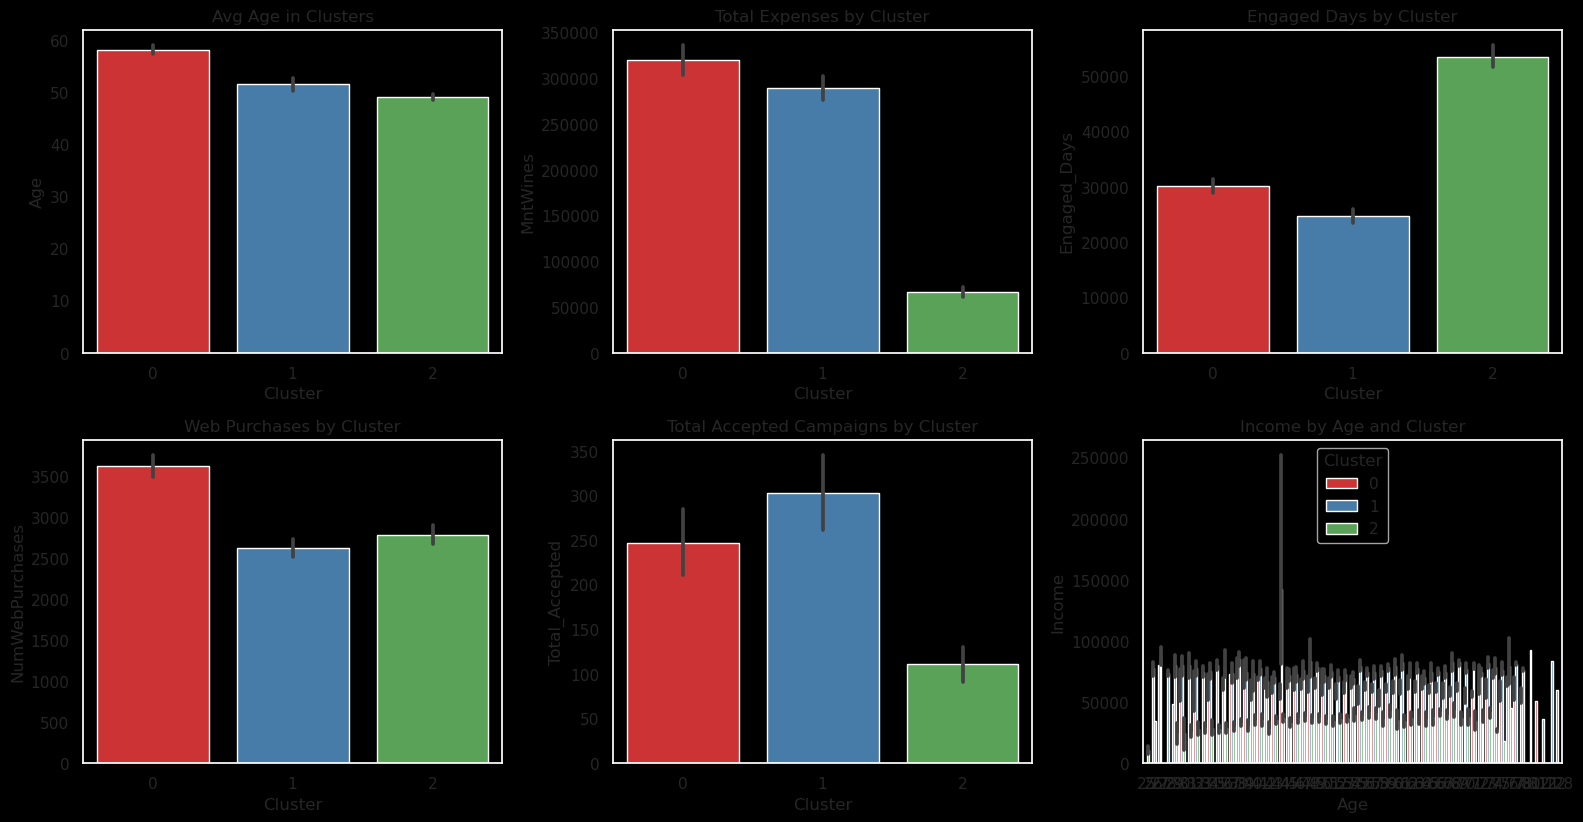

In [190]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset (assumed cleaned)
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Preprocess: Drop any null values and calculate age based on 'Year_Birth'
df.dropna(inplace=True)
df['Age'] = 2021 - df['Year_Birth']

# Selecting features for clustering
X = df[['Income', 'Age', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Create new features for visualization
df['Engaged_Days'] = df['Recency']
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Accepted'] = df[campaign_columns].sum(axis=1)

# Start plotting the dashboard
plt.figure(figsize=(16, 12))

# 1. Average Age in Clusters
plt.subplot(3, 3, 1)
sns.barplot(x='Cluster', y='Age', data=df, estimator='mean', palette='Set1')
plt.title('Avg Age in Clusters')

# 2. Total Expenses by Cluster
plt.subplot(3, 3, 2)
sns.barplot(x='Cluster', y='MntWines', data=df, estimator='sum', palette='Set1')
plt.title('Total Expenses by Cluster')

# 3. Engaged Days by Cluster
plt.subplot(3, 3, 3)
sns.barplot(x='Cluster', y='Engaged_Days', data=df, estimator='sum', palette='Set1')
plt.title('Engaged Days by Cluster')

# 4. Web Purchases by Cluster
plt.subplot(3, 3, 4)
sns.barplot(x='Cluster', y='NumWebPurchases', data=df, estimator='sum', palette='Set1')
plt.title('Web Purchases by Cluster')

# 5. Accepted Campaigns by Cluster
plt.subplot(3, 3, 5)
sns.barplot(x='Cluster', y='Total_Accepted', data=df, estimator='sum', palette='Set1')
plt.title('Total Accepted Campaigns by Cluster')

# 6. Income Distribution by Age and Cluster
plt.subplot(3, 3, 6)
sns.barplot(x='Age', y='Income', hue='Cluster', data=df, palette='Set1')
plt.title('Income by Age and Cluster')

plt.tight_layout()
plt.show()

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

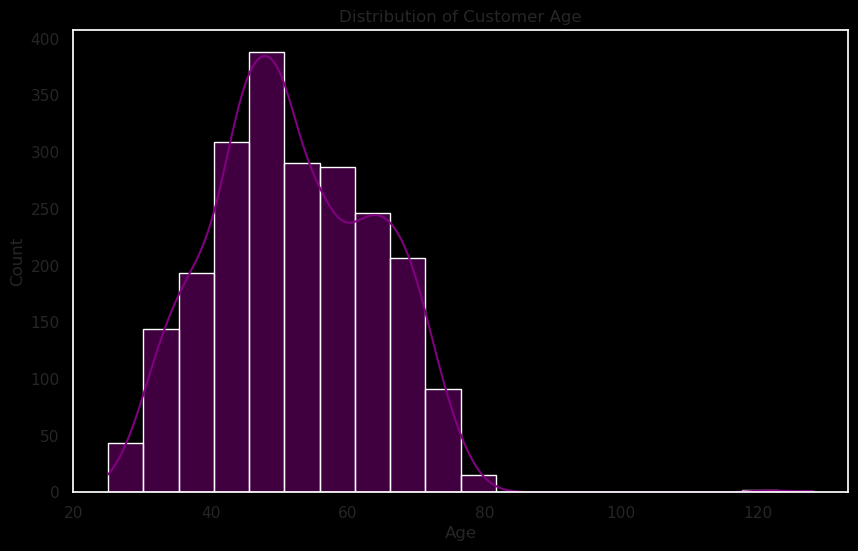

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

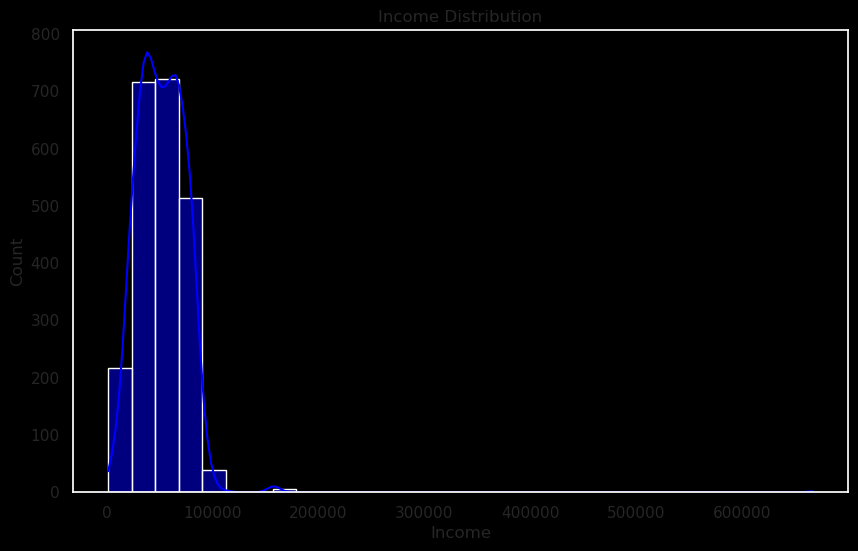

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

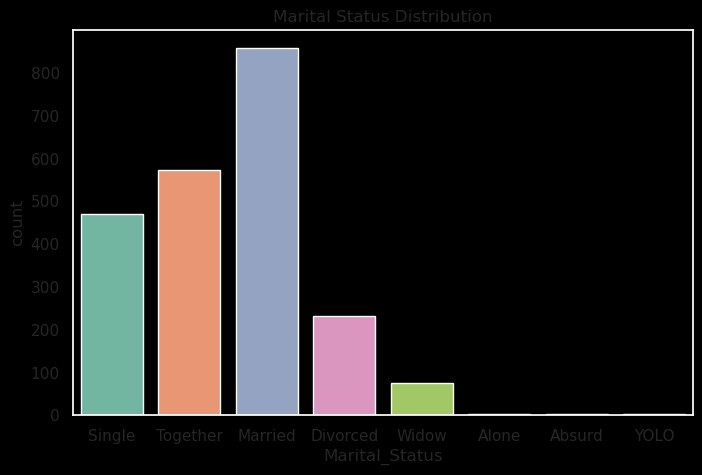

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

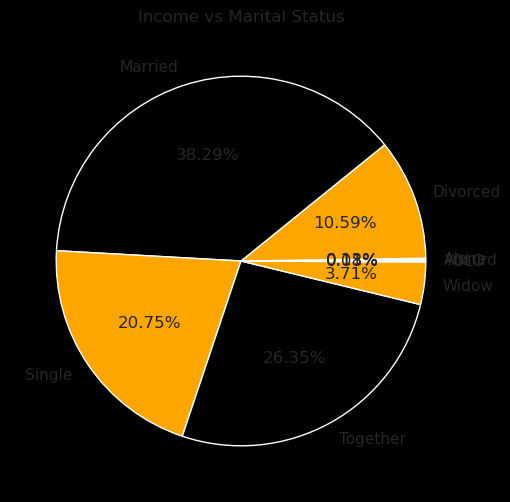

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

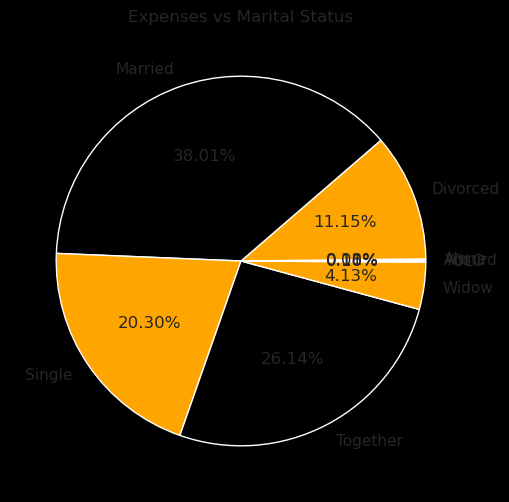

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

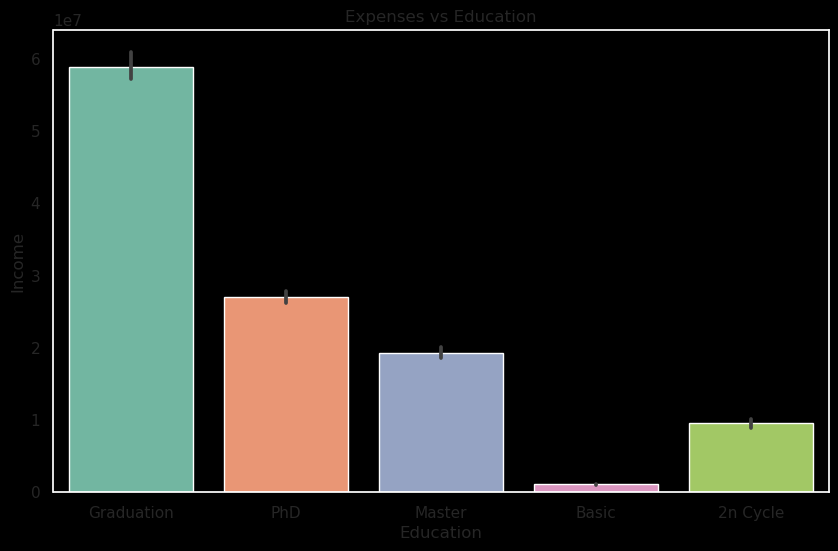

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

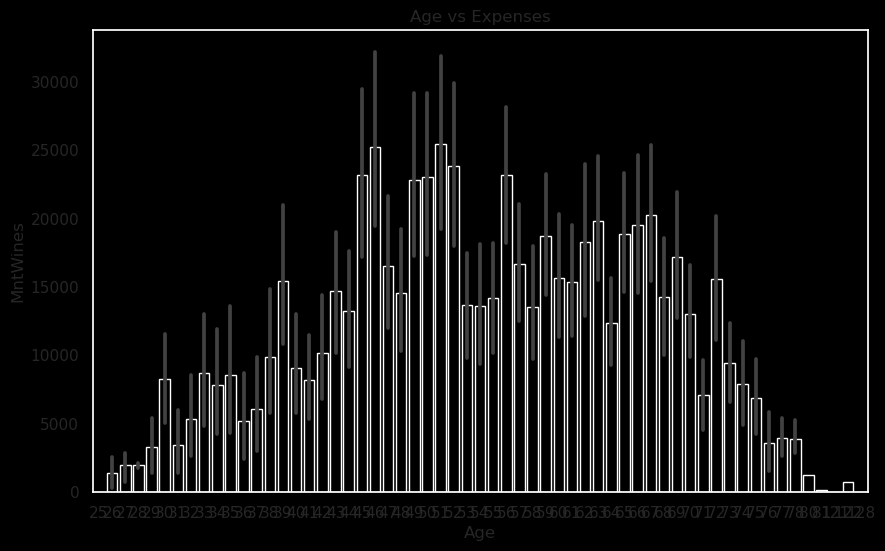

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

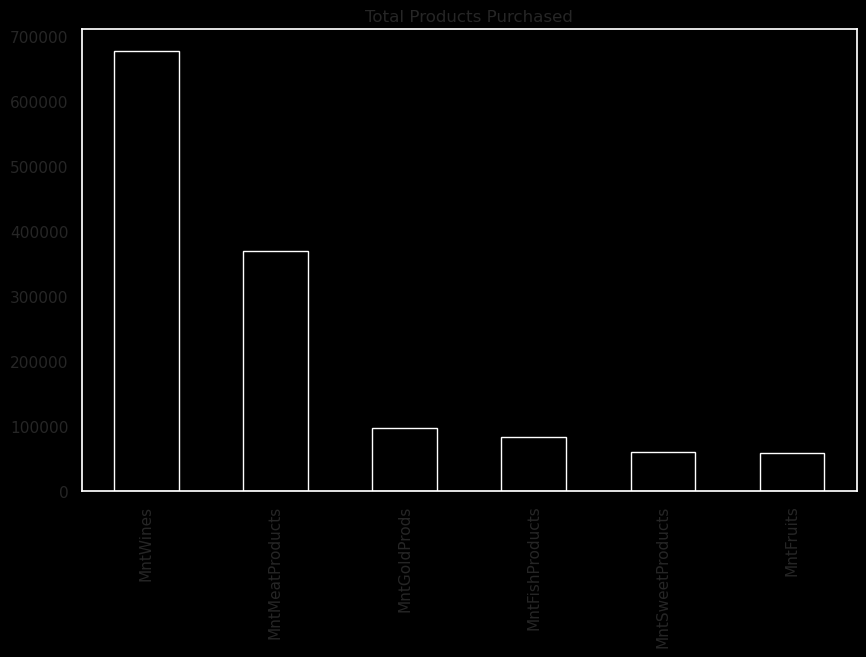

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

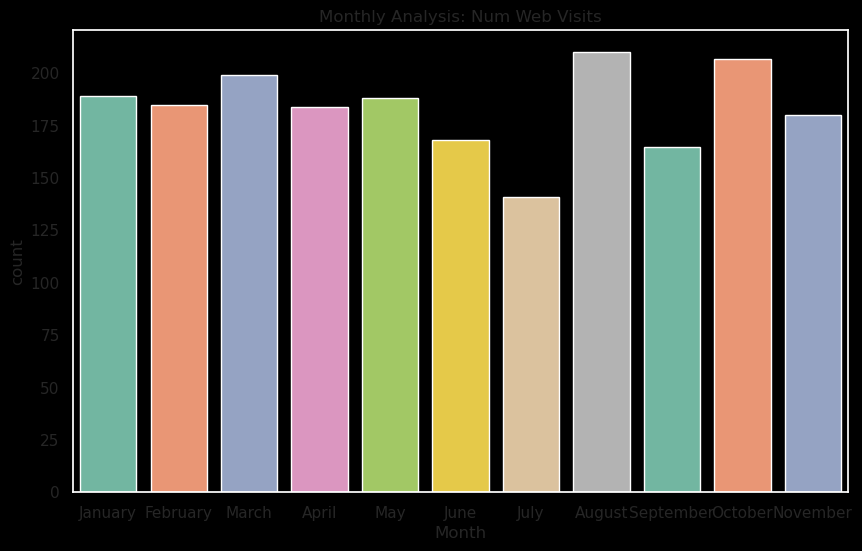

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

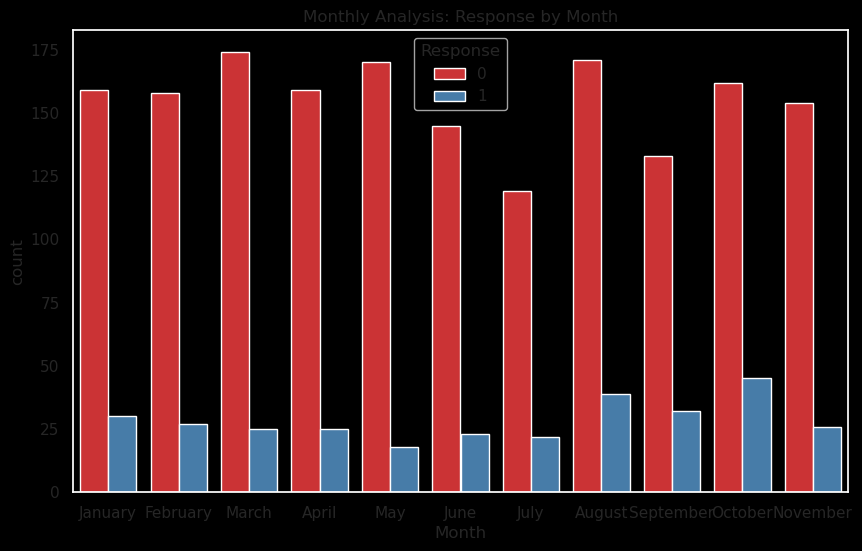

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Directory to save images (Make sure the directory exists or create it)
image_dir = "your_directory_path_here"
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Data Preprocessing: Clean data, calculate 'Age'
df.dropna(inplace=True)
df['Age'] = 2021 - df['Year_Birth']

# 1. Visualizing Distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.savefig(f"{image_dir}/age_distribution.png", format='png', dpi=300)  # Save the image
plt.show()

# 2. Visualizing Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.savefig(f"{image_dir}/income_distribution.png", format='png', dpi=300)  # Save the image
plt.show()

# 3. Visualizing Distribution of Marital Status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.savefig(f"{image_dir}/marital_status_distribution.png", format='png', dpi=300)  # Save the image
plt.show()

# 4. Pie chart for Income vs Marital Status
plt.figure(figsize=(8,6))
df.groupby('Marital_Status')['Income'].sum().plot.pie(autopct='%1.2f%%', colors=['orange', 'black'])
plt.title('Income vs Marital Status')
plt.ylabel('')
plt.savefig(f"{image_dir}/income_vs_marital_status.png", format='png', dpi=300)  # Save the image
plt.show()

# 5. Pie chart for Expenses vs Marital Status
plt.figure(figsize=(8,6))
df.groupby('Marital_Status')['MntWines'].sum().plot.pie(autopct='%1.2f%%', colors=['orange', 'black'])
plt.title('Expenses vs Marital Status')
plt.ylabel('')
plt.savefig(f"{image_dir}/expenses_vs_marital_status.png", format='png', dpi=300)  # Save the image
plt.show()

# 6. Bar Chart for Expenses vs Education
plt.figure(figsize=(10,6))
sns.barplot(x='Education', y='Income', data=df, estimator=sum, palette='Set2')
plt.title('Expenses vs Education')
plt.savefig(f"{image_dir}/expenses_vs_education.png", format='png', dpi=300)  # Save the image
plt.show()

# 7. Bar Chart for Age vs Expenses
plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='MntWines', data=df, estimator=sum, color='black')
plt.title('Age vs Expenses')
plt.savefig(f"{image_dir}/age_vs_expenses.png", format='png', dpi=300)  # Save the image
plt.show()

# 8. Bar Chart for Products (Wines, Meat, Gold, Fish, Sweets, Fruits)
plt.figure(figsize=(10,6))
products = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']
df[products].sum().plot(kind='bar', color='black')
plt.title('Total Products Purchased')
plt.savefig(f"{image_dir}/products_purchased.png", format='png', dpi=300)  # Save the image
plt.show()

# 9. Monthly Analysis: Num Web Visits
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Month'] = df['Dt_Customer'].dt.month_name()

plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=df, palette='Set2', order=pd.date_range("2000-01-01", "2000-12-01", freq='M').strftime('%B'))
plt.title('Monthly Analysis: Num Web Visits')
plt.savefig(f"{image_dir}/monthly_analysis_web_visits.png", format='png', dpi=300)  # Save the image
plt.show()

# 10. Monthly Analysis: Response by Month
plt.figure(figsize=(10,6))
sns.countplot(x='Month', hue='Response', data=df, palette='Set1', order=pd.date_range("2000-01-01", "2000-12-01", freq='M').strftime('%B'))
plt.title('Monthly Analysis: Response by Month')
plt.savefig(f"{image_dir}/monthly_analysis_response.png", format='png', dpi=300)  # Save the image
plt.show()

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

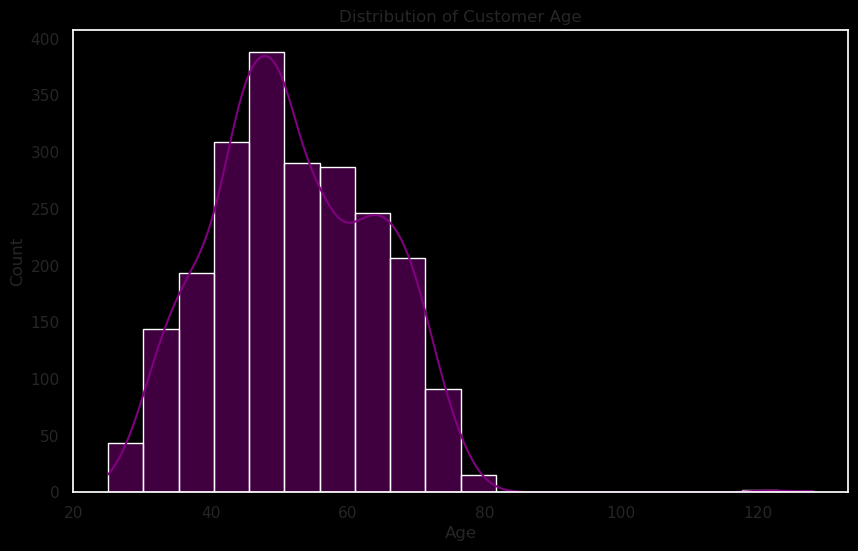

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

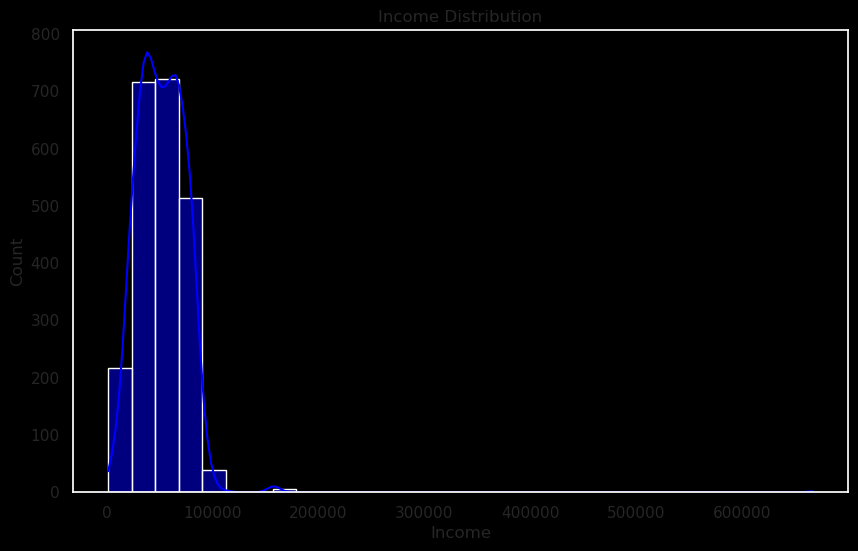

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

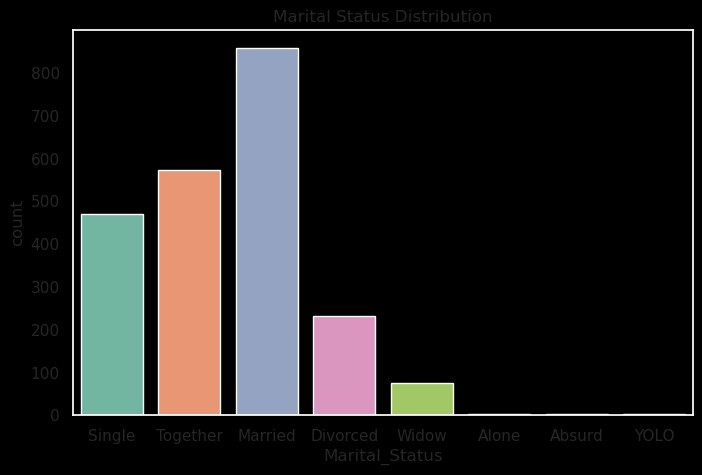

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

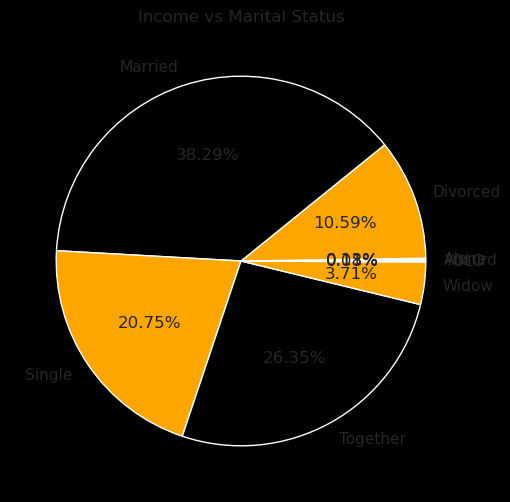

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

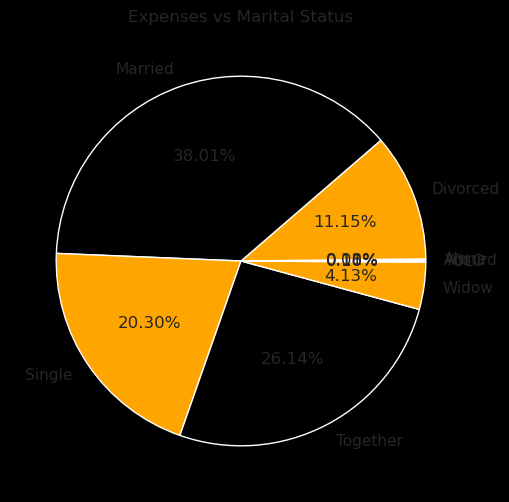

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

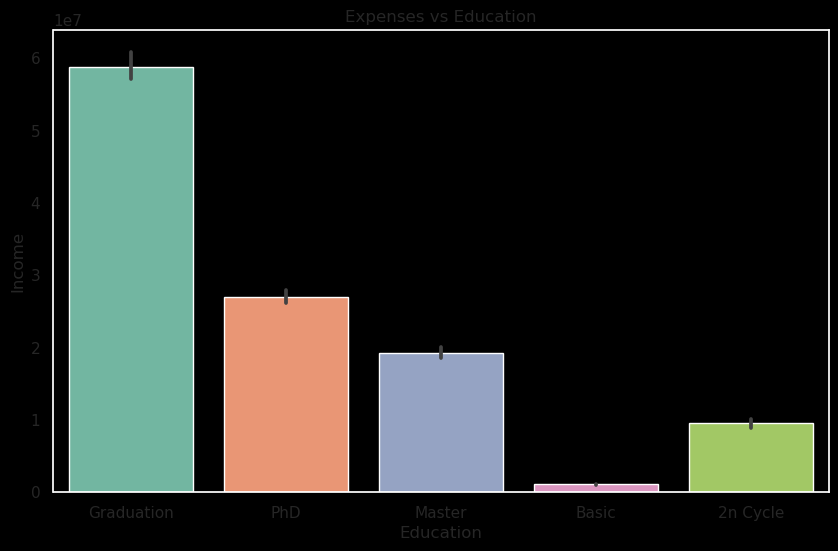

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

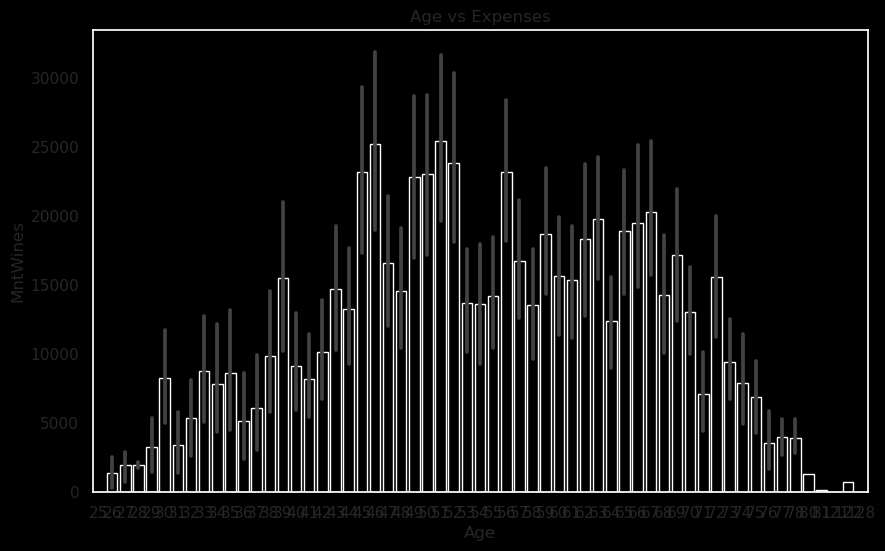

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

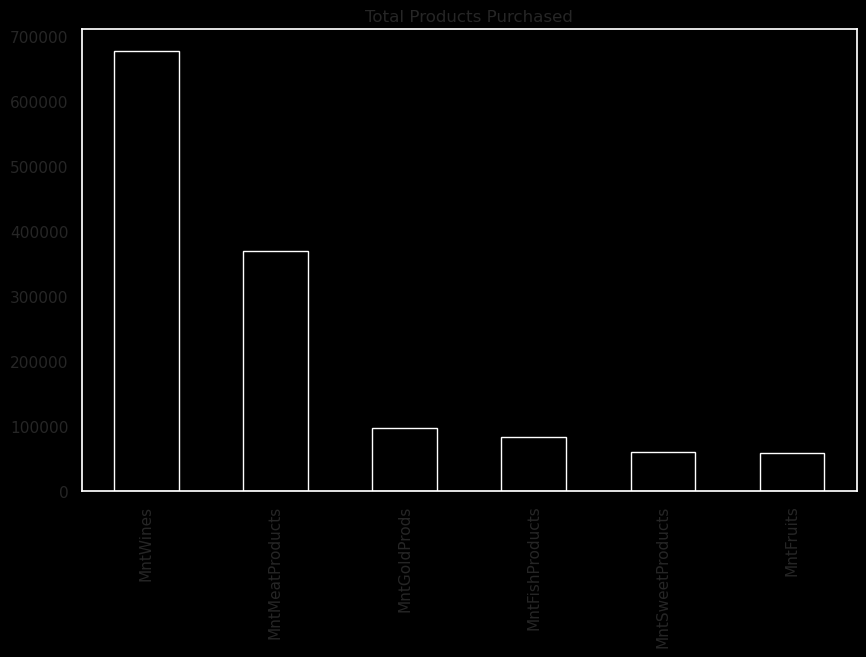

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

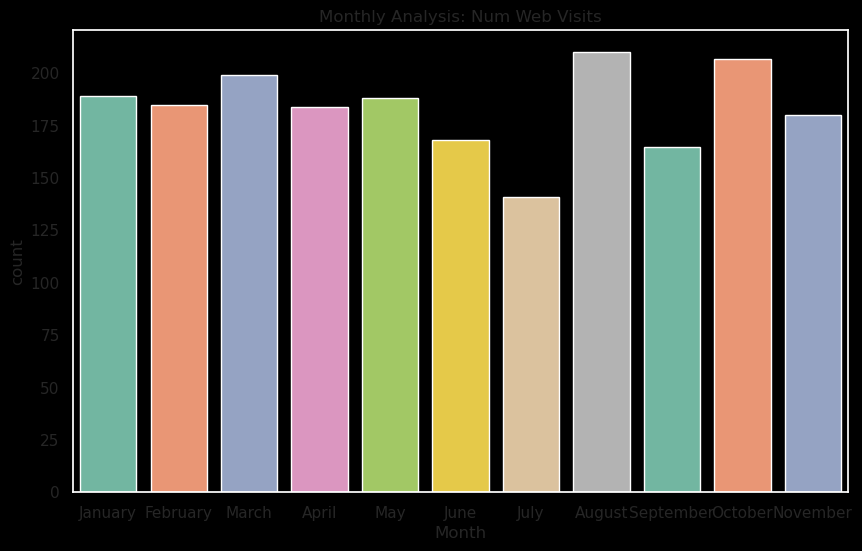

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

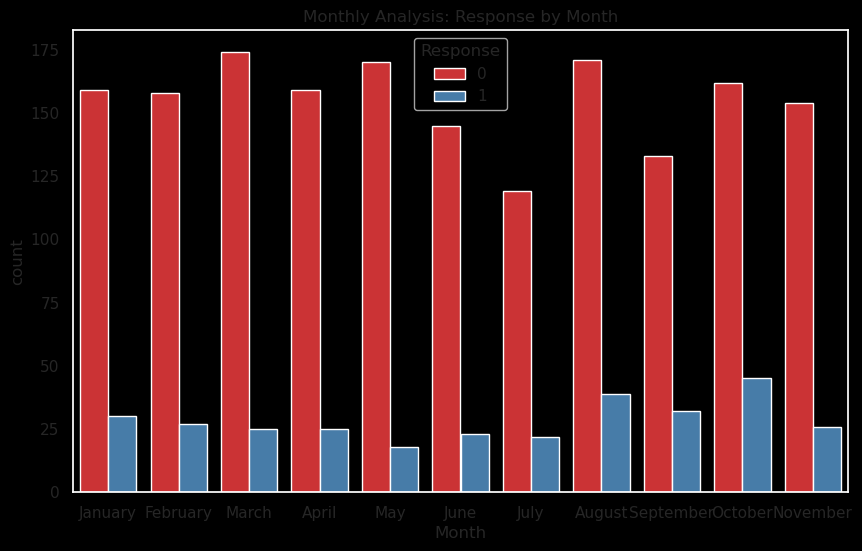

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

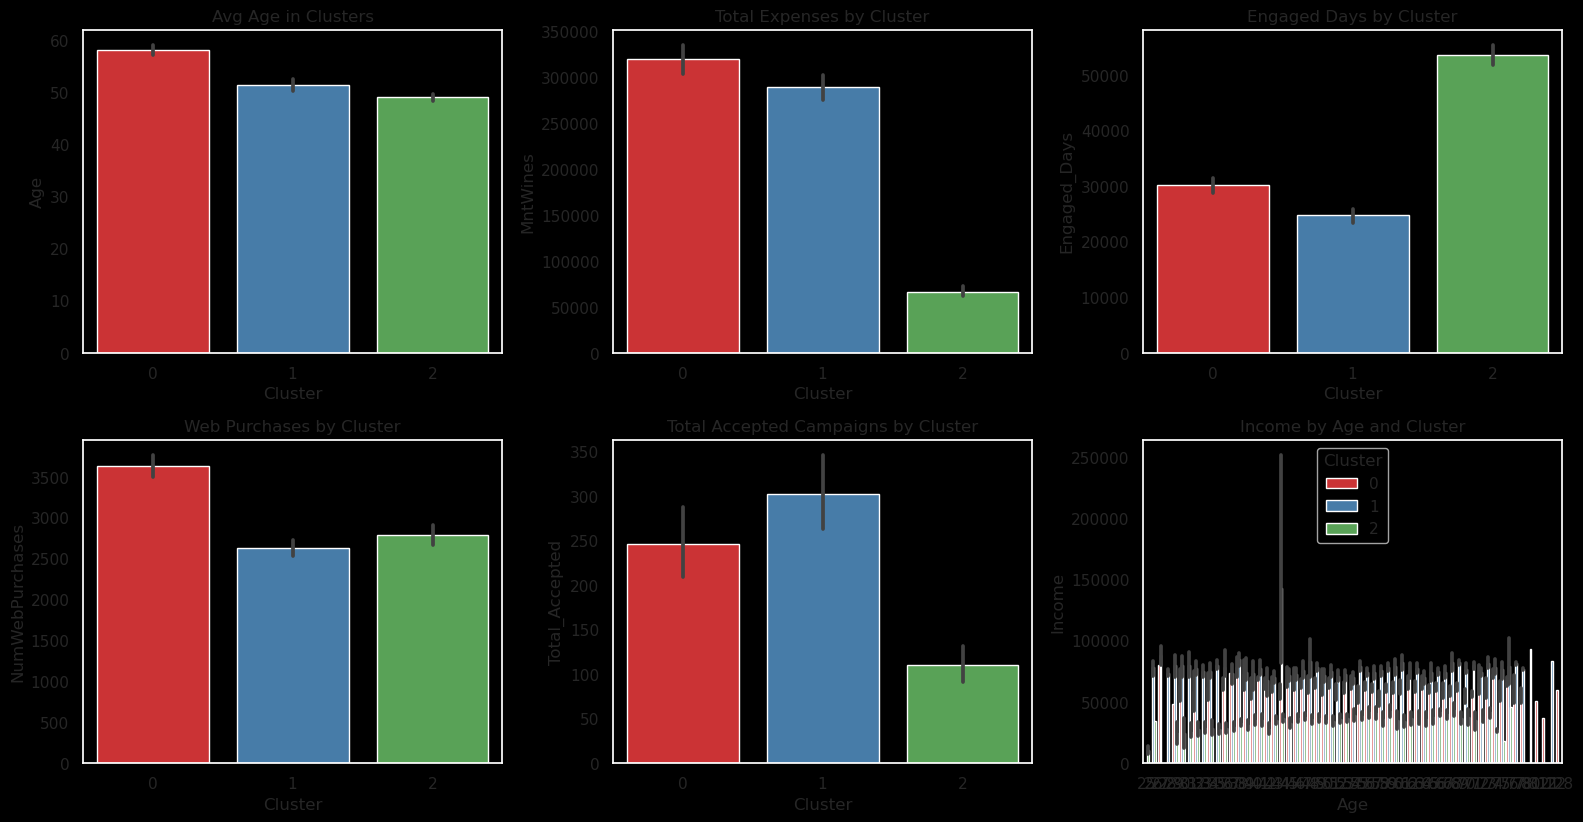

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os

# Load dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Directory to save images (Make sure the directory exists or create it)
image_dir = "your_directory_path_here"
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Data Preprocessing: Clean data, calculate 'Age'
df.dropna(inplace=True)
df['Age'] = 2021 - df['Year_Birth']

# ---------------------------------------------------
# DASHBOARD 1: Saving all images
# ---------------------------------------------------

# 1. Visualizing Distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.savefig(f"{image_dir}/dashboard1_age_distribution.png", format='png', dpi=300)
plt.show()

# 2. Visualizing Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.savefig(f"{image_dir}/dashboard1_income_distribution.png", format='png', dpi=300)
plt.show()

# 3. Visualizing Distribution of Marital Status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Marital Status Distribution')
plt.savefig(f"{image_dir}/dashboard1_marital_status_distribution.png", format='png', dpi=300)
plt.show()

# 4. Pie chart for Income vs Marital Status
plt.figure(figsize=(8,6))
df.groupby('Marital_Status')['Income'].sum().plot.pie(autopct='%1.2f%%', colors=['orange', 'black'])
plt.title('Income vs Marital Status')
plt.ylabel('')
plt.savefig(f"{image_dir}/dashboard1_income_vs_marital_status.png", format='png', dpi=300)
plt.show()

# 5. Pie chart for Expenses vs Marital Status
plt.figure(figsize=(8,6))
df.groupby('Marital_Status')['MntWines'].sum().plot.pie(autopct='%1.2f%%', colors=['orange', 'black'])
plt.title('Expenses vs Marital Status')
plt.ylabel('')
plt.savefig(f"{image_dir}/dashboard1_expenses_vs_marital_status.png", format='png', dpi=300)
plt.show()

# 6. Bar Chart for Expenses vs Education
plt.figure(figsize=(10,6))
sns.barplot(x='Education', y='Income', data=df, estimator=sum, palette='Set2')
plt.title('Expenses vs Education')
plt.savefig(f"{image_dir}/dashboard1_expenses_vs_education.png", format='png', dpi=300)
plt.show()

# 7. Bar Chart for Age vs Expenses
plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='MntWines', data=df, estimator=sum, color='black')
plt.title('Age vs Expenses')
plt.savefig(f"{image_dir}/dashboard1_age_vs_expenses.png", format='png', dpi=300)
plt.show()

# 8. Bar Chart for Products (Wines, Meat, Gold, Fish, Sweets, Fruits)
plt.figure(figsize=(10,6))
products = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']
df[products].sum().plot(kind='bar', color='black')
plt.title('Total Products Purchased')
plt.savefig(f"{image_dir}/dashboard1_products_purchased.png", format='png', dpi=300)
plt.show()

# 9. Monthly Analysis: Num Web Visits
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Month'] = df['Dt_Customer'].dt.month_name()

plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=df, palette='Set2', order=pd.date_range("2000-01-01", "2000-12-01", freq='M').strftime('%B'))
plt.title('Monthly Analysis: Num Web Visits')
plt.savefig(f"{image_dir}/dashboard1_monthly_analysis_web_visits.png", format='png', dpi=300)
plt.show()

# 10. Monthly Analysis: Response by Month
plt.figure(figsize=(10,6))
sns.countplot(x='Month', hue='Response', data=df, palette='Set1', order=pd.date_range("2000-01-01", "2000-12-01", freq='M').strftime('%B'))
plt.title('Monthly Analysis: Response by Month')
plt.savefig(f"{image_dir}/dashboard1_monthly_analysis_response.png", format='png', dpi=300)
plt.show()

# ---------------------------------------------------
# DASHBOARD 2: Clustering and saving images
# ---------------------------------------------------

# Features for clustering
X = df[['Income', 'Age', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth']]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Create new features for visualization
df['Engaged_Days'] = df['Recency']
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Accepted'] = df[campaign_columns].sum(axis=1)

# 1. Average Age in Clusters
plt.figure(figsize=(16, 12))
plt.subplot(3, 3, 1)
sns.barplot(x='Cluster', y='Age', data=df, estimator='mean', palette='Set1')
plt.title('Avg Age in Clusters')
plt.savefig(f"{image_dir}/dashboard2_avg_age_clusters.png", format='png', dpi=300)

# 2. Total Expenses by Cluster
plt.subplot(3, 3, 2)
sns.barplot(x='Cluster', y='MntWines', data=df, estimator='sum', palette='Set1')
plt.title('Total Expenses by Cluster')
plt.savefig(f"{image_dir}/dashboard2_total_expenses_clusters.png", format='png', dpi=300)

# 3. Engaged Days by Cluster
plt.subplot(3, 3, 3)
sns.barplot(x='Cluster', y='Engaged_Days', data=df, estimator='sum', palette='Set1')
plt.title('Engaged Days by Cluster')
plt.savefig(f"{image_dir}/dashboard2_engaged_days_clusters.png", format='png', dpi=300)

# 4. Web Purchases by Cluster
plt.subplot(3, 3, 4)
sns.barplot(x='Cluster', y='NumWebPurchases', data=df, estimator='sum', palette='Set1')
plt.title('Web Purchases by Cluster')
plt.savefig(f"{image_dir}/dashboard2_web_purchases_clusters.png", format='png', dpi=300)

# 5. Total Accepted Campaigns by Cluster
plt.subplot(3, 3, 5)
sns.barplot(x='Cluster', y='Total_Accepted', data=df, estimator='sum', palette='Set1')
plt.title('Total Accepted Campaigns by Cluster')
plt.savefig(f"{image_dir}/dashboard2_accepted_campaigns_clusters.png", format='png', dpi=300)

# 6. Income Distribution by Age and Cluster
plt.subplot(3, 3, 6)
sns.barplot(x='Age', y='Income', hue='Cluster', data=df, palette='Set1')
plt.title('Income by Age and Cluster')
plt.savefig(f"{image_dir}/dashboard2_income_by_age_and_cluster.png", format='png', dpi=300)

plt.tight_layout()
plt.show()